In [1]:
SensorNum=1 # Sensor number
WindowWidth=[16,32,64,128,256,512,1024] # Window Width
OverlapArray=[4,8,16,32,64,128,256] # sliding window
width=1000 # graph width 
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
Axis='AccX,AccY,AccZ' # Axis
PathAxis='AccXYZ'
WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/2016-07-25"

In [2]:
#Learning Parameter
BATCH_SIZE =50

In [3]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [4]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [5]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [6]:
if not os.path.exists(WORKSPACE_PATH+'/study/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/study/'+DataName+'/')
StudyDataPath=WORKSPACE_PATH+'/study/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/glaph/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/glaph/'+DataName+'/')
GlaphDataPath=WORKSPACE_PATH+'/glaph/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/modelPic/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/modelPic/'+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+'/modelPic/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/window/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/window/'+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+DataName+'/'

RawDataPath="/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/raw/"

**Phase1 計測データの取得**

In [7]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成**

SampleNum= 16
Overlap= 4
AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =63682
SourceData's aborting data = 2
window shape is (63682, 16, 3)
(63682, 16, 3)
hiden node = 4
CommonName =_edim=4-Window=16-Overlap=4-AccX
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
14s - loss: 0.0054 - val_loss: 9.1011e-04
Epoch 2/50
15s - loss: 6.0608e-04 - val_loss: 4.7834e-04
Epoch 3/50
14s - loss: 4.2953e-04 - val_loss: 3.7743e-04
Epoch 4/50
13s - loss: 3.6425e-04 - val_loss: 3.2152e-04
Epoch 5/50
14s - loss: 3.0757e-04 - val_loss: 2.7266e-04
Epoch 6/50
13s - loss: 2.5886e-04 - val_loss: 2.2576e-04
Epoch 7/50
14s - loss: 2.1931e-04 - val_loss: 1.8966e-04
Epoch 8/50
14s - loss: 1.9165e-04 - val_loss: 1.6927e-04
Epoch 9/50
15s - loss: 1.7381e-04 - val_loss: 1.5232e-04
Epoch 10/50
13s - loss: 1.6115e-04 - val_loss: 1.4299e-04
Epoch 11/50
13s - loss: 1.5231e-04 - val_loss: 1.4797e-04
Epoch 12/50
14s - loss: 1.4552e-04 - val_loss: 2.

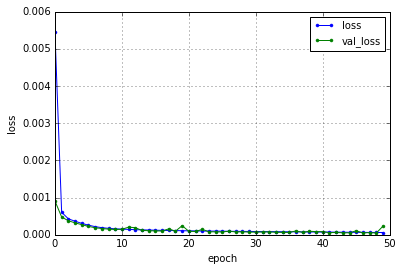

hiden node = 8
CommonName =_edim=8-Window=16-Overlap=4-AccX
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
19s - loss: 0.0067 - val_loss: 3.5536e-04
Epoch 2/50
18s - loss: 2.6351e-04 - val_loss: 1.8642e-04
Epoch 3/50
17s - loss: 1.7010e-04 - val_loss: 2.0623e-04
Epoch 4/50
16s - loss: 1.3881e-04 - val_loss: 1.2918e-04
Epoch 5/50
18s - loss: 1.2455e-04 - val_loss: 1.0082e-04
Epoch 6/50
15s - loss: 1.1440e-04 - val_loss: 9.2108e-05
Epoch 7/50
14s - loss: 1.0749e-04 - val_loss: 8.9660e-05
Epoch 8/50
17s - loss: 1.0196e-04 - val_loss: 1.1336e-04
Epoch 9/50
17s - loss: 9.7502e-05 - val_loss: 7.6962e-05
Epoch 10/50
16s - loss: 9.2959e-05 - val_loss: 8.5322e-05
Epoch 11/50
17s - loss: 8.9827e-05 - val_loss: 3.3697e-04
Epoch 12/50
16s - loss: 8.6701e-05 - val_loss: 7.3492e-05
Epoch 13/50
16s - loss: 8.4355e-05 - val_loss: 9.1631e-05
Epoch 14/50
19s - loss: 8.1850e-05 - val_loss: 7.0084e-05
Epoch 15/50
17s - loss: 8.0750e-05 - val_loss: 1.7277e-04
Epoch 16/50
18s - loss: 7.7672e-0

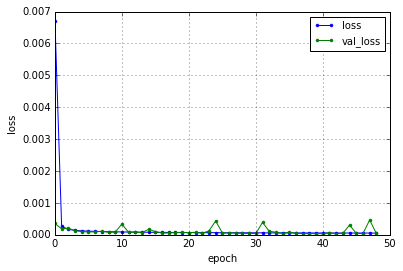

hiden node = 12
CommonName =_edim=12-Window=16-Overlap=4-AccX
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
17s - loss: 0.0028 - val_loss: 2.1965e-04
Epoch 2/50
17s - loss: 1.6535e-04 - val_loss: 1.3473e-04
Epoch 3/50
15s - loss: 1.2018e-04 - val_loss: 9.7726e-05
Epoch 4/50
16s - loss: 1.0444e-04 - val_loss: 7.9149e-05
Epoch 5/50
19s - loss: 9.4373e-05 - val_loss: 8.3466e-05
Epoch 6/50
17s - loss: 8.7746e-05 - val_loss: 6.6056e-05
Epoch 7/50
18s - loss: 8.1774e-05 - val_loss: 6.2370e-05
Epoch 8/50
16s - loss: 7.8316e-05 - val_loss: 5.4316e-04
Epoch 9/50
16s - loss: 7.5400e-05 - val_loss: 5.7814e-05
Epoch 10/50
17s - loss: 7.1866e-05 - val_loss: 6.3115e-05
Epoch 11/50
18s - loss: 6.9479e-05 - val_loss: 9.9108e-05
Epoch 12/50
15s - loss: 6.8305e-05 - val_loss: 2.2185e-04
Epoch 13/50
15s - loss: 6.6847e-05 - val_loss: 2.1702e-04
Epoch 14/50
17s - loss: 6.5515e-05 - val_loss: 4.4758e-05
Epoch 15/50
18s - loss: 6.3591e-05 - val_loss: 4.2644e-05
Epoch 16/50
16s - loss: 6.2959e

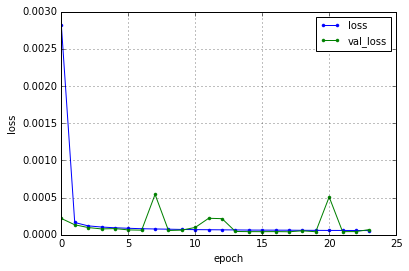

hiden node = 16
CommonName =_edim=16-Window=16-Overlap=4-AccX
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
17s - loss: 0.0031 - val_loss: 2.5552e-04
Epoch 2/50
16s - loss: 1.5632e-04 - val_loss: 1.2012e-04
Epoch 3/50
18s - loss: 1.0656e-04 - val_loss: 8.7388e-05
Epoch 4/50
17s - loss: 9.0518e-05 - val_loss: 6.7902e-05
Epoch 5/50
17s - loss: 8.1216e-05 - val_loss: 5.4153e-05
Epoch 6/50
19s - loss: 7.4336e-05 - val_loss: 7.1582e-05
Epoch 7/50
20s - loss: 6.9310e-05 - val_loss: 4.5929e-05
Epoch 8/50
18s - loss: 6.6293e-05 - val_loss: 4.3000e-05
Epoch 9/50
17s - loss: 6.1328e-05 - val_loss: 4.0597e-05
Epoch 10/50
17s - loss: 6.0615e-05 - val_loss: 4.0229e-05
Epoch 11/50
15s - loss: 5.8466e-05 - val_loss: 3.6748e-05
Epoch 12/50
17s - loss: 5.5899e-05 - val_loss: 7.0209e-04
Epoch 13/50
15s - loss: 5.5257e-05 - val_loss: 3.1841e-05
Epoch 14/50
15s - loss: 5.3325e-05 - val_loss: 3.4945e-05
Epoch 15/50
17s - loss: 5.3854e-05 - val_loss: 3.4132e-05
Epoch 16/50
17s - loss: 5.1897e

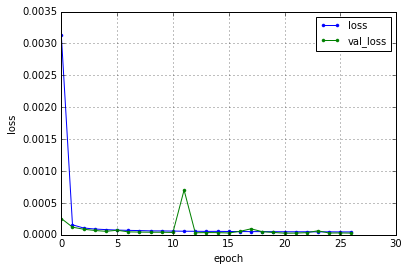

hiden node = 32
CommonName =_edim=32-Window=16-Overlap=4-AccX
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
18s - loss: 0.0014 - val_loss: 1.0731e-04
Epoch 2/50
17s - loss: 1.1264e-04 - val_loss: 1.1055e-04
Epoch 3/50
18s - loss: 8.9528e-05 - val_loss: 5.8541e-05
Epoch 4/50
17s - loss: 7.8350e-05 - val_loss: 4.6474e-05
Epoch 5/50
17s - loss: 7.0920e-05 - val_loss: 4.5336e-05
Epoch 6/50
15s - loss: 6.5769e-05 - val_loss: 3.5624e-05
Epoch 7/50
16s - loss: 6.1917e-05 - val_loss: 4.3943e-05
Epoch 8/50
19s - loss: 5.9871e-05 - val_loss: 8.5708e-05
Epoch 9/50
18s - loss: 5.7828e-05 - val_loss: 4.1403e-05
Epoch 10/50
19s - loss: 5.5961e-05 - val_loss: 3.7037e-05
Epoch 11/50
17s - loss: 5.3873e-05 - val_loss: 2.7351e-05
Epoch 12/50
18s - loss: 5.2371e-05 - val_loss: 1.5515e-04
Epoch 13/50
17s - loss: 5.1336e-05 - val_loss: 2.7491e-05
Epoch 14/50
17s - loss: 5.0910e-05 - val_loss: 3.1039e-05
Epoch 15/50
17s - loss: 4.9587e-05 - val_loss: 2.6223e-05
Epoch 16/50
19s - loss: 4.7470e

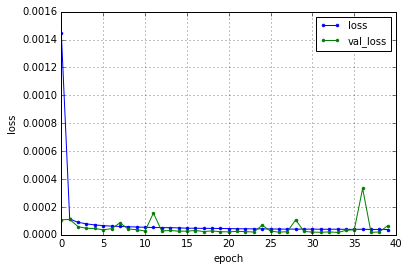

hiden node = 64
CommonName =_edim=64-Window=16-Overlap=4-AccX
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
17s - loss: 9.2264e-04 - val_loss: 4.8219e-05
Epoch 2/50
15s - loss: 5.1984e-05 - val_loss: 3.9389e-05
Epoch 3/50
14s - loss: 4.3210e-05 - val_loss: 3.5783e-05
Epoch 4/50
14s - loss: 3.9153e-05 - val_loss: 2.4398e-05
Epoch 5/50
14s - loss: 3.5644e-05 - val_loss: 2.3190e-05
Epoch 6/50
16s - loss: 3.3579e-05 - val_loss: 3.0724e-05
Epoch 7/50
15s - loss: 3.2231e-05 - val_loss: 2.1430e-05
Epoch 8/50
14s - loss: 3.0190e-05 - val_loss: 1.7900e-05
Epoch 9/50
14s - loss: 2.8648e-05 - val_loss: 1.6703e-05
Epoch 10/50
14s - loss: 2.8291e-05 - val_loss: 1.3364e-05
Epoch 11/50
15s - loss: 2.7392e-05 - val_loss: 1.6915e-05
Epoch 12/50
16s - loss: 2.6332e-05 - val_loss: 1.3835e-05
Epoch 13/50
15s - loss: 2.6017e-05 - val_loss: 1.2850e-05
Epoch 14/50
14s - loss: 2.4307e-05 - val_loss: 1.0134e-05
Epoch 15/50
14s - loss: 2.4019e-05 - val_loss: 1.0301e-05
Epoch 16/50
14s - loss: 2.3

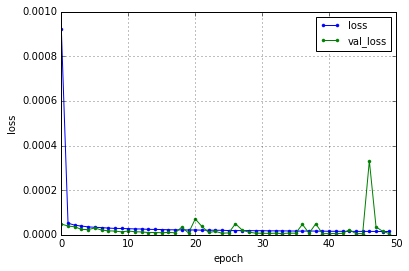

hiden node = 4
CommonName =_edim=4-Window=16-Overlap=4-AccY
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
14s - loss: 0.0114 - val_loss: 0.0011
Epoch 2/50
13s - loss: 8.8011e-04 - val_loss: 6.8159e-04
Epoch 3/50
15s - loss: 5.1073e-04 - val_loss: 2.9713e-04
Epoch 4/50
15s - loss: 2.5279e-04 - val_loss: 1.8471e-04
Epoch 5/50
15s - loss: 2.0244e-04 - val_loss: 0.0015
Epoch 6/50
14s - loss: 1.8226e-04 - val_loss: 1.4798e-04
Epoch 7/50
14s - loss: 1.6722e-04 - val_loss: 1.2609e-04
Epoch 8/50
15s - loss: 1.5600e-04 - val_loss: 5.2086e-04
Epoch 9/50
15s - loss: 1.4796e-04 - val_loss: 1.3210e-04
Epoch 10/50
14s - loss: 1.4334e-04 - val_loss: 1.0537e-04
Epoch 11/50
14s - loss: 1.3738e-04 - val_loss: 1.3209e-04
Epoch 12/50
14s - loss: 1.3557e-04 - val_loss: 1.0048e-04
Epoch 13/50
14s - loss: 1.3109e-04 - val_loss: 1.1164e-04
Epoch 14/50
15s - loss: 1.3033e-04 - val_loss: 9.3957e-05
Epoch 15/50
14s - loss: 1.2727e-04 - val_loss: 1.0069e-04
Epoch 16/50
16s - loss: 1.2535e-04 - val_

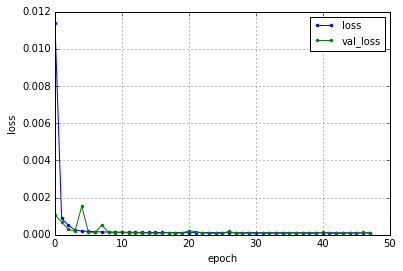

hiden node = 8
CommonName =_edim=8-Window=16-Overlap=4-AccY
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
15s - loss: 0.0077 - val_loss: 0.0011
Epoch 2/50
14s - loss: 7.6473e-04 - val_loss: 5.7927e-04
Epoch 3/50
15s - loss: 3.7246e-04 - val_loss: 2.6230e-04
Epoch 4/50
14s - loss: 2.6901e-04 - val_loss: 2.0064e-04
Epoch 5/50
15s - loss: 2.1912e-04 - val_loss: 1.5004e-04
Epoch 6/50
14s - loss: 1.8600e-04 - val_loss: 4.2906e-04
Epoch 7/50
14s - loss: 1.6444e-04 - val_loss: 1.2027e-04
Epoch 8/50
13s - loss: 1.4474e-04 - val_loss: 1.2413e-04
Epoch 9/50
14s - loss: 1.3479e-04 - val_loss: 7.7539e-05
Epoch 10/50
15s - loss: 1.2594e-04 - val_loss: 1.2327e-04
Epoch 11/50
15s - loss: 1.1998e-04 - val_loss: 6.7246e-05
Epoch 12/50
13s - loss: 1.1346e-04 - val_loss: 1.9269e-04
Epoch 13/50
14s - loss: 1.1064e-04 - val_loss: 1.8332e-04
Epoch 14/50
15s - loss: 1.0529e-04 - val_loss: 5.8932e-05
Epoch 15/50
14s - loss: 1.0555e-04 - val_loss: 5.8979e-05
Epoch 16/50
14s - loss: 1.0695e-04 - 

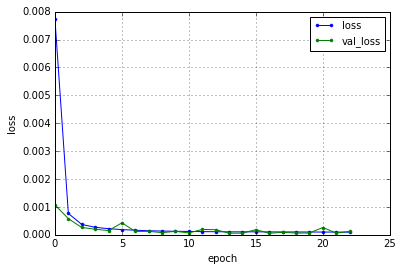

hiden node = 12
CommonName =_edim=12-Window=16-Overlap=4-AccY
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
16s - loss: 0.0077 - val_loss: 3.5662e-04
Epoch 2/50
14s - loss: 2.8952e-04 - val_loss: 1.8363e-04
Epoch 3/50
15s - loss: 2.1109e-04 - val_loss: 1.4737e-04
Epoch 4/50
14s - loss: 1.7971e-04 - val_loss: 1.1227e-04
Epoch 5/50
14s - loss: 1.6203e-04 - val_loss: 1.0103e-04
Epoch 6/50
14s - loss: 1.5114e-04 - val_loss: 9.0280e-05
Epoch 7/50
14s - loss: 1.4218e-04 - val_loss: 1.3118e-04
Epoch 8/50
16s - loss: 1.3418e-04 - val_loss: 1.0366e-04
Epoch 9/50
15s - loss: 1.2982e-04 - val_loss: 4.4644e-04
Epoch 10/50
15s - loss: 1.2354e-04 - val_loss: 1.1152e-04
Epoch 11/50
14s - loss: 1.1915e-04 - val_loss: 6.9347e-05
Epoch 12/50
15s - loss: 1.1545e-04 - val_loss: 6.4621e-05
Epoch 13/50
16s - loss: 1.1319e-04 - val_loss: 9.2403e-05
Epoch 14/50
16s - loss: 1.0928e-04 - val_loss: 1.3213e-04
Epoch 15/50
13s - loss: 1.0581e-04 - val_loss: 1.0596e-04
Epoch 16/50
14s - loss: 1.0427e

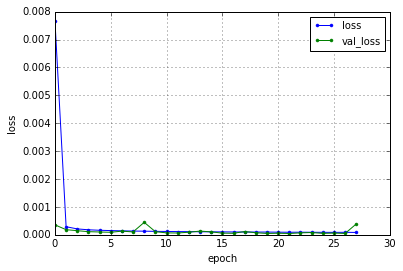

hiden node = 16
CommonName =_edim=16-Window=16-Overlap=4-AccY
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
14s - loss: 0.0059 - val_loss: 2.9088e-04
Epoch 2/50
14s - loss: 2.7114e-04 - val_loss: 1.8330e-04
Epoch 3/50
14s - loss: 2.0537e-04 - val_loss: 1.2686e-04
Epoch 4/50
14s - loss: 1.8467e-04 - val_loss: 2.0474e-04
Epoch 5/50
15s - loss: 1.6819e-04 - val_loss: 9.2925e-05
Epoch 6/50
16s - loss: 1.5795e-04 - val_loss: 8.4667e-05
Epoch 7/50
15s - loss: 1.4797e-04 - val_loss: 8.0646e-05
Epoch 8/50
14s - loss: 1.4135e-04 - val_loss: 7.4867e-05
Epoch 9/50
15s - loss: 1.3162e-04 - val_loss: 6.9582e-05
Epoch 10/50
15s - loss: 1.2871e-04 - val_loss: 9.5151e-05
Epoch 11/50
15s - loss: 1.2380e-04 - val_loss: 5.8042e-05
Epoch 12/50
15s - loss: 1.1788e-04 - val_loss: 5.8208e-05
Epoch 13/50
15s - loss: 1.1244e-04 - val_loss: 2.3104e-04
Epoch 14/50
15s - loss: 1.0722e-04 - val_loss: 5.1835e-05
Epoch 15/50
16s - loss: 1.0453e-04 - val_loss: 4.9213e-05
Epoch 16/50
15s - loss: 1.0266e

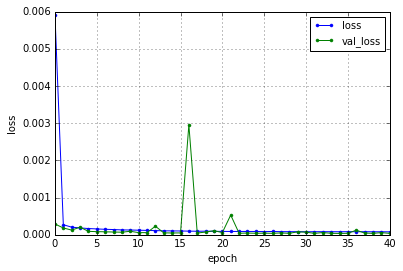

hiden node = 32
CommonName =_edim=32-Window=16-Overlap=4-AccY
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
17s - loss: 0.0027 - val_loss: 5.5301e-04
Epoch 2/50
15s - loss: 2.5281e-04 - val_loss: 1.4381e-04
Epoch 3/50
15s - loss: 1.9307e-04 - val_loss: 1.1831e-04
Epoch 4/50
15s - loss: 1.7385e-04 - val_loss: 8.4714e-05
Epoch 5/50
15s - loss: 1.5833e-04 - val_loss: 7.3423e-05
Epoch 6/50
15s - loss: 1.5047e-04 - val_loss: 6.4673e-05
Epoch 7/50
14s - loss: 1.4306e-04 - val_loss: 6.3420e-05
Epoch 8/50
14s - loss: 1.3690e-04 - val_loss: 9.7247e-05
Epoch 9/50
15s - loss: 1.2964e-04 - val_loss: 5.4253e-05
Epoch 10/50
16s - loss: 1.2378e-04 - val_loss: 1.1964e-04
Epoch 11/50
13s - loss: 1.1744e-04 - val_loss: 4.5159e-05
Epoch 12/50
15s - loss: 1.1017e-04 - val_loss: 4.1615e-05
Epoch 13/50
15s - loss: 1.0577e-04 - val_loss: 3.9989e-05
Epoch 14/50
16s - loss: 1.0044e-04 - val_loss: 3.7148e-05
Epoch 15/50
15s - loss: 1.0105e-04 - val_loss: 4.0256e-05
Epoch 16/50
15s - loss: 9.5937e

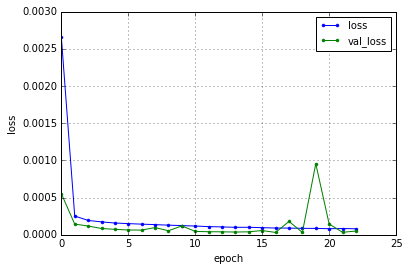

hiden node = 64
CommonName =_edim=64-Window=16-Overlap=4-AccY
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
24s - loss: 0.0013 - val_loss: 8.0934e-05
Epoch 2/50
31s - loss: 1.3873e-04 - val_loss: 6.3858e-05
Epoch 3/50
32s - loss: 1.2859e-04 - val_loss: 4.1119e-05
Epoch 4/50
36s - loss: 1.1878e-04 - val_loss: 5.0515e-05
Epoch 5/50
37s - loss: 1.1691e-04 - val_loss: 4.6544e-05
Epoch 6/50
36s - loss: 1.0860e-04 - val_loss: 3.6653e-05
Epoch 7/50
36s - loss: 1.0734e-04 - val_loss: 8.2674e-05
Epoch 8/50
36s - loss: 1.0332e-04 - val_loss: 3.2568e-05
Epoch 9/50
41s - loss: 9.5679e-05 - val_loss: 3.2965e-05
Epoch 10/50
47s - loss: 9.9538e-05 - val_loss: 3.1525e-05
Epoch 11/50
47s - loss: 9.5740e-05 - val_loss: 9.4334e-05
Epoch 12/50
48s - loss: 9.0482e-05 - val_loss: 2.8468e-05
Epoch 13/50
48s - loss: 8.9786e-05 - val_loss: 2.6854e-05
Epoch 14/50
47s - loss: 8.8659e-05 - val_loss: 2.4145e-05
Epoch 15/50
48s - loss: 8.4965e-05 - val_loss: 7.7913e-04
Epoch 16/50
49s - loss: 8.4304e

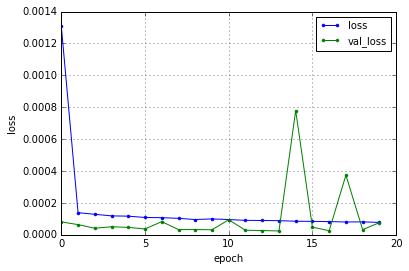

hiden node = 4
CommonName =_edim=4-Window=16-Overlap=4-AccZ
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
46s - loss: 0.0030 - val_loss: 7.5396e-04
Epoch 2/50
47s - loss: 5.2748e-04 - val_loss: 3.6425e-04
Epoch 3/50
49s - loss: 3.1533e-04 - val_loss: 2.6960e-04
Epoch 4/50
47s - loss: 2.4423e-04 - val_loss: 2.1363e-04
Epoch 5/50
44s - loss: 1.9928e-04 - val_loss: 1.7316e-04
Epoch 6/50
48s - loss: 1.6912e-04 - val_loss: 1.6579e-04
Epoch 7/50
48s - loss: 1.5063e-04 - val_loss: 1.3713e-04
Epoch 8/50
49s - loss: 1.4025e-04 - val_loss: 1.4004e-04
Epoch 9/50
48s - loss: 1.3179e-04 - val_loss: 1.3106e-04
Epoch 10/50
49s - loss: 1.2723e-04 - val_loss: 1.2220e-04
Epoch 11/50
48s - loss: 1.2341e-04 - val_loss: 1.2085e-04
Epoch 12/50
47s - loss: 1.2027e-04 - val_loss: 1.1211e-04
Epoch 13/50
48s - loss: 1.1782e-04 - val_loss: 1.1314e-04
Epoch 14/50
39s - loss: 1.1551e-04 - val_loss: 1.1581e-04
Epoch 15/50
39s - loss: 1.1409e-04 - val_loss: 1.0678e-04
Epoch 16/50
39s - loss: 1.1260e-0

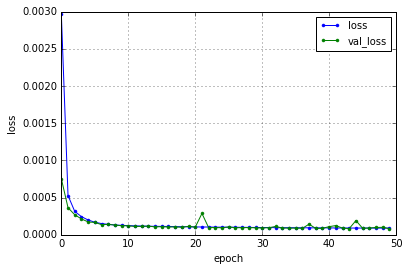

hiden node = 8
CommonName =_edim=8-Window=16-Overlap=4-AccZ
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
26s - loss: 0.0032 - val_loss: 3.9954e-04
Epoch 2/50
23s - loss: 3.1833e-04 - val_loss: 2.4861e-04
Epoch 3/50
25s - loss: 2.0443e-04 - val_loss: 1.6506e-04
Epoch 4/50
23s - loss: 1.3907e-04 - val_loss: 1.2030e-04
Epoch 5/50
24s - loss: 1.1130e-04 - val_loss: 1.0314e-04
Epoch 6/50
23s - loss: 9.9518e-05 - val_loss: 9.0483e-05
Epoch 7/50
24s - loss: 9.2823e-05 - val_loss: 8.3901e-05
Epoch 8/50
22s - loss: 8.7361e-05 - val_loss: 1.0371e-04
Epoch 9/50
23s - loss: 8.3679e-05 - val_loss: 7.4232e-05
Epoch 10/50
23s - loss: 7.9765e-05 - val_loss: 7.7670e-05
Epoch 11/50
24s - loss: 7.6326e-05 - val_loss: 7.2135e-05
Epoch 12/50
23s - loss: 7.3744e-05 - val_loss: 7.2276e-05
Epoch 13/50
22s - loss: 7.1632e-05 - val_loss: 6.2590e-05
Epoch 14/50
25s - loss: 6.9296e-05 - val_loss: 7.0768e-05
Epoch 15/50
24s - loss: 6.7044e-05 - val_loss: 7.2484e-05
Epoch 16/50
23s - loss: 6.5703e-0

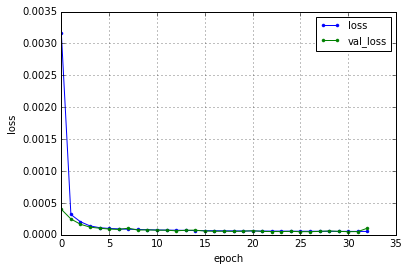

hiden node = 12
CommonName =_edim=12-Window=16-Overlap=4-AccZ
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
25s - loss: 0.0020 - val_loss: 2.7349e-04
Epoch 2/50
24s - loss: 1.9455e-04 - val_loss: 1.2847e-04
Epoch 3/50
22s - loss: 1.1231e-04 - val_loss: 9.0588e-05
Epoch 4/50
24s - loss: 8.5658e-05 - val_loss: 7.2245e-05
Epoch 5/50
24s - loss: 7.1213e-05 - val_loss: 6.5927e-05
Epoch 6/50
26s - loss: 6.2300e-05 - val_loss: 5.4371e-05
Epoch 7/50
25s - loss: 5.6886e-05 - val_loss: 5.7649e-05
Epoch 8/50
24s - loss: 5.2961e-05 - val_loss: 4.8475e-05
Epoch 9/50
24s - loss: 4.9696e-05 - val_loss: 4.5856e-05
Epoch 10/50
23s - loss: 4.7116e-05 - val_loss: 4.5877e-05
Epoch 11/50
24s - loss: 4.5223e-05 - val_loss: 3.9788e-05
Epoch 12/50
20s - loss: 4.3228e-05 - val_loss: 3.4880e-05
Epoch 13/50
24s - loss: 4.2069e-05 - val_loss: 3.7806e-05
Epoch 14/50
23s - loss: 4.0553e-05 - val_loss: 3.2421e-05
Epoch 15/50
23s - loss: 3.9702e-05 - val_loss: 3.1820e-05
Epoch 16/50
24s - loss: 3.8393e

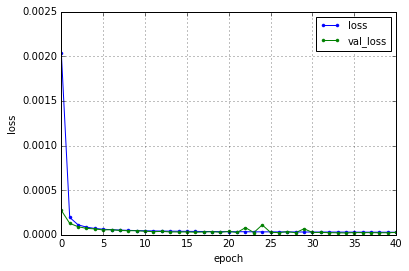

hiden node = 16
CommonName =_edim=16-Window=16-Overlap=4-AccZ
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
23s - loss: 0.0016 - val_loss: 2.3256e-04
Epoch 2/50
25s - loss: 1.5866e-04 - val_loss: 1.1302e-04
Epoch 3/50
25s - loss: 9.3930e-05 - val_loss: 7.5091e-05
Epoch 4/50
23s - loss: 7.2476e-05 - val_loss: 5.9013e-05
Epoch 5/50
15s - loss: 6.0663e-05 - val_loss: 1.2658e-04
Epoch 6/50
14s - loss: 5.4209e-05 - val_loss: 4.4522e-05
Epoch 7/50
16s - loss: 4.9850e-05 - val_loss: 3.9856e-05
Epoch 8/50
14s - loss: 4.5791e-05 - val_loss: 4.0919e-05
Epoch 9/50
13s - loss: 4.2826e-05 - val_loss: 3.5141e-05
Epoch 10/50
15s - loss: 4.0601e-05 - val_loss: 8.8159e-05
Epoch 11/50
14s - loss: 3.8632e-05 - val_loss: 2.9624e-05
Epoch 12/50
14s - loss: 3.6871e-05 - val_loss: 3.1966e-05
Epoch 13/50
15s - loss: 3.5017e-05 - val_loss: 1.8858e-04
Epoch 14/50
15s - loss: 3.3737e-05 - val_loss: 2.7336e-05
Epoch 15/50
14s - loss: 3.2261e-05 - val_loss: 2.3765e-05
Epoch 16/50
15s - loss: 3.1538e

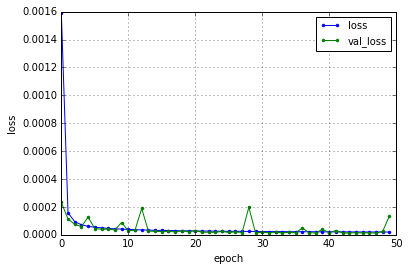

hiden node = 32
CommonName =_edim=32-Window=16-Overlap=4-AccZ
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
14s - loss: 6.7228e-04 - val_loss: 8.3791e-05
Epoch 2/50
14s - loss: 6.0861e-05 - val_loss: 4.3824e-05
Epoch 3/50
14s - loss: 3.8469e-05 - val_loss: 4.0438e-05
Epoch 4/50
13s - loss: 2.9638e-05 - val_loss: 2.6820e-05
Epoch 5/50
15s - loss: 2.4730e-05 - val_loss: 2.2781e-05
Epoch 6/50
14s - loss: 2.1364e-05 - val_loss: 1.7760e-05
Epoch 7/50
16s - loss: 1.9005e-05 - val_loss: 1.6312e-05
Epoch 8/50
14s - loss: 1.6845e-05 - val_loss: 1.4113e-05
Epoch 9/50
14s - loss: 1.5383e-05 - val_loss: 1.3149e-05
Epoch 10/50
15s - loss: 1.4248e-05 - val_loss: 3.9668e-05
Epoch 11/50
15s - loss: 1.3178e-05 - val_loss: 1.0886e-05
Epoch 12/50
13s - loss: 1.2230e-05 - val_loss: 9.8187e-06
Epoch 13/50
15s - loss: 1.1448e-05 - val_loss: 9.8996e-06
Epoch 14/50
14s - loss: 1.0695e-05 - val_loss: 9.1372e-06
Epoch 15/50
15s - loss: 1.0084e-05 - val_loss: 8.1042e-06
Epoch 16/50
14s - loss: 9.4

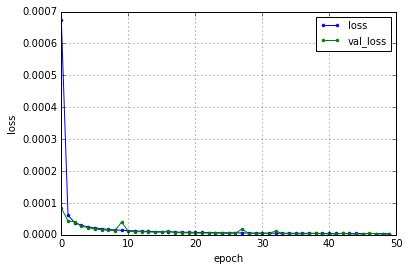

hiden node = 64
CommonName =_edim=64-Window=16-Overlap=4-AccZ
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
16s - loss: 7.0489e-04 - val_loss: 3.7194e-05
Epoch 2/50
15s - loss: 2.8577e-05 - val_loss: 2.1602e-05
Epoch 3/50
15s - loss: 2.0006e-05 - val_loss: 1.6503e-05
Epoch 4/50
15s - loss: 1.5520e-05 - val_loss: 1.3536e-05
Epoch 5/50
15s - loss: 1.2691e-05 - val_loss: 1.1043e-05
Epoch 6/50
15s - loss: 1.0796e-05 - val_loss: 9.3437e-06
Epoch 7/50
14s - loss: 9.4027e-06 - val_loss: 7.8198e-06
Epoch 8/50
16s - loss: 8.2427e-06 - val_loss: 6.9820e-06
Epoch 9/50
16s - loss: 7.3492e-06 - val_loss: 6.5692e-06
Epoch 10/50
16s - loss: 6.6755e-06 - val_loss: 5.6038e-06
Epoch 11/50
16s - loss: 6.0476e-06 - val_loss: 5.0604e-06
Epoch 12/50
15s - loss: 5.5306e-06 - val_loss: 4.3922e-06
Epoch 13/50
16s - loss: 5.0887e-06 - val_loss: 5.5547e-06
Epoch 14/50
16s - loss: 4.7427e-06 - val_loss: 8.9150e-06
Epoch 15/50
15s - loss: 4.3788e-06 - val_loss: 3.4605e-06
Epoch 16/50
15s - loss: 4.1

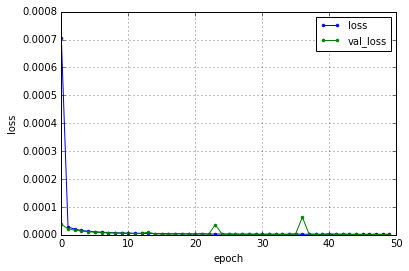

SampleNum= 32
Overlap= 8
AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =31839
SourceData's aborting data = 6
window shape is (31839, 32, 3)
(31839, 32, 3)
hiden node = 4
CommonName =_edim=4-Window=32-Overlap=8-AccX
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
3s - loss: 0.0237 - val_loss: 0.0035
Epoch 2/50
3s - loss: 0.0025 - val_loss: 0.0018
Epoch 3/50
3s - loss: 0.0016 - val_loss: 0.0014
Epoch 4/50
3s - loss: 0.0013 - val_loss: 0.0012
Epoch 5/50
3s - loss: 0.0011 - val_loss: 9.1517e-04
Epoch 6/50
4s - loss: 8.2481e-04 - val_loss: 7.1427e-04
Epoch 7/50
3s - loss: 6.7027e-04 - val_loss: 6.2801e-04
Epoch 8/50
3s - loss: 5.9359e-04 - val_loss: 5.3242e-04
Epoch 9/50
3s - loss: 5.5284e-04 - val_loss: 5.1173e-04
Epoch 10/50
4s - loss: 5.1306e-04 - val_loss: 6.0921e-04
Epoch 11/50
4s - loss: 4.8980e-04 - val_loss: 4.4356e-04
Epoch 12/50
3s - loss: 4.6573e-04 - val_loss: 4.2306e-04
Epoch 13/50
3s - loss: 4.3835e-04 -

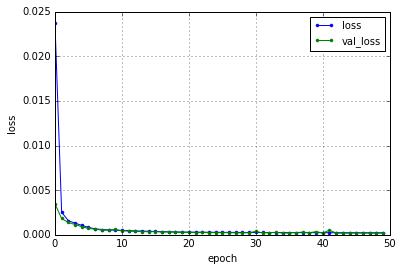

hiden node = 8
CommonName =_edim=8-Window=32-Overlap=8-AccX
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
4s - loss: 0.0134 - val_loss: 0.0016
Epoch 2/50
3s - loss: 0.0012 - val_loss: 8.4238e-04
Epoch 3/50
3s - loss: 6.8468e-04 - val_loss: 5.2176e-04
Epoch 4/50
3s - loss: 4.8348e-04 - val_loss: 3.8734e-04
Epoch 5/50
4s - loss: 3.9555e-04 - val_loss: 3.3588e-04
Epoch 6/50
4s - loss: 3.4908e-04 - val_loss: 6.5899e-04
Epoch 7/50
3s - loss: 3.1907e-04 - val_loss: 2.6330e-04
Epoch 8/50
4s - loss: 2.9667e-04 - val_loss: 2.8362e-04
Epoch 9/50
4s - loss: 2.8213e-04 - val_loss: 2.3486e-04
Epoch 10/50
3s - loss: 2.6908e-04 - val_loss: 3.5209e-04
Epoch 11/50
3s - loss: 2.5945e-04 - val_loss: 2.7185e-04
Epoch 12/50
4s - loss: 2.5415e-04 - val_loss: 2.4389e-04
Epoch 13/50
3s - loss: 2.4451e-04 - val_loss: 2.1652e-04
Epoch 14/50
3s - loss: 2.3948e-04 - val_loss: 1.9488e-04
Epoch 15/50
4s - loss: 2.3099e-04 - val_loss: 9.4211e-04
Epoch 16/50
3s - loss: 2.2527e-04 - val_loss: 1.8934e-04

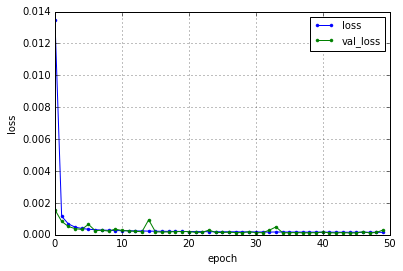

hiden node = 12
CommonName =_edim=12-Window=32-Overlap=8-AccX
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
3s - loss: 0.0077 - val_loss: 0.0011
Epoch 2/50
3s - loss: 7.5548e-04 - val_loss: 9.0825e-04
Epoch 3/50
3s - loss: 5.0345e-04 - val_loss: 3.9994e-04
Epoch 4/50
3s - loss: 4.0779e-04 - val_loss: 3.2900e-04
Epoch 5/50
3s - loss: 3.4978e-04 - val_loss: 2.9039e-04
Epoch 6/50
3s - loss: 3.1222e-04 - val_loss: 2.8875e-04
Epoch 7/50
3s - loss: 2.8467e-04 - val_loss: 2.4616e-04
Epoch 8/50
3s - loss: 2.6361e-04 - val_loss: 2.1693e-04
Epoch 9/50
3s - loss: 2.4862e-04 - val_loss: 2.2527e-04
Epoch 10/50
3s - loss: 2.3512e-04 - val_loss: 2.0291e-04
Epoch 11/50
3s - loss: 2.2563e-04 - val_loss: 1.7324e-04
Epoch 12/50
3s - loss: 2.1778e-04 - val_loss: 1.6610e-04
Epoch 13/50
3s - loss: 2.0653e-04 - val_loss: 1.8701e-04
Epoch 14/50
3s - loss: 2.0280e-04 - val_loss: 3.4679e-04
Epoch 15/50
4s - loss: 1.9648e-04 - val_loss: 2.0777e-04
Epoch 16/50
3s - loss: 1.9555e-04 - val_loss: 1.67

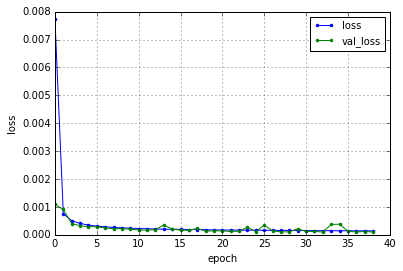

hiden node = 16
CommonName =_edim=16-Window=32-Overlap=8-AccX
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
3s - loss: 0.0124 - val_loss: 9.9807e-04
Epoch 2/50
3s - loss: 7.1619e-04 - val_loss: 5.3765e-04
Epoch 3/50
4s - loss: 4.2024e-04 - val_loss: 3.2247e-04
Epoch 4/50
3s - loss: 3.2921e-04 - val_loss: 2.4726e-04
Epoch 5/50
3s - loss: 2.8119e-04 - val_loss: 2.0927e-04
Epoch 6/50
3s - loss: 2.5128e-04 - val_loss: 1.8851e-04
Epoch 7/50
3s - loss: 2.3098e-04 - val_loss: 1.7633e-04
Epoch 8/50
4s - loss: 2.1532e-04 - val_loss: 1.6820e-04
Epoch 9/50
3s - loss: 2.0812e-04 - val_loss: 1.6659e-04
Epoch 10/50
4s - loss: 1.9564e-04 - val_loss: 1.4645e-04
Epoch 11/50
4s - loss: 1.9250e-04 - val_loss: 1.5614e-04
Epoch 12/50
3s - loss: 1.8347e-04 - val_loss: 1.4588e-04
Epoch 13/50
3s - loss: 1.8460e-04 - val_loss: 1.6029e-04
Epoch 14/50
3s - loss: 1.7152e-04 - val_loss: 1.1861e-04
Epoch 15/50
4s - loss: 1.6849e-04 - val_loss: 2.2540e-04
Epoch 16/50
3s - loss: 1.6988e-04 - val_loss: 

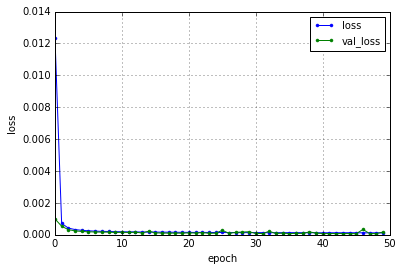

hiden node = 32
CommonName =_edim=32-Window=32-Overlap=8-AccX
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
3s - loss: 0.0036 - val_loss: 4.8610e-04
Epoch 2/50
3s - loss: 4.0951e-04 - val_loss: 2.8205e-04
Epoch 3/50
4s - loss: 3.0329e-04 - val_loss: 5.4031e-04
Epoch 4/50
3s - loss: 2.5257e-04 - val_loss: 4.1874e-04
Epoch 5/50
3s - loss: 2.2714e-04 - val_loss: 1.9473e-04
Epoch 6/50
3s - loss: 2.1019e-04 - val_loss: 1.4568e-04
Epoch 7/50
4s - loss: 2.0273e-04 - val_loss: 1.4196e-04
Epoch 8/50
3s - loss: 1.8683e-04 - val_loss: 1.3742e-04
Epoch 9/50
3s - loss: 1.8331e-04 - val_loss: 1.6852e-04
Epoch 10/50
3s - loss: 1.6974e-04 - val_loss: 1.9087e-04
Epoch 11/50
3s - loss: 1.6477e-04 - val_loss: 3.3544e-04
Epoch 12/50
4s - loss: 1.5624e-04 - val_loss: 9.3998e-05
Epoch 13/50
3s - loss: 1.5134e-04 - val_loss: 9.3827e-05
Epoch 14/50
3s - loss: 1.5128e-04 - val_loss: 5.1882e-04
Epoch 15/50
4s - loss: 1.4837e-04 - val_loss: 8.9694e-05
Epoch 16/50
3s - loss: 1.4472e-04 - val_loss: 

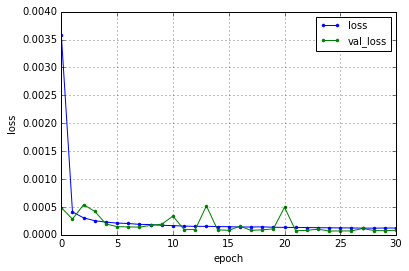

hiden node = 64
CommonName =_edim=64-Window=32-Overlap=8-AccX
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
3s - loss: 0.0037 - val_loss: 2.6554e-04
Epoch 2/50
3s - loss: 2.7110e-04 - val_loss: 1.8285e-04
Epoch 3/50
3s - loss: 2.2038e-04 - val_loss: 1.5442e-04
Epoch 4/50
3s - loss: 1.9364e-04 - val_loss: 6.8382e-04
Epoch 5/50
3s - loss: 1.8271e-04 - val_loss: 1.6172e-04
Epoch 6/50
3s - loss: 1.7347e-04 - val_loss: 1.2489e-04
Epoch 7/50
3s - loss: 1.6023e-04 - val_loss: 8.9096e-05
Epoch 8/50
3s - loss: 1.5427e-04 - val_loss: 8.9502e-05
Epoch 9/50
4s - loss: 1.5073e-04 - val_loss: 1.3092e-04
Epoch 10/50
4s - loss: 1.4317e-04 - val_loss: 4.1102e-04
Epoch 11/50
3s - loss: 1.4286e-04 - val_loss: 7.5949e-05
Epoch 12/50
3s - loss: 1.3823e-04 - val_loss: 7.0784e-05
Epoch 13/50
3s - loss: 1.3675e-04 - val_loss: 8.0087e-05
Epoch 14/50
3s - loss: 1.3152e-04 - val_loss: 9.0387e-05
Epoch 15/50
3s - loss: 1.2817e-04 - val_loss: 5.0420e-04
Epoch 16/50
3s - loss: 1.2441e-04 - val_loss: 

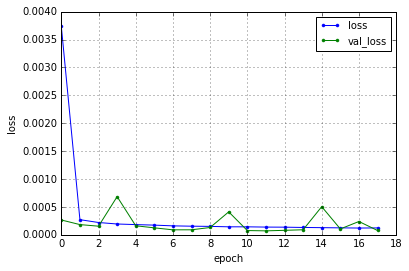

hiden node = 4
CommonName =_edim=4-Window=32-Overlap=8-AccY
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
3s - loss: 0.0466 - val_loss: 0.0035
Epoch 2/50
3s - loss: 0.0027 - val_loss: 0.0025
Epoch 3/50
3s - loss: 0.0016 - val_loss: 0.0012
Epoch 4/50
3s - loss: 0.0010 - val_loss: 7.9197e-04
Epoch 5/50
4s - loss: 8.1238e-04 - val_loss: 6.7523e-04
Epoch 6/50
3s - loss: 7.0990e-04 - val_loss: 9.6093e-04
Epoch 7/50
3s - loss: 6.2437e-04 - val_loss: 5.0816e-04
Epoch 8/50
4s - loss: 5.7295e-04 - val_loss: 4.8587e-04
Epoch 9/50
3s - loss: 5.2619e-04 - val_loss: 4.1377e-04
Epoch 10/50
3s - loss: 4.9172e-04 - val_loss: 4.7940e-04
Epoch 11/50
3s - loss: 4.7826e-04 - val_loss: 3.9512e-04
Epoch 12/50
4s - loss: 4.6322e-04 - val_loss: 3.5264e-04
Epoch 13/50
3s - loss: 4.4128e-04 - val_loss: 3.4074e-04
Epoch 14/50
4s - loss: 4.3801e-04 - val_loss: 0.0012
Epoch 15/50
4s - loss: 4.2593e-04 - val_loss: 3.2686e-04
Epoch 16/50
4s - loss: 4.1571e-04 - val_loss: 3.1980e-04
Epoch 17/50
3s - lo

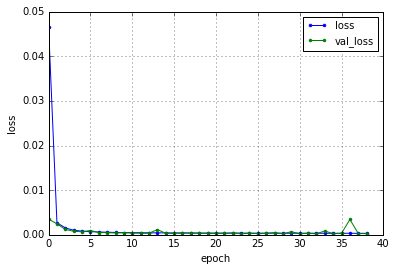

hiden node = 8
CommonName =_edim=8-Window=32-Overlap=8-AccY
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
4s - loss: 0.0352 - val_loss: 0.0028
Epoch 2/50
3s - loss: 0.0022 - val_loss: 0.0015
Epoch 3/50
3s - loss: 0.0012 - val_loss: 8.4426e-04
Epoch 4/50
3s - loss: 8.4968e-04 - val_loss: 6.3761e-04
Epoch 5/50
3s - loss: 7.0273e-04 - val_loss: 5.2180e-04
Epoch 6/50
3s - loss: 6.0345e-04 - val_loss: 4.3681e-04
Epoch 7/50
4s - loss: 5.4063e-04 - val_loss: 3.8987e-04
Epoch 8/50
4s - loss: 4.9986e-04 - val_loss: 8.4456e-04
Epoch 9/50
3s - loss: 4.6343e-04 - val_loss: 3.1511e-04
Epoch 10/50
3s - loss: 4.3781e-04 - val_loss: 2.9664e-04
Epoch 11/50
4s - loss: 4.2873e-04 - val_loss: 2.6710e-04
Epoch 12/50
4s - loss: 4.1823e-04 - val_loss: 2.5954e-04
Epoch 13/50
4s - loss: 3.8645e-04 - val_loss: 6.0854e-04
Epoch 14/50
3s - loss: 3.7184e-04 - val_loss: 2.9705e-04
Epoch 15/50
4s - loss: 3.7231e-04 - val_loss: 2.4833e-04
Epoch 16/50
4s - loss: 3.6198e-04 - val_loss: 3.1968e-04
Epoch 1

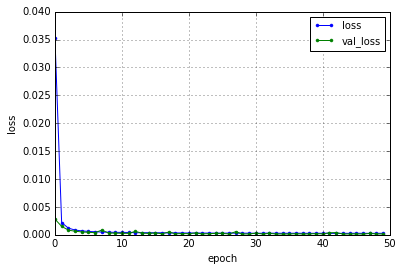

hiden node = 12
CommonName =_edim=12-Window=32-Overlap=8-AccY
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
4s - loss: 0.0248 - val_loss: 0.0022
Epoch 2/50
4s - loss: 0.0016 - val_loss: 0.0010
Epoch 3/50
3s - loss: 8.8089e-04 - val_loss: 7.5996e-04
Epoch 4/50
4s - loss: 6.9636e-04 - val_loss: 4.7934e-04
Epoch 5/50
3s - loss: 6.0257e-04 - val_loss: 4.5672e-04
Epoch 6/50
4s - loss: 5.3594e-04 - val_loss: 7.4949e-04
Epoch 7/50
4s - loss: 5.1028e-04 - val_loss: 3.1931e-04
Epoch 8/50
3s - loss: 4.7841e-04 - val_loss: 3.5028e-04
Epoch 9/50
3s - loss: 4.5712e-04 - val_loss: 0.0010
Epoch 10/50
4s - loss: 4.3187e-04 - val_loss: 2.6299e-04
Epoch 11/50
3s - loss: 4.2886e-04 - val_loss: 2.3398e-04
Epoch 12/50
3s - loss: 4.2093e-04 - val_loss: 2.2249e-04
Epoch 13/50
3s - loss: 3.9483e-04 - val_loss: 2.3591e-04
Epoch 14/50
3s - loss: 3.9249e-04 - val_loss: 2.7925e-04
Epoch 15/50
3s - loss: 3.7012e-04 - val_loss: 2.0327e-04
Epoch 16/50
3s - loss: 3.6861e-04 - val_loss: 1.9137e-04
Epoch

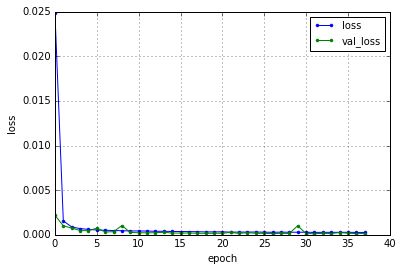

hiden node = 16
CommonName =_edim=16-Window=32-Overlap=8-AccY
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
4s - loss: 0.0164 - val_loss: 0.0015
Epoch 2/50
3s - loss: 0.0011 - val_loss: 7.5418e-04
Epoch 3/50
4s - loss: 7.3750e-04 - val_loss: 6.1236e-04
Epoch 4/50
4s - loss: 6.2233e-04 - val_loss: 4.3117e-04
Epoch 5/50
3s - loss: 5.7391e-04 - val_loss: 7.3548e-04
Epoch 6/50
3s - loss: 5.2906e-04 - val_loss: 4.1980e-04
Epoch 7/50
3s - loss: 5.1282e-04 - val_loss: 3.3721e-04
Epoch 8/50
3s - loss: 4.6632e-04 - val_loss: 2.7367e-04
Epoch 9/50
3s - loss: 4.5506e-04 - val_loss: 2.8208e-04
Epoch 10/50
3s - loss: 4.5118e-04 - val_loss: 5.6968e-04
Epoch 11/50
3s - loss: 4.4000e-04 - val_loss: 8.4742e-04
Epoch 12/50
3s - loss: 4.3549e-04 - val_loss: 2.5128e-04
Epoch 13/50
3s - loss: 4.2370e-04 - val_loss: 2.0588e-04
Epoch 14/50
3s - loss: 3.8832e-04 - val_loss: 2.5867e-04
Epoch 15/50
3s - loss: 3.8138e-04 - val_loss: 4.7686e-04
Epoch 16/50
4s - loss: 3.6508e-04 - val_loss: 3.3466e-

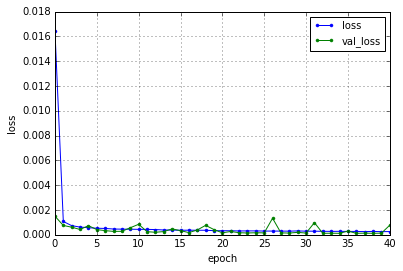

hiden node = 32
CommonName =_edim=32-Window=32-Overlap=8-AccY
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
4s - loss: 0.0108 - val_loss: 8.6221e-04
Epoch 2/50
3s - loss: 8.1298e-04 - val_loss: 0.0011
Epoch 3/50
3s - loss: 6.3225e-04 - val_loss: 3.7063e-04
Epoch 4/50
4s - loss: 5.6602e-04 - val_loss: 3.5643e-04
Epoch 5/50
3s - loss: 5.3906e-04 - val_loss: 2.9199e-04
Epoch 6/50
3s - loss: 5.1113e-04 - val_loss: 7.1107e-04
Epoch 7/50
3s - loss: 5.0712e-04 - val_loss: 3.0512e-04
Epoch 8/50
3s - loss: 4.8124e-04 - val_loss: 3.3614e-04
Epoch 9/50
3s - loss: 4.8776e-04 - val_loss: 2.9877e-04
Epoch 10/50
4s - loss: 4.5873e-04 - val_loss: 2.1006e-04
Epoch 11/50
3s - loss: 4.4048e-04 - val_loss: 2.0842e-04
Epoch 12/50
3s - loss: 4.3903e-04 - val_loss: 4.3123e-04
Epoch 13/50
3s - loss: 4.2232e-04 - val_loss: 3.6782e-04
Epoch 14/50
4s - loss: 4.3157e-04 - val_loss: 1.8210e-04
Epoch 15/50
4s - loss: 4.1647e-04 - val_loss: 3.5758e-04
Epoch 16/50
3s - loss: 3.9465e-04 - val_loss: 1.82

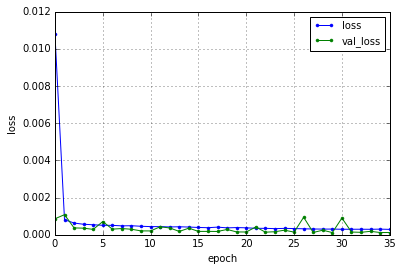

hiden node = 64
CommonName =_edim=64-Window=32-Overlap=8-AccY
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
3s - loss: 0.0070 - val_loss: 4.7769e-04
Epoch 2/50
3s - loss: 5.7358e-04 - val_loss: 0.0015
Epoch 3/50
3s - loss: 5.4261e-04 - val_loss: 2.6560e-04
Epoch 4/50
3s - loss: 5.2363e-04 - val_loss: 2.9447e-04
Epoch 5/50
4s - loss: 5.1084e-04 - val_loss: 0.0014
Epoch 6/50
3s - loss: 4.7803e-04 - val_loss: 1.9543e-04
Epoch 7/50
3s - loss: 4.7184e-04 - val_loss: 2.6898e-04
Epoch 8/50
3s - loss: 4.6841e-04 - val_loss: 3.2784e-04
Epoch 9/50
3s - loss: 4.4726e-04 - val_loss: 2.5872e-04
Epoch 10/50
3s - loss: 4.4406e-04 - val_loss: 3.4728e-04
Epoch 11/50
4s - loss: 4.4454e-04 - val_loss: 6.3527e-04
Epoch 12/50
3s - loss: 4.4481e-04 - val_loss: 0.0013


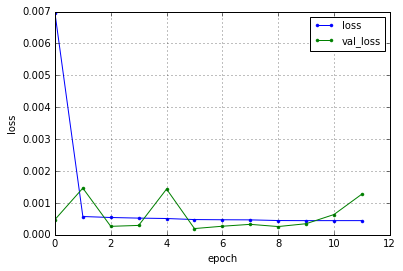

hiden node = 4
CommonName =_edim=4-Window=32-Overlap=8-AccZ
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
4s - loss: 0.0155 - val_loss: 0.0020
Epoch 2/50
3s - loss: 0.0015 - val_loss: 0.0012
Epoch 3/50
3s - loss: 0.0010 - val_loss: 9.3093e-04
Epoch 4/50
4s - loss: 8.8184e-04 - val_loss: 8.1156e-04
Epoch 5/50
3s - loss: 7.8263e-04 - val_loss: 7.2480e-04
Epoch 6/50
4s - loss: 7.0461e-04 - val_loss: 6.5540e-04
Epoch 7/50
3s - loss: 6.4049e-04 - val_loss: 6.0018e-04
Epoch 8/50
4s - loss: 5.9546e-04 - val_loss: 5.6802e-04
Epoch 9/50
3s - loss: 5.6211e-04 - val_loss: 5.3449e-04
Epoch 10/50
3s - loss: 5.3986e-04 - val_loss: 5.4606e-04
Epoch 11/50
3s - loss: 5.2158e-04 - val_loss: 5.0847e-04
Epoch 12/50
3s - loss: 5.0585e-04 - val_loss: 5.0570e-04
Epoch 13/50
3s - loss: 4.9203e-04 - val_loss: 4.7503e-04
Epoch 14/50
3s - loss: 4.8049e-04 - val_loss: 4.6604e-04
Epoch 15/50
3s - loss: 4.6922e-04 - val_loss: 4.4917e-04
Epoch 16/50
3s - loss: 4.5789e-04 - val_loss: 4.3798e-04
Epoch 1

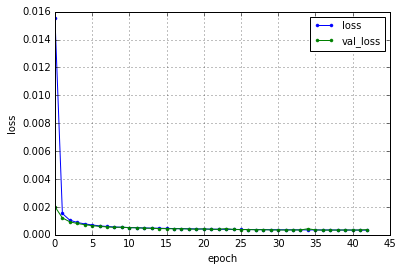

hiden node = 8
CommonName =_edim=8-Window=32-Overlap=8-AccZ
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
3s - loss: 0.0088 - val_loss: 0.0017
Epoch 2/50
3s - loss: 0.0013 - val_loss: 9.0385e-04
Epoch 3/50
3s - loss: 7.9411e-04 - val_loss: 7.1381e-04
Epoch 4/50
3s - loss: 6.6057e-04 - val_loss: 6.4674e-04
Epoch 5/50
3s - loss: 5.6200e-04 - val_loss: 5.0008e-04
Epoch 6/50
3s - loss: 4.6780e-04 - val_loss: 4.0838e-04
Epoch 7/50
3s - loss: 3.7969e-04 - val_loss: 3.2676e-04
Epoch 8/50
3s - loss: 3.1171e-04 - val_loss: 2.8838e-04
Epoch 9/50
3s - loss: 2.7018e-04 - val_loss: 2.6003e-04
Epoch 10/50
3s - loss: 2.4469e-04 - val_loss: 2.8401e-04
Epoch 11/50
3s - loss: 2.2655e-04 - val_loss: 2.0504e-04
Epoch 12/50
3s - loss: 2.1344e-04 - val_loss: 2.0161e-04
Epoch 13/50
3s - loss: 2.0385e-04 - val_loss: 1.9093e-04
Epoch 14/50
3s - loss: 1.9620e-04 - val_loss: 1.8417e-04
Epoch 15/50
3s - loss: 1.8916e-04 - val_loss: 1.8263e-04
Epoch 16/50
4s - loss: 1.8355e-04 - val_loss: 1.6706e-04

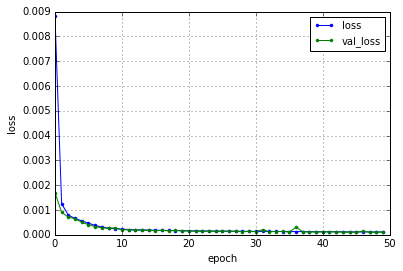

hiden node = 12
CommonName =_edim=12-Window=32-Overlap=8-AccZ
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
3s - loss: 0.0040 - val_loss: 9.6277e-04
Epoch 2/50
4s - loss: 7.1360e-04 - val_loss: 5.5447e-04
Epoch 3/50
3s - loss: 4.8281e-04 - val_loss: 4.0800e-04
Epoch 4/50
4s - loss: 3.7246e-04 - val_loss: 3.2421e-04
Epoch 5/50
4s - loss: 3.0596e-04 - val_loss: 2.7637e-04
Epoch 6/50
3s - loss: 2.6490e-04 - val_loss: 2.3908e-04
Epoch 7/50
3s - loss: 2.3602e-04 - val_loss: 2.1733e-04
Epoch 8/50
3s - loss: 2.1741e-04 - val_loss: 2.3328e-04
Epoch 9/50
3s - loss: 2.0234e-04 - val_loss: 2.3502e-04
Epoch 10/50
4s - loss: 1.9141e-04 - val_loss: 1.8661e-04
Epoch 11/50
4s - loss: 1.8177e-04 - val_loss: 2.2168e-04
Epoch 12/50
3s - loss: 1.7305e-04 - val_loss: 1.5717e-04
Epoch 13/50
3s - loss: 1.6550e-04 - val_loss: 1.7244e-04
Epoch 14/50
4s - loss: 1.5968e-04 - val_loss: 1.4684e-04
Epoch 15/50
3s - loss: 1.5238e-04 - val_loss: 1.4289e-04
Epoch 16/50
3s - loss: 1.4893e-04 - val_loss: 

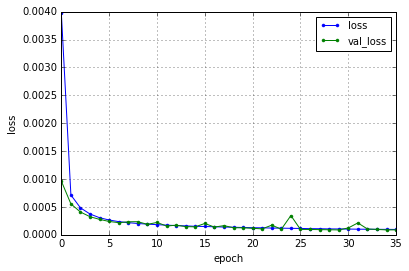

hiden node = 16
CommonName =_edim=16-Window=32-Overlap=8-AccZ
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
3s - loss: 0.0039 - val_loss: 7.5907e-04
Epoch 2/50
3s - loss: 6.1304e-04 - val_loss: 4.8086e-04
Epoch 3/50
3s - loss: 4.0597e-04 - val_loss: 3.3942e-04
Epoch 4/50
3s - loss: 3.0984e-04 - val_loss: 2.7360e-04
Epoch 5/50
3s - loss: 2.5703e-04 - val_loss: 2.3171e-04
Epoch 6/50
3s - loss: 2.2480e-04 - val_loss: 2.2815e-04
Epoch 7/50
4s - loss: 2.0155e-04 - val_loss: 1.9716e-04
Epoch 8/50
4s - loss: 1.8493e-04 - val_loss: 1.7342e-04
Epoch 9/50
3s - loss: 1.6962e-04 - val_loss: 1.5560e-04
Epoch 10/50
3s - loss: 1.5892e-04 - val_loss: 1.4151e-04
Epoch 11/50
3s - loss: 1.4869e-04 - val_loss: 1.2729e-04
Epoch 12/50
3s - loss: 1.3892e-04 - val_loss: 1.2227e-04
Epoch 13/50
3s - loss: 1.3201e-04 - val_loss: 1.1374e-04
Epoch 14/50
3s - loss: 1.2455e-04 - val_loss: 1.1886e-04
Epoch 15/50
3s - loss: 1.1797e-04 - val_loss: 2.9559e-04
Epoch 16/50
3s - loss: 1.1271e-04 - val_loss: 

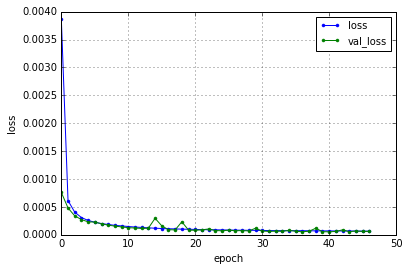

hiden node = 32
CommonName =_edim=32-Window=32-Overlap=8-AccZ
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
3s - loss: 0.0021 - val_loss: 5.2203e-04
Epoch 2/50
3s - loss: 3.8892e-04 - val_loss: 3.0370e-04
Epoch 3/50
3s - loss: 2.5092e-04 - val_loss: 2.0151e-04
Epoch 4/50
3s - loss: 1.8469e-04 - val_loss: 2.4264e-04
Epoch 5/50
3s - loss: 1.4855e-04 - val_loss: 1.3234e-04
Epoch 6/50
3s - loss: 1.2737e-04 - val_loss: 1.1261e-04
Epoch 7/50
3s - loss: 1.1169e-04 - val_loss: 9.5634e-05
Epoch 8/50
3s - loss: 1.0262e-04 - val_loss: 8.5729e-05
Epoch 9/50
3s - loss: 9.5834e-05 - val_loss: 8.3327e-05
Epoch 10/50
3s - loss: 8.9520e-05 - val_loss: 7.6047e-05
Epoch 11/50
3s - loss: 8.5015e-05 - val_loss: 9.8042e-05
Epoch 12/50
3s - loss: 8.1538e-05 - val_loss: 7.3873e-05
Epoch 13/50
3s - loss: 7.7506e-05 - val_loss: 7.6161e-05
Epoch 14/50
3s - loss: 7.5447e-05 - val_loss: 6.4082e-05
Epoch 15/50
4s - loss: 7.2582e-05 - val_loss: 6.7763e-05
Epoch 16/50
3s - loss: 7.1463e-05 - val_loss: 

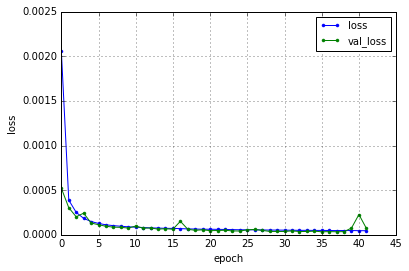

hiden node = 64
CommonName =_edim=64-Window=32-Overlap=8-AccZ
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
3s - loss: 0.0017 - val_loss: 2.6115e-04
Epoch 2/50
4s - loss: 1.8965e-04 - val_loss: 2.0317e-04
Epoch 3/50
3s - loss: 1.1972e-04 - val_loss: 1.2760e-04
Epoch 4/50
3s - loss: 9.3676e-05 - val_loss: 1.2252e-04
Epoch 5/50
4s - loss: 8.0416e-05 - val_loss: 7.1893e-05
Epoch 6/50
3s - loss: 7.1965e-05 - val_loss: 7.6018e-05
Epoch 7/50
3s - loss: 6.4847e-05 - val_loss: 6.1919e-05
Epoch 8/50
3s - loss: 6.1073e-05 - val_loss: 5.2715e-05
Epoch 9/50
3s - loss: 5.7957e-05 - val_loss: 5.2354e-05
Epoch 10/50
3s - loss: 5.4410e-05 - val_loss: 4.8603e-05
Epoch 11/50
3s - loss: 5.1489e-05 - val_loss: 4.2568e-05
Epoch 12/50
4s - loss: 4.9672e-05 - val_loss: 4.3672e-05
Epoch 13/50
3s - loss: 4.7269e-05 - val_loss: 3.6665e-05
Epoch 14/50
3s - loss: 4.5633e-05 - val_loss: 3.9342e-05
Epoch 15/50
3s - loss: 4.4327e-05 - val_loss: 3.4093e-05
Epoch 16/50
3s - loss: 4.2803e-05 - val_loss: 

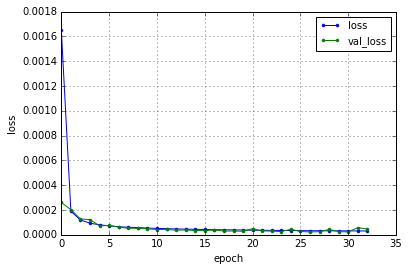

SampleNum= 64
Overlap= 16
AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =15918
SourceData's aborting data = 6
window shape is (15918, 64, 3)
(15918, 64, 3)
hiden node = 4
CommonName =_edim=4-Window=64-Overlap=16-AccX
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0448 - val_loss: 0.0100
Epoch 2/50
1s - loss: 0.0082 - val_loss: 0.0068
Epoch 3/50
0s - loss: 0.0058 - val_loss: 0.0048
Epoch 4/50
1s - loss: 0.0043 - val_loss: 0.0038
Epoch 5/50
0s - loss: 0.0036 - val_loss: 0.0033
Epoch 6/50
1s - loss: 0.0031 - val_loss: 0.0029
Epoch 7/50
1s - loss: 0.0028 - val_loss: 0.0028
Epoch 8/50
0s - loss: 0.0025 - val_loss: 0.0023
Epoch 9/50
1s - loss: 0.0023 - val_loss: 0.0023
Epoch 10/50
1s - loss: 0.0021 - val_loss: 0.0020
Epoch 11/50
0s - loss: 0.0020 - val_loss: 0.0019
Epoch 12/50
0s - loss: 0.0019 - val_loss: 0.0017
Epoch 13/50
1s - loss: 0.0018 - val_loss: 0.0016
Epoch 14/50
0s - loss: 0.0017 - val_loss: 0.

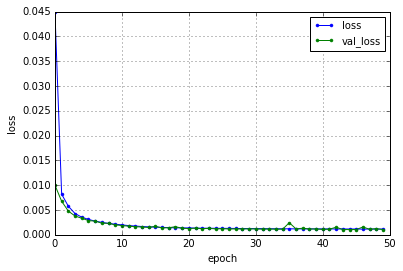

hiden node = 8
CommonName =_edim=8-Window=64-Overlap=16-AccX
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
0s - loss: 0.0431 - val_loss: 0.0080
Epoch 2/50
0s - loss: 0.0063 - val_loss: 0.0047
Epoch 3/50
0s - loss: 0.0041 - val_loss: 0.0034
Epoch 4/50
0s - loss: 0.0032 - val_loss: 0.0028
Epoch 5/50
1s - loss: 0.0026 - val_loss: 0.0023
Epoch 6/50
0s - loss: 0.0022 - val_loss: 0.0019
Epoch 7/50
0s - loss: 0.0018 - val_loss: 0.0015
Epoch 8/50
0s - loss: 0.0015 - val_loss: 0.0018
Epoch 9/50
1s - loss: 0.0013 - val_loss: 0.0012
Epoch 10/50
0s - loss: 0.0012 - val_loss: 0.0011
Epoch 11/50
1s - loss: 0.0011 - val_loss: 9.7172e-04
Epoch 12/50
1s - loss: 0.0010 - val_loss: 9.9734e-04
Epoch 13/50
1s - loss: 9.3177e-04 - val_loss: 0.0010
Epoch 14/50
0s - loss: 8.7272e-04 - val_loss: 7.9442e-04
Epoch 15/50
1s - loss: 8.3797e-04 - val_loss: 0.0011
Epoch 16/50
0s - loss: 8.0166e-04 - val_loss: 7.1648e-04
Epoch 17/50
0s - loss: 7.5502e-04 - val_loss: 6.8169e-04
Epoch 18/50
0s - loss: 7.

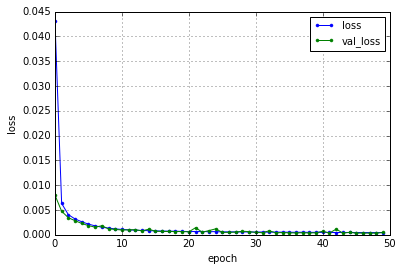

hiden node = 12
CommonName =_edim=12-Window=64-Overlap=16-AccX
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0353 - val_loss: 0.0069
Epoch 2/50
0s - loss: 0.0050 - val_loss: 0.0036
Epoch 3/50
0s - loss: 0.0030 - val_loss: 0.0025
Epoch 4/50
0s - loss: 0.0022 - val_loss: 0.0018
Epoch 5/50
0s - loss: 0.0017 - val_loss: 0.0014
Epoch 6/50
0s - loss: 0.0014 - val_loss: 0.0012
Epoch 7/50
0s - loss: 0.0012 - val_loss: 0.0011
Epoch 8/50
1s - loss: 0.0011 - val_loss: 0.0011
Epoch 9/50
1s - loss: 0.0010 - val_loss: 8.6328e-04
Epoch 10/50
0s - loss: 9.0006e-04 - val_loss: 8.5769e-04
Epoch 11/50
0s - loss: 8.4638e-04 - val_loss: 7.1251e-04
Epoch 12/50
0s - loss: 7.8540e-04 - val_loss: 7.0440e-04
Epoch 13/50
0s - loss: 7.2462e-04 - val_loss: 5.8053e-04
Epoch 14/50
0s - loss: 6.8896e-04 - val_loss: 0.0012
Epoch 15/50
0s - loss: 6.5243e-04 - val_loss: 5.9475e-04
Epoch 16/50
0s - loss: 6.3654e-04 - val_loss: 6.2794e-04
Epoch 17/50
0s - loss: 6.3226e-04 - val_loss: 4.6897e-04

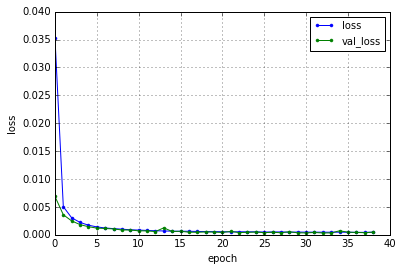

hiden node = 16
CommonName =_edim=16-Window=64-Overlap=16-AccX
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0250 - val_loss: 0.0047
Epoch 2/50
1s - loss: 0.0034 - val_loss: 0.0025
Epoch 3/50
1s - loss: 0.0022 - val_loss: 0.0017
Epoch 4/50
1s - loss: 0.0016 - val_loss: 0.0013
Epoch 5/50
1s - loss: 0.0013 - val_loss: 0.0012
Epoch 6/50
1s - loss: 0.0011 - val_loss: 0.0023
Epoch 7/50
1s - loss: 9.1482e-04 - val_loss: 9.8775e-04
Epoch 8/50
1s - loss: 8.3956e-04 - val_loss: 6.8419e-04
Epoch 9/50
0s - loss: 7.5024e-04 - val_loss: 6.0588e-04
Epoch 10/50
1s - loss: 7.0792e-04 - val_loss: 5.5971e-04
Epoch 11/50
1s - loss: 6.6655e-04 - val_loss: 7.9787e-04
Epoch 12/50
0s - loss: 6.2219e-04 - val_loss: 5.2669e-04
Epoch 13/50
1s - loss: 5.8769e-04 - val_loss: 4.3969e-04
Epoch 14/50
0s - loss: 5.7524e-04 - val_loss: 5.5394e-04
Epoch 15/50
0s - loss: 5.6237e-04 - val_loss: 5.3941e-04
Epoch 16/50
0s - loss: 5.2969e-04 - val_loss: 3.8317e-04
Epoch 17/50
1s - loss: 5.1095e-0

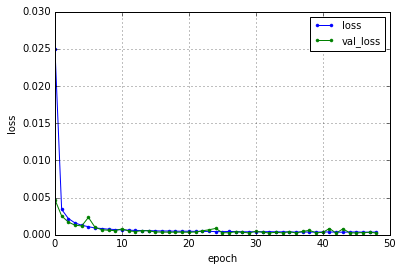

hiden node = 32
CommonName =_edim=32-Window=64-Overlap=16-AccX
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
0s - loss: 0.0228 - val_loss: 0.0031
Epoch 2/50
0s - loss: 0.0021 - val_loss: 0.0013
Epoch 3/50
0s - loss: 0.0012 - val_loss: 9.3407e-04
Epoch 4/50
0s - loss: 9.3842e-04 - val_loss: 0.0011
Epoch 5/50
0s - loss: 7.6250e-04 - val_loss: 6.4072e-04
Epoch 6/50
0s - loss: 6.9422e-04 - val_loss: 6.4925e-04
Epoch 7/50
0s - loss: 6.1753e-04 - val_loss: 4.4486e-04
Epoch 8/50
0s - loss: 5.7807e-04 - val_loss: 4.7733e-04
Epoch 9/50
1s - loss: 5.8946e-04 - val_loss: 4.0402e-04
Epoch 10/50
0s - loss: 5.3700e-04 - val_loss: 3.5458e-04
Epoch 11/50
0s - loss: 5.2260e-04 - val_loss: 4.5248e-04
Epoch 12/50
1s - loss: 5.0363e-04 - val_loss: 5.7567e-04
Epoch 13/50
0s - loss: 4.7739e-04 - val_loss: 3.1255e-04
Epoch 14/50
1s - loss: 4.6281e-04 - val_loss: 4.2606e-04
Epoch 15/50
0s - loss: 4.6726e-04 - val_loss: 3.5349e-04
Epoch 16/50
0s - loss: 4.4232e-04 - val_loss: 5.0032e-04
Epoch 17

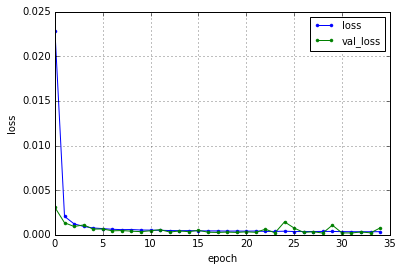

hiden node = 64
CommonName =_edim=64-Window=64-Overlap=16-AccX
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
0s - loss: 0.0151 - val_loss: 0.0015
Epoch 2/50
0s - loss: 0.0011 - val_loss: 7.2365e-04
Epoch 3/50
1s - loss: 7.3771e-04 - val_loss: 0.0016
Epoch 4/50
0s - loss: 6.0326e-04 - val_loss: 5.8782e-04
Epoch 5/50
0s - loss: 5.5415e-04 - val_loss: 3.9292e-04
Epoch 6/50
0s - loss: 5.2862e-04 - val_loss: 5.0466e-04
Epoch 7/50
0s - loss: 4.8131e-04 - val_loss: 5.9159e-04
Epoch 8/50
0s - loss: 4.6981e-04 - val_loss: 2.9128e-04
Epoch 9/50
0s - loss: 4.4050e-04 - val_loss: 3.5286e-04
Epoch 10/50
1s - loss: 4.4241e-04 - val_loss: 4.1175e-04
Epoch 11/50
0s - loss: 4.4648e-04 - val_loss: 4.2932e-04
Epoch 12/50
0s - loss: 3.9202e-04 - val_loss: 3.1195e-04
Epoch 13/50
1s - loss: 4.0993e-04 - val_loss: 4.4675e-04
Epoch 14/50
0s - loss: 3.9534e-04 - val_loss: 3.0793e-04


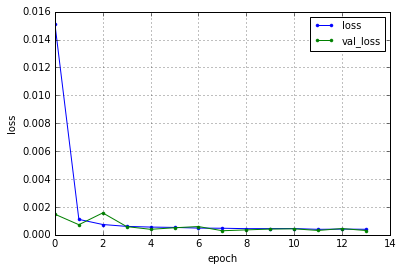

hiden node = 4
CommonName =_edim=4-Window=64-Overlap=16-AccY
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.1068 - val_loss: 0.0128
Epoch 2/50
0s - loss: 0.0098 - val_loss: 0.0078
Epoch 3/50
0s - loss: 0.0070 - val_loss: 0.0061
Epoch 4/50
0s - loss: 0.0055 - val_loss: 0.0046
Epoch 5/50
0s - loss: 0.0043 - val_loss: 0.0035
Epoch 6/50
0s - loss: 0.0034 - val_loss: 0.0029
Epoch 7/50
0s - loss: 0.0029 - val_loss: 0.0031
Epoch 8/50
1s - loss: 0.0026 - val_loss: 0.0022
Epoch 9/50
1s - loss: 0.0024 - val_loss: 0.0027
Epoch 10/50
0s - loss: 0.0022 - val_loss: 0.0023
Epoch 11/50
0s - loss: 0.0021 - val_loss: 0.0018
Epoch 12/50
0s - loss: 0.0020 - val_loss: 0.0022
Epoch 13/50
0s - loss: 0.0019 - val_loss: 0.0016
Epoch 14/50
0s - loss: 0.0018 - val_loss: 0.0017
Epoch 15/50
0s - loss: 0.0018 - val_loss: 0.0014
Epoch 16/50
0s - loss: 0.0017 - val_loss: 0.0028
Epoch 17/50
0s - loss: 0.0017 - val_loss: 0.0029
Epoch 18/50
1s - loss: 0.0017 - val_loss: 0.0012
Epoch 19/50
0s -

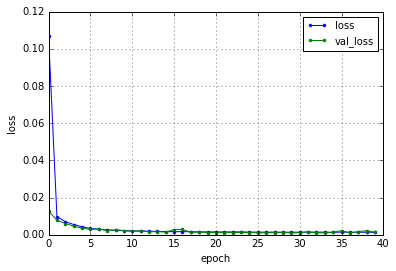

hiden node = 8
CommonName =_edim=8-Window=64-Overlap=16-AccY
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
0s - loss: 0.0843 - val_loss: 0.0088
Epoch 2/50
0s - loss: 0.0067 - val_loss: 0.0051
Epoch 3/50
0s - loss: 0.0045 - val_loss: 0.0034
Epoch 4/50
0s - loss: 0.0033 - val_loss: 0.0030
Epoch 5/50
0s - loss: 0.0028 - val_loss: 0.0025
Epoch 6/50
0s - loss: 0.0026 - val_loss: 0.0026
Epoch 7/50
0s - loss: 0.0024 - val_loss: 0.0025
Epoch 8/50
0s - loss: 0.0023 - val_loss: 0.0018
Epoch 9/50
0s - loss: 0.0021 - val_loss: 0.0032
Epoch 10/50
0s - loss: 0.0020 - val_loss: 0.0016
Epoch 11/50
0s - loss: 0.0019 - val_loss: 0.0014
Epoch 12/50
0s - loss: 0.0019 - val_loss: 0.0016
Epoch 13/50
0s - loss: 0.0018 - val_loss: 0.0013
Epoch 14/50
0s - loss: 0.0017 - val_loss: 0.0017
Epoch 15/50
0s - loss: 0.0016 - val_loss: 0.0010
Epoch 16/50
0s - loss: 0.0016 - val_loss: 0.0011
Epoch 17/50
0s - loss: 0.0014 - val_loss: 0.0021
Epoch 18/50
0s - loss: 0.0014 - val_loss: 9.0444e-04
Epoch 19/50


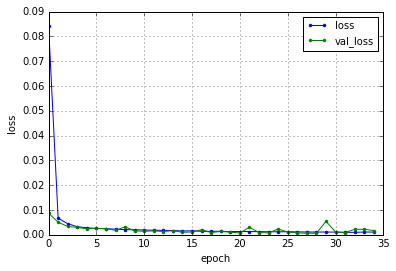

hiden node = 12
CommonName =_edim=12-Window=64-Overlap=16-AccY
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
0s - loss: 0.0659 - val_loss: 0.0072
Epoch 2/50
0s - loss: 0.0052 - val_loss: 0.0035
Epoch 3/50
0s - loss: 0.0032 - val_loss: 0.0024
Epoch 4/50
0s - loss: 0.0025 - val_loss: 0.0019
Epoch 5/50
0s - loss: 0.0022 - val_loss: 0.0016
Epoch 6/50
0s - loss: 0.0020 - val_loss: 0.0017
Epoch 7/50
0s - loss: 0.0018 - val_loss: 0.0015
Epoch 8/50
0s - loss: 0.0017 - val_loss: 0.0014
Epoch 9/50
0s - loss: 0.0016 - val_loss: 0.0014
Epoch 10/50
0s - loss: 0.0015 - val_loss: 0.0019
Epoch 11/50
1s - loss: 0.0015 - val_loss: 0.0015
Epoch 12/50
1s - loss: 0.0015 - val_loss: 0.0025
Epoch 13/50
1s - loss: 0.0014 - val_loss: 8.5106e-04
Epoch 14/50
0s - loss: 0.0015 - val_loss: 0.0015
Epoch 15/50
0s - loss: 0.0014 - val_loss: 0.0022
Epoch 16/50
0s - loss: 0.0013 - val_loss: 0.0015
Epoch 17/50
1s - loss: 0.0014 - val_loss: 7.6326e-04
Epoch 18/50
1s - loss: 0.0013 - val_loss: 0.0015
Epoch 

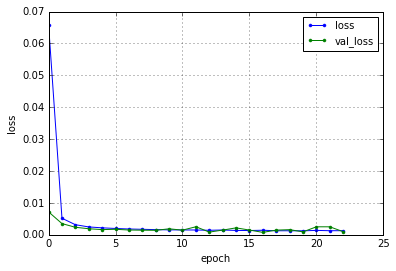

hiden node = 16
CommonName =_edim=16-Window=64-Overlap=16-AccY
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0546 - val_loss: 0.0063
Epoch 2/50
1s - loss: 0.0046 - val_loss: 0.0032
Epoch 3/50
1s - loss: 0.0031 - val_loss: 0.0029
Epoch 4/50
1s - loss: 0.0025 - val_loss: 0.0031
Epoch 5/50
0s - loss: 0.0022 - val_loss: 0.0022
Epoch 6/50
0s - loss: 0.0020 - val_loss: 0.0014
Epoch 7/50
1s - loss: 0.0020 - val_loss: 0.0019
Epoch 8/50
0s - loss: 0.0018 - val_loss: 0.0015
Epoch 9/50
1s - loss: 0.0017 - val_loss: 0.0011
Epoch 10/50
1s - loss: 0.0016 - val_loss: 0.0013
Epoch 11/50
1s - loss: 0.0015 - val_loss: 8.9350e-04
Epoch 12/50
1s - loss: 0.0014 - val_loss: 9.5090e-04
Epoch 13/50
1s - loss: 0.0014 - val_loss: 8.5002e-04
Epoch 14/50
1s - loss: 0.0014 - val_loss: 7.0659e-04
Epoch 15/50
1s - loss: 0.0013 - val_loss: 6.8985e-04
Epoch 16/50
1s - loss: 0.0013 - val_loss: 0.0012
Epoch 17/50
1s - loss: 0.0013 - val_loss: 0.0010
Epoch 18/50
1s - loss: 0.0013 - val_loss: 6

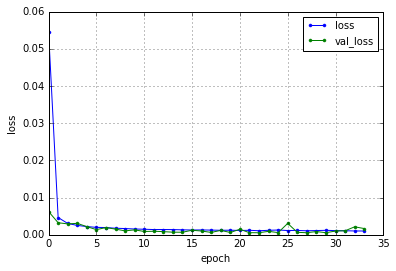

hiden node = 32
CommonName =_edim=32-Window=64-Overlap=16-AccY
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
0s - loss: 0.0381 - val_loss: 0.0038
Epoch 2/50
0s - loss: 0.0032 - val_loss: 0.0022
Epoch 3/50
0s - loss: 0.0024 - val_loss: 0.0016
Epoch 4/50
0s - loss: 0.0021 - val_loss: 0.0023
Epoch 5/50
0s - loss: 0.0018 - val_loss: 0.0011
Epoch 6/50
0s - loss: 0.0016 - val_loss: 0.0013
Epoch 7/50
0s - loss: 0.0017 - val_loss: 0.0013
Epoch 8/50
1s - loss: 0.0015 - val_loss: 0.0015
Epoch 9/50
1s - loss: 0.0015 - val_loss: 0.0014
Epoch 10/50
0s - loss: 0.0015 - val_loss: 8.6565e-04
Epoch 11/50
0s - loss: 0.0013 - val_loss: 0.0050
Epoch 12/50
0s - loss: 0.0015 - val_loss: 0.0011
Epoch 13/50
0s - loss: 0.0013 - val_loss: 0.0011
Epoch 14/50
0s - loss: 0.0014 - val_loss: 0.0011
Epoch 15/50
1s - loss: 0.0014 - val_loss: 0.0035
Epoch 16/50
1s - loss: 0.0013 - val_loss: 0.0029


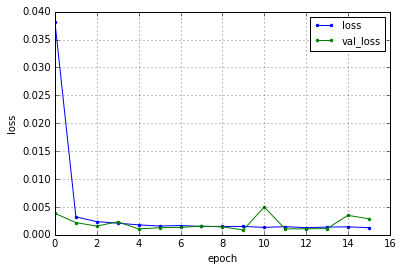

hiden node = 64
CommonName =_edim=64-Window=64-Overlap=16-AccY
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0312 - val_loss: 0.0023
Epoch 2/50
0s - loss: 0.0023 - val_loss: 0.0014
Epoch 3/50
0s - loss: 0.0020 - val_loss: 0.0010
Epoch 4/50
0s - loss: 0.0017 - val_loss: 0.0017
Epoch 5/50
1s - loss: 0.0017 - val_loss: 0.0010
Epoch 6/50
1s - loss: 0.0014 - val_loss: 0.0010
Epoch 7/50
0s - loss: 0.0014 - val_loss: 0.0012
Epoch 8/50
0s - loss: 0.0014 - val_loss: 7.6392e-04
Epoch 9/50
1s - loss: 0.0014 - val_loss: 6.2617e-04
Epoch 10/50
0s - loss: 0.0015 - val_loss: 9.8181e-04
Epoch 11/50
1s - loss: 0.0014 - val_loss: 0.0025
Epoch 12/50
1s - loss: 0.0014 - val_loss: 6.6480e-04
Epoch 13/50
1s - loss: 0.0014 - val_loss: 0.0014
Epoch 14/50
1s - loss: 0.0013 - val_loss: 5.4448e-04
Epoch 15/50
1s - loss: 0.0012 - val_loss: 0.0020
Epoch 16/50
0s - loss: 0.0014 - val_loss: 5.2581e-04
Epoch 17/50
1s - loss: 0.0012 - val_loss: 0.0010
Epoch 18/50
1s - loss: 0.0013 - val_los

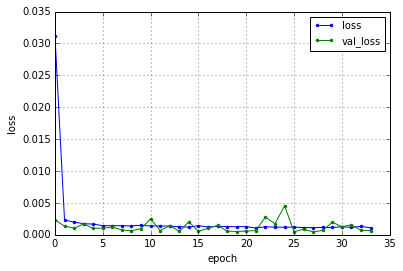

hiden node = 4
CommonName =_edim=4-Window=64-Overlap=16-AccZ
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
0s - loss: 0.0195 - val_loss: 0.0059
Epoch 2/50
0s - loss: 0.0047 - val_loss: 0.0040
Epoch 3/50
0s - loss: 0.0034 - val_loss: 0.0029
Epoch 4/50
0s - loss: 0.0025 - val_loss: 0.0022
Epoch 5/50
1s - loss: 0.0021 - val_loss: 0.0020
Epoch 6/50
1s - loss: 0.0019 - val_loss: 0.0018
Epoch 7/50
1s - loss: 0.0018 - val_loss: 0.0017
Epoch 8/50
1s - loss: 0.0017 - val_loss: 0.0016
Epoch 9/50
0s - loss: 0.0016 - val_loss: 0.0015
Epoch 10/50
1s - loss: 0.0015 - val_loss: 0.0014
Epoch 11/50
0s - loss: 0.0014 - val_loss: 0.0014
Epoch 12/50
0s - loss: 0.0013 - val_loss: 0.0013
Epoch 13/50
0s - loss: 0.0013 - val_loss: 0.0012
Epoch 14/50
0s - loss: 0.0012 - val_loss: 0.0012
Epoch 15/50
0s - loss: 0.0012 - val_loss: 0.0012
Epoch 16/50
1s - loss: 0.0012 - val_loss: 0.0012
Epoch 17/50
1s - loss: 0.0011 - val_loss: 0.0012
Epoch 18/50
1s - loss: 0.0011 - val_loss: 0.0011
Epoch 19/50
1s -

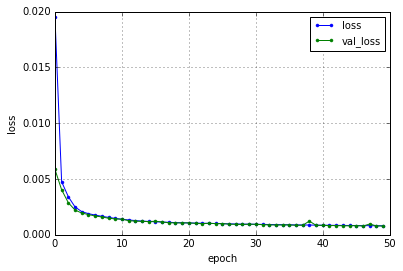

hiden node = 8
CommonName =_edim=8-Window=64-Overlap=16-AccZ
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0159 - val_loss: 0.0043
Epoch 2/50
1s - loss: 0.0033 - val_loss: 0.0025
Epoch 3/50
1s - loss: 0.0020 - val_loss: 0.0018
Epoch 4/50
1s - loss: 0.0016 - val_loss: 0.0015
Epoch 5/50
0s - loss: 0.0014 - val_loss: 0.0013
Epoch 6/50
0s - loss: 0.0013 - val_loss: 0.0012
Epoch 7/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 8/50
0s - loss: 0.0011 - val_loss: 0.0010
Epoch 9/50
0s - loss: 0.0010 - val_loss: 9.5153e-04
Epoch 10/50
1s - loss: 9.4985e-04 - val_loss: 9.1116e-04
Epoch 11/50
0s - loss: 9.0000e-04 - val_loss: 8.4719e-04
Epoch 12/50
1s - loss: 8.5711e-04 - val_loss: 8.5107e-04
Epoch 13/50
0s - loss: 8.1642e-04 - val_loss: 8.0314e-04
Epoch 14/50
0s - loss: 7.8984e-04 - val_loss: 7.6298e-04
Epoch 15/50
1s - loss: 7.6584e-04 - val_loss: 7.3499e-04
Epoch 16/50
1s - loss: 7.3885e-04 - val_loss: 7.3383e-04
Epoch 17/50
1s - loss: 7.1405e-04 - val_loss: 6.9256e-

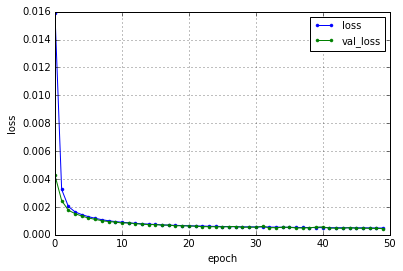

hiden node = 12
CommonName =_edim=12-Window=64-Overlap=16-AccZ
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
0s - loss: 0.0097 - val_loss: 0.0034
Epoch 2/50
0s - loss: 0.0026 - val_loss: 0.0020
Epoch 3/50
1s - loss: 0.0017 - val_loss: 0.0015
Epoch 4/50
1s - loss: 0.0014 - val_loss: 0.0013
Epoch 5/50
1s - loss: 0.0013 - val_loss: 0.0012
Epoch 6/50
1s - loss: 0.0011 - val_loss: 0.0011
Epoch 7/50
0s - loss: 0.0010 - val_loss: 9.6275e-04
Epoch 8/50
0s - loss: 9.4740e-04 - val_loss: 9.1581e-04
Epoch 9/50
0s - loss: 8.8225e-04 - val_loss: 8.3056e-04
Epoch 10/50
0s - loss: 8.3333e-04 - val_loss: 8.3446e-04
Epoch 11/50
0s - loss: 7.8901e-04 - val_loss: 7.9262e-04
Epoch 12/50
0s - loss: 7.4745e-04 - val_loss: 7.2173e-04
Epoch 13/50
0s - loss: 7.0734e-04 - val_loss: 6.8284e-04
Epoch 14/50
1s - loss: 6.7101e-04 - val_loss: 6.4893e-04
Epoch 15/50
0s - loss: 6.3494e-04 - val_loss: 6.1576e-04
Epoch 16/50
0s - loss: 6.0483e-04 - val_loss: 5.8239e-04
Epoch 17/50
0s - loss: 5.7281e-04 - 

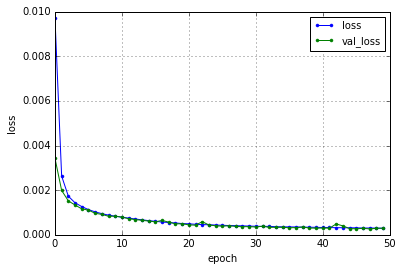

hiden node = 16
CommonName =_edim=16-Window=64-Overlap=16-AccZ
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0125 - val_loss: 0.0032
Epoch 2/50
1s - loss: 0.0022 - val_loss: 0.0017
Epoch 3/50
1s - loss: 0.0015 - val_loss: 0.0014
Epoch 4/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 5/50
1s - loss: 0.0011 - val_loss: 9.6619e-04
Epoch 6/50
0s - loss: 9.2448e-04 - val_loss: 8.6599e-04
Epoch 7/50
1s - loss: 8.3329e-04 - val_loss: 7.6715e-04
Epoch 8/50
0s - loss: 7.6096e-04 - val_loss: 7.2065e-04
Epoch 9/50
1s - loss: 7.0999e-04 - val_loss: 7.0403e-04
Epoch 10/50
0s - loss: 6.6389e-04 - val_loss: 6.3405e-04
Epoch 11/50
0s - loss: 6.2810e-04 - val_loss: 5.9126e-04
Epoch 12/50
0s - loss: 5.9626e-04 - val_loss: 5.5357e-04
Epoch 13/50
0s - loss: 5.7099e-04 - val_loss: 5.4380e-04
Epoch 14/50
0s - loss: 5.5174e-04 - val_loss: 5.0756e-04
Epoch 15/50
0s - loss: 5.3177e-04 - val_loss: 4.9046e-04
Epoch 16/50
0s - loss: 5.1618e-04 - val_loss: 4.7496e-04
Epoch 17/50
0s - los

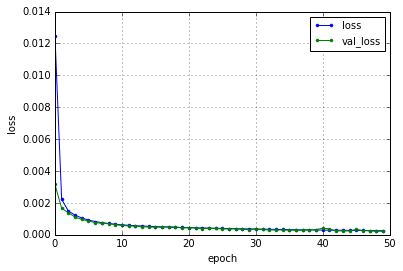

hiden node = 32
CommonName =_edim=32-Window=64-Overlap=16-AccZ
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
0s - loss: 0.0087 - val_loss: 0.0020
Epoch 2/50
0s - loss: 0.0015 - val_loss: 0.0012
Epoch 3/50
0s - loss: 0.0010 - val_loss: 8.9293e-04
Epoch 4/50
0s - loss: 8.2525e-04 - val_loss: 7.7157e-04
Epoch 5/50
0s - loss: 7.0198e-04 - val_loss: 6.3779e-04
Epoch 6/50
0s - loss: 6.0931e-04 - val_loss: 6.8190e-04
Epoch 7/50
1s - loss: 5.4866e-04 - val_loss: 5.0323e-04
Epoch 8/50
0s - loss: 4.9850e-04 - val_loss: 4.8031e-04
Epoch 9/50
1s - loss: 4.5667e-04 - val_loss: 4.2872e-04
Epoch 10/50
1s - loss: 4.2209e-04 - val_loss: 4.1086e-04
Epoch 11/50
0s - loss: 3.9160e-04 - val_loss: 3.7729e-04
Epoch 12/50
1s - loss: 3.6927e-04 - val_loss: 3.5484e-04
Epoch 13/50
0s - loss: 3.4575e-04 - val_loss: 4.2119e-04
Epoch 14/50
1s - loss: 3.3185e-04 - val_loss: 2.9980e-04
Epoch 15/50
1s - loss: 3.1541e-04 - val_loss: 3.0206e-04
Epoch 16/50
0s - loss: 3.0547e-04 - val_loss: 2.7369e-04
Epoc

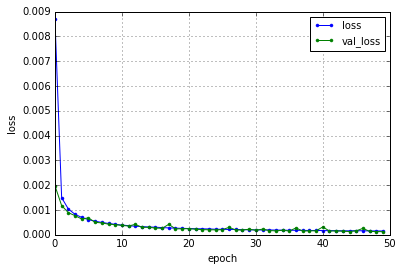

hiden node = 64
CommonName =_edim=64-Window=64-Overlap=16-AccZ
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
0s - loss: 0.0046 - val_loss: 0.0012
Epoch 2/50
0s - loss: 9.9161e-04 - val_loss: 7.7836e-04
Epoch 3/50
0s - loss: 6.8170e-04 - val_loss: 5.9874e-04
Epoch 4/50
0s - loss: 5.2814e-04 - val_loss: 4.5989e-04
Epoch 5/50
0s - loss: 4.3255e-04 - val_loss: 3.9302e-04
Epoch 6/50
0s - loss: 3.6892e-04 - val_loss: 3.4234e-04
Epoch 7/50
0s - loss: 3.2194e-04 - val_loss: 4.1703e-04
Epoch 8/50
0s - loss: 2.8859e-04 - val_loss: 2.9230e-04
Epoch 9/50
0s - loss: 2.6043e-04 - val_loss: 2.3954e-04
Epoch 10/50
0s - loss: 2.3849e-04 - val_loss: 2.1808e-04
Epoch 11/50
0s - loss: 2.1957e-04 - val_loss: 2.1540e-04
Epoch 12/50
0s - loss: 2.0452e-04 - val_loss: 2.0222e-04
Epoch 13/50
0s - loss: 1.9244e-04 - val_loss: 1.7666e-04
Epoch 14/50
1s - loss: 1.8184e-04 - val_loss: 1.6295e-04
Epoch 15/50
0s - loss: 1.7398e-04 - val_loss: 1.5643e-04
Epoch 16/50
1s - loss: 1.6378e-04 - val_loss: 1.5

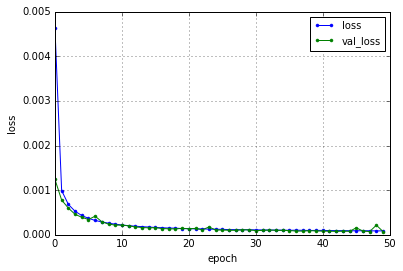

SampleNum= 128
Overlap= 32
AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =7957
SourceData's aborting data = 22
window shape is (7957, 128, 3)
(7957, 128, 3)
hiden node = 4
CommonName =_edim=4-Window=128-Overlap=32-AccX
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.1555 - val_loss: 0.0572
Epoch 2/50
0s - loss: 0.0357 - val_loss: 0.0240
Epoch 3/50
0s - loss: 0.0200 - val_loss: 0.0178
Epoch 4/50
0s - loss: 0.0162 - val_loss: 0.0153
Epoch 5/50
0s - loss: 0.0145 - val_loss: 0.0138
Epoch 6/50
0s - loss: 0.0132 - val_loss: 0.0128
Epoch 7/50
0s - loss: 0.0118 - val_loss: 0.0112
Epoch 8/50
0s - loss: 0.0105 - val_loss: 0.0097
Epoch 9/50
0s - loss: 0.0094 - val_loss: 0.0090
Epoch 10/50
0s - loss: 0.0087 - val_loss: 0.0086
Epoch 11/50
0s - loss: 0.0082 - val_loss: 0.0081
Epoch 12/50
0s - loss: 0.0078 - val_loss: 0.0076
Epoch 13/50
0s - loss: 0.0075 - val_loss: 0.0073
Epoch 14/50
0s - loss: 0.0073 - val_loss: 0.

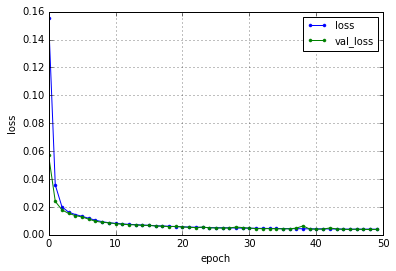

hiden node = 8
CommonName =_edim=8-Window=128-Overlap=32-AccX
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.1130 - val_loss: 0.0328
Epoch 2/50
0s - loss: 0.0224 - val_loss: 0.0169
Epoch 3/50
0s - loss: 0.0150 - val_loss: 0.0133
Epoch 4/50
0s - loss: 0.0122 - val_loss: 0.0109
Epoch 5/50
0s - loss: 0.0101 - val_loss: 0.0091
Epoch 6/50
0s - loss: 0.0087 - val_loss: 0.0081
Epoch 7/50
0s - loss: 0.0078 - val_loss: 0.0072
Epoch 8/50
0s - loss: 0.0071 - val_loss: 0.0066
Epoch 9/50
0s - loss: 0.0066 - val_loss: 0.0062
Epoch 10/50
0s - loss: 0.0062 - val_loss: 0.0066
Epoch 11/50
0s - loss: 0.0058 - val_loss: 0.0058
Epoch 12/50
0s - loss: 0.0055 - val_loss: 0.0052
Epoch 13/50
0s - loss: 0.0052 - val_loss: 0.0049
Epoch 14/50
0s - loss: 0.0051 - val_loss: 0.0049
Epoch 15/50
0s - loss: 0.0049 - val_loss: 0.0046
Epoch 16/50
0s - loss: 0.0047 - val_loss: 0.0056
Epoch 17/50
0s - loss: 0.0047 - val_loss: 0.0061
Epoch 18/50
0s - loss: 0.0045 - val_loss: 0.0043
Epoch 19/50
0s - 

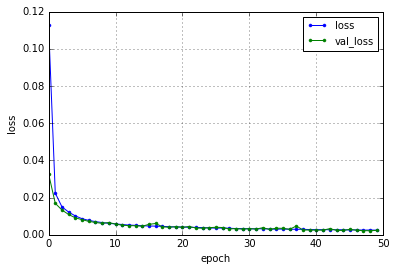

hiden node = 12
CommonName =_edim=12-Window=128-Overlap=32-AccX
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0975 - val_loss: 0.0235
Epoch 2/50
0s - loss: 0.0181 - val_loss: 0.0151
Epoch 3/50
0s - loss: 0.0139 - val_loss: 0.0137
Epoch 4/50
0s - loss: 0.0111 - val_loss: 0.0102
Epoch 5/50
0s - loss: 0.0088 - val_loss: 0.0086
Epoch 6/50
0s - loss: 0.0075 - val_loss: 0.0068
Epoch 7/50
0s - loss: 0.0065 - val_loss: 0.0061
Epoch 8/50
0s - loss: 0.0059 - val_loss: 0.0054
Epoch 9/50
0s - loss: 0.0054 - val_loss: 0.0049
Epoch 10/50
0s - loss: 0.0050 - val_loss: 0.0046
Epoch 11/50
0s - loss: 0.0046 - val_loss: 0.0043
Epoch 12/50
0s - loss: 0.0044 - val_loss: 0.0042
Epoch 13/50
0s - loss: 0.0044 - val_loss: 0.0040
Epoch 14/50
0s - loss: 0.0041 - val_loss: 0.0038
Epoch 15/50
0s - loss: 0.0040 - val_loss: 0.0037
Epoch 16/50
0s - loss: 0.0037 - val_loss: 0.0037
Epoch 17/50
0s - loss: 0.0036 - val_loss: 0.0034
Epoch 18/50
0s - loss: 0.0035 - val_loss: 0.0033
Epoch 19/50
0s 

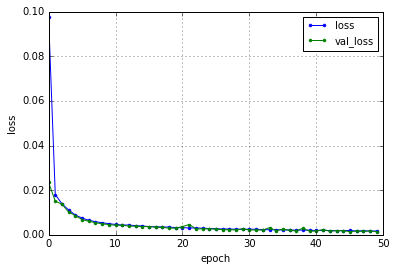

hiden node = 16
CommonName =_edim=16-Window=128-Overlap=32-AccX
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0913 - val_loss: 0.0213
Epoch 2/50
0s - loss: 0.0163 - val_loss: 0.0134
Epoch 3/50
0s - loss: 0.0114 - val_loss: 0.0096
Epoch 4/50
0s - loss: 0.0084 - val_loss: 0.0074
Epoch 5/50
0s - loss: 0.0069 - val_loss: 0.0067
Epoch 6/50
0s - loss: 0.0059 - val_loss: 0.0061
Epoch 7/50
0s - loss: 0.0052 - val_loss: 0.0050
Epoch 8/50
0s - loss: 0.0049 - val_loss: 0.0047
Epoch 9/50
0s - loss: 0.0045 - val_loss: 0.0041
Epoch 10/50
0s - loss: 0.0043 - val_loss: 0.0041
Epoch 11/50
0s - loss: 0.0040 - val_loss: 0.0052
Epoch 12/50
0s - loss: 0.0038 - val_loss: 0.0038
Epoch 13/50
0s - loss: 0.0036 - val_loss: 0.0037
Epoch 14/50
0s - loss: 0.0035 - val_loss: 0.0030
Epoch 15/50
0s - loss: 0.0034 - val_loss: 0.0036
Epoch 16/50
0s - loss: 0.0031 - val_loss: 0.0028
Epoch 17/50
0s - loss: 0.0029 - val_loss: 0.0030
Epoch 18/50
0s - loss: 0.0028 - val_loss: 0.0024
Epoch 19/50
0s 

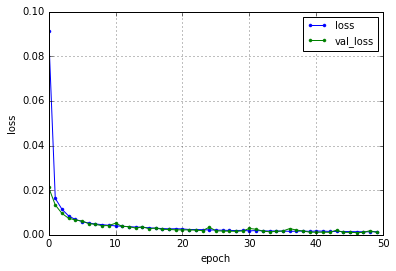

hiden node = 32
CommonName =_edim=32-Window=128-Overlap=32-AccX
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0559 - val_loss: 0.0150
Epoch 2/50
0s - loss: 0.0114 - val_loss: 0.0086
Epoch 3/50
0s - loss: 0.0074 - val_loss: 0.0062
Epoch 4/50
0s - loss: 0.0058 - val_loss: 0.0049
Epoch 5/50
0s - loss: 0.0047 - val_loss: 0.0044
Epoch 6/50
0s - loss: 0.0041 - val_loss: 0.0046
Epoch 7/50
0s - loss: 0.0036 - val_loss: 0.0050
Epoch 8/50
0s - loss: 0.0033 - val_loss: 0.0030
Epoch 9/50
0s - loss: 0.0031 - val_loss: 0.0026
Epoch 10/50
0s - loss: 0.0028 - val_loss: 0.0038
Epoch 11/50
0s - loss: 0.0027 - val_loss: 0.0023
Epoch 12/50
0s - loss: 0.0025 - val_loss: 0.0024
Epoch 13/50
0s - loss: 0.0025 - val_loss: 0.0033
Epoch 14/50
0s - loss: 0.0023 - val_loss: 0.0020
Epoch 15/50
0s - loss: 0.0022 - val_loss: 0.0019
Epoch 16/50
0s - loss: 0.0021 - val_loss: 0.0017
Epoch 17/50
0s - loss: 0.0020 - val_loss: 0.0017
Epoch 18/50
0s - loss: 0.0020 - val_loss: 0.0015
Epoch 19/50
0s 

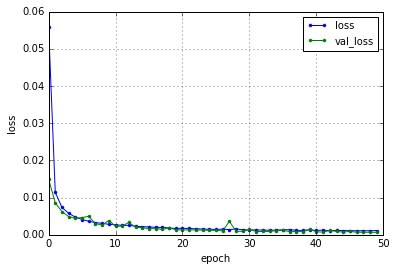

hiden node = 64
CommonName =_edim=64-Window=128-Overlap=32-AccX
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0488 - val_loss: 0.0116
Epoch 2/50
0s - loss: 0.0079 - val_loss: 0.0056
Epoch 3/50
0s - loss: 0.0049 - val_loss: 0.0040
Epoch 4/50
0s - loss: 0.0036 - val_loss: 0.0042
Epoch 5/50
0s - loss: 0.0032 - val_loss: 0.0025
Epoch 6/50
0s - loss: 0.0025 - val_loss: 0.0040
Epoch 7/50
0s - loss: 0.0023 - val_loss: 0.0020
Epoch 8/50
0s - loss: 0.0021 - val_loss: 0.0016
Epoch 9/50
0s - loss: 0.0019 - val_loss: 0.0016
Epoch 10/50
0s - loss: 0.0018 - val_loss: 0.0013
Epoch 11/50
0s - loss: 0.0016 - val_loss: 0.0020
Epoch 12/50
0s - loss: 0.0017 - val_loss: 0.0015
Epoch 13/50
0s - loss: 0.0016 - val_loss: 0.0016
Epoch 14/50
0s - loss: 0.0014 - val_loss: 0.0010
Epoch 15/50
0s - loss: 0.0015 - val_loss: 0.0018
Epoch 16/50
0s - loss: 0.0013 - val_loss: 0.0015
Epoch 17/50
0s - loss: 0.0013 - val_loss: 0.0011
Epoch 18/50
0s - loss: 0.0013 - val_loss: 9.7857e-04
Epoch 19/50

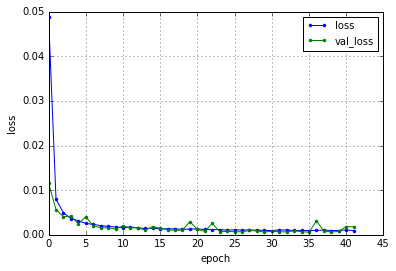

hiden node = 4
CommonName =_edim=4-Window=128-Overlap=32-AccY
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.4173 - val_loss: 0.1610
Epoch 2/50
0s - loss: 0.0883 - val_loss: 0.0464
Epoch 3/50
0s - loss: 0.0319 - val_loss: 0.0231
Epoch 4/50
0s - loss: 0.0202 - val_loss: 0.0178
Epoch 5/50
0s - loss: 0.0165 - val_loss: 0.0147
Epoch 6/50
0s - loss: 0.0147 - val_loss: 0.0132
Epoch 7/50
0s - loss: 0.0131 - val_loss: 0.0122
Epoch 8/50
0s - loss: 0.0119 - val_loss: 0.0128
Epoch 9/50
0s - loss: 0.0107 - val_loss: 0.0098
Epoch 10/50
0s - loss: 0.0096 - val_loss: 0.0103
Epoch 11/50
0s - loss: 0.0089 - val_loss: 0.0088
Epoch 12/50
0s - loss: 0.0083 - val_loss: 0.0073
Epoch 13/50
0s - loss: 0.0078 - val_loss: 0.0067
Epoch 14/50
0s - loss: 0.0071 - val_loss: 0.0074
Epoch 15/50
0s - loss: 0.0069 - val_loss: 0.0060
Epoch 16/50
0s - loss: 0.0065 - val_loss: 0.0093
Epoch 17/50
0s - loss: 0.0068 - val_loss: 0.0070
Epoch 18/50
0s - loss: 0.0069 - val_loss: 0.0056
Epoch 19/50
0s - 

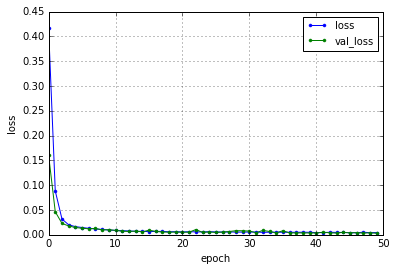

hiden node = 8
CommonName =_edim=8-Window=128-Overlap=32-AccY
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.3276 - val_loss: 0.0902
Epoch 2/50
0s - loss: 0.0476 - val_loss: 0.0268
Epoch 3/50
0s - loss: 0.0208 - val_loss: 0.0169
Epoch 4/50
0s - loss: 0.0177 - val_loss: 0.0155
Epoch 5/50
0s - loss: 0.0153 - val_loss: 0.0136
Epoch 6/50
0s - loss: 0.0140 - val_loss: 0.0139
Epoch 7/50
0s - loss: 0.0132 - val_loss: 0.0124
Epoch 8/50
0s - loss: 0.0118 - val_loss: 0.0108
Epoch 9/50
0s - loss: 0.0111 - val_loss: 0.0091
Epoch 10/50
0s - loss: 0.0091 - val_loss: 0.0089
Epoch 11/50
0s - loss: 0.0080 - val_loss: 0.0079
Epoch 12/50
0s - loss: 0.0076 - val_loss: 0.0062
Epoch 13/50
0s - loss: 0.0067 - val_loss: 0.0056
Epoch 14/50
0s - loss: 0.0068 - val_loss: 0.0077
Epoch 15/50
0s - loss: 0.0064 - val_loss: 0.0072
Epoch 16/50
0s - loss: 0.0063 - val_loss: 0.0048
Epoch 17/50
0s - loss: 0.0056 - val_loss: 0.0049
Epoch 18/50
0s - loss: 0.0055 - val_loss: 0.0065
Epoch 19/50
0s - 

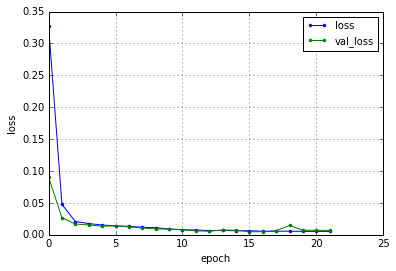

hiden node = 12
CommonName =_edim=12-Window=128-Overlap=32-AccY
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.2414 - val_loss: 0.0416
Epoch 2/50
0s - loss: 0.0256 - val_loss: 0.0182
Epoch 3/50
0s - loss: 0.0167 - val_loss: 0.0143
Epoch 4/50
0s - loss: 0.0141 - val_loss: 0.0121
Epoch 5/50
0s - loss: 0.0127 - val_loss: 0.0116
Epoch 6/50
0s - loss: 0.0107 - val_loss: 0.0088
Epoch 7/50
0s - loss: 0.0093 - val_loss: 0.0124
Epoch 8/50
0s - loss: 0.0079 - val_loss: 0.0075
Epoch 9/50
0s - loss: 0.0075 - val_loss: 0.0070
Epoch 10/50
0s - loss: 0.0072 - val_loss: 0.0108
Epoch 11/50
0s - loss: 0.0064 - val_loss: 0.0056
Epoch 12/50
0s - loss: 0.0064 - val_loss: 0.0056
Epoch 13/50
0s - loss: 0.0060 - val_loss: 0.0063
Epoch 14/50
0s - loss: 0.0056 - val_loss: 0.0047
Epoch 15/50
0s - loss: 0.0056 - val_loss: 0.0044
Epoch 16/50
0s - loss: 0.0054 - val_loss: 0.0064
Epoch 17/50
0s - loss: 0.0057 - val_loss: 0.0045
Epoch 18/50
0s - loss: 0.0053 - val_loss: 0.0163
Epoch 19/50
0s 

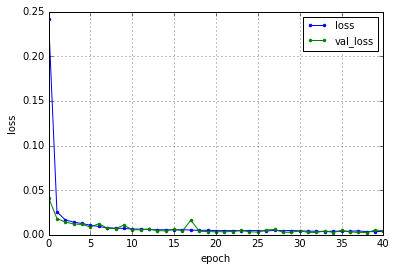

hiden node = 16
CommonName =_edim=16-Window=128-Overlap=32-AccY
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.1858 - val_loss: 0.0312
Epoch 2/50
0s - loss: 0.0211 - val_loss: 0.0170
Epoch 3/50
0s - loss: 0.0159 - val_loss: 0.0126
Epoch 4/50
0s - loss: 0.0128 - val_loss: 0.0179
Epoch 5/50
0s - loss: 0.0115 - val_loss: 0.0082
Epoch 6/50
0s - loss: 0.0088 - val_loss: 0.0069
Epoch 7/50
0s - loss: 0.0077 - val_loss: 0.0084
Epoch 8/50
0s - loss: 0.0072 - val_loss: 0.0054
Epoch 9/50
0s - loss: 0.0063 - val_loss: 0.0049
Epoch 10/50
0s - loss: 0.0059 - val_loss: 0.0048
Epoch 11/50
0s - loss: 0.0058 - val_loss: 0.0116
Epoch 12/50
0s - loss: 0.0058 - val_loss: 0.0040
Epoch 13/50
0s - loss: 0.0051 - val_loss: 0.0043
Epoch 14/50
0s - loss: 0.0050 - val_loss: 0.0057
Epoch 15/50
0s - loss: 0.0050 - val_loss: 0.0055
Epoch 16/50
0s - loss: 0.0047 - val_loss: 0.0069
Epoch 17/50
0s - loss: 0.0047 - val_loss: 0.0049
Epoch 18/50
0s - loss: 0.0046 - val_loss: 0.0048


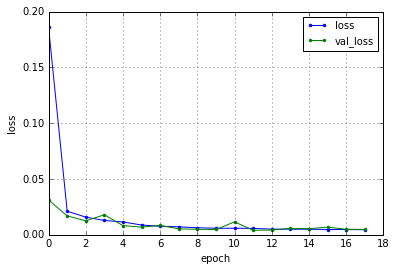

hiden node = 32
CommonName =_edim=32-Window=128-Overlap=32-AccY
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.1288 - val_loss: 0.0186
Epoch 2/50
0s - loss: 0.0136 - val_loss: 0.0108
Epoch 3/50
0s - loss: 0.0097 - val_loss: 0.0100
Epoch 4/50
0s - loss: 0.0077 - val_loss: 0.0054
Epoch 5/50
0s - loss: 0.0065 - val_loss: 0.0058
Epoch 6/50
0s - loss: 0.0058 - val_loss: 0.0052
Epoch 7/50
0s - loss: 0.0053 - val_loss: 0.0043
Epoch 8/50
0s - loss: 0.0054 - val_loss: 0.0057
Epoch 9/50
0s - loss: 0.0049 - val_loss: 0.0078
Epoch 10/50
0s - loss: 0.0047 - val_loss: 0.0049
Epoch 11/50
0s - loss: 0.0046 - val_loss: 0.0047
Epoch 12/50
0s - loss: 0.0049 - val_loss: 0.0031
Epoch 13/50
0s - loss: 0.0046 - val_loss: 0.0029
Epoch 14/50
0s - loss: 0.0041 - val_loss: 0.0076
Epoch 15/50
0s - loss: 0.0043 - val_loss: 0.0038
Epoch 16/50
0s - loss: 0.0046 - val_loss: 0.0048
Epoch 17/50
0s - loss: 0.0045 - val_loss: 0.0035
Epoch 18/50
0s - loss: 0.0043 - val_loss: 0.0043
Epoch 19/50
0s 

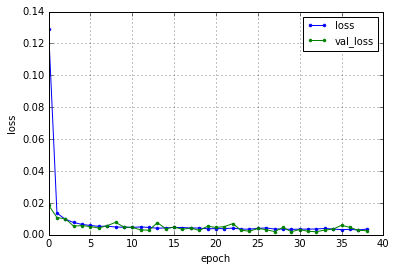

hiden node = 64
CommonName =_edim=64-Window=128-Overlap=32-AccY
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0795 - val_loss: 0.0136
Epoch 2/50
0s - loss: 0.0099 - val_loss: 0.0083
Epoch 3/50
0s - loss: 0.0075 - val_loss: 0.0059
Epoch 4/50
0s - loss: 0.0066 - val_loss: 0.0056
Epoch 5/50
0s - loss: 0.0057 - val_loss: 0.0061
Epoch 6/50
0s - loss: 0.0055 - val_loss: 0.0036
Epoch 7/50
0s - loss: 0.0048 - val_loss: 0.0057
Epoch 8/50
0s - loss: 0.0050 - val_loss: 0.0029
Epoch 9/50
0s - loss: 0.0041 - val_loss: 0.0032
Epoch 10/50
0s - loss: 0.0043 - val_loss: 0.0041
Epoch 11/50
0s - loss: 0.0043 - val_loss: 0.0043
Epoch 12/50
0s - loss: 0.0039 - val_loss: 0.0050
Epoch 13/50
0s - loss: 0.0040 - val_loss: 0.0027
Epoch 14/50
0s - loss: 0.0038 - val_loss: 0.0065
Epoch 15/50
0s - loss: 0.0041 - val_loss: 0.0021
Epoch 16/50
0s - loss: 0.0040 - val_loss: 0.0050
Epoch 17/50
0s - loss: 0.0036 - val_loss: 0.0036
Epoch 18/50
0s - loss: 0.0035 - val_loss: 0.0021
Epoch 19/50
0s 

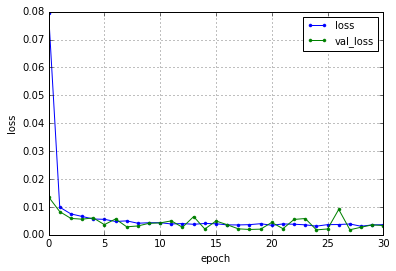

hiden node = 4
CommonName =_edim=4-Window=128-Overlap=32-AccZ
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0482 - val_loss: 0.0225
Epoch 2/50
0s - loss: 0.0167 - val_loss: 0.0128
Epoch 3/50
0s - loss: 0.0109 - val_loss: 0.0095
Epoch 4/50
0s - loss: 0.0085 - val_loss: 0.0077
Epoch 5/50
0s - loss: 0.0070 - val_loss: 0.0066
Epoch 6/50
0s - loss: 0.0059 - val_loss: 0.0056
Epoch 7/50
0s - loss: 0.0052 - val_loss: 0.0049
Epoch 8/50
0s - loss: 0.0047 - val_loss: 0.0049
Epoch 9/50
0s - loss: 0.0044 - val_loss: 0.0043
Epoch 10/50
0s - loss: 0.0042 - val_loss: 0.0041
Epoch 11/50
0s - loss: 0.0041 - val_loss: 0.0040
Epoch 12/50
0s - loss: 0.0040 - val_loss: 0.0039
Epoch 13/50
0s - loss: 0.0039 - val_loss: 0.0038
Epoch 14/50
0s - loss: 0.0038 - val_loss: 0.0037
Epoch 15/50
0s - loss: 0.0037 - val_loss: 0.0036
Epoch 16/50
0s - loss: 0.0036 - val_loss: 0.0039
Epoch 17/50
0s - loss: 0.0035 - val_loss: 0.0034
Epoch 18/50
0s - loss: 0.0034 - val_loss: 0.0033
Epoch 19/50
0s - 

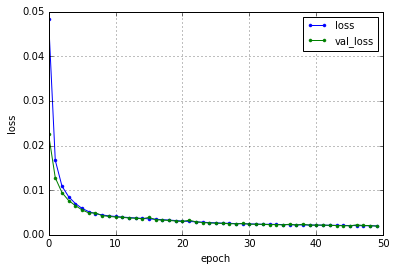

hiden node = 8
CommonName =_edim=8-Window=128-Overlap=32-AccZ
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0425 - val_loss: 0.0156
Epoch 2/50
0s - loss: 0.0113 - val_loss: 0.0088
Epoch 3/50
0s - loss: 0.0077 - val_loss: 0.0066
Epoch 4/50
0s - loss: 0.0058 - val_loss: 0.0051
Epoch 5/50
0s - loss: 0.0047 - val_loss: 0.0042
Epoch 6/50
0s - loss: 0.0040 - val_loss: 0.0038
Epoch 7/50
0s - loss: 0.0037 - val_loss: 0.0035
Epoch 8/50
0s - loss: 0.0034 - val_loss: 0.0034
Epoch 9/50
0s - loss: 0.0032 - val_loss: 0.0031
Epoch 10/50
0s - loss: 0.0030 - val_loss: 0.0029
Epoch 11/50
0s - loss: 0.0028 - val_loss: 0.0028
Epoch 12/50
0s - loss: 0.0027 - val_loss: 0.0026
Epoch 13/50
0s - loss: 0.0026 - val_loss: 0.0025
Epoch 14/50
0s - loss: 0.0025 - val_loss: 0.0024
Epoch 15/50
0s - loss: 0.0024 - val_loss: 0.0023
Epoch 16/50
0s - loss: 0.0023 - val_loss: 0.0024
Epoch 17/50
0s - loss: 0.0022 - val_loss: 0.0021
Epoch 18/50
0s - loss: 0.0022 - val_loss: 0.0021
Epoch 19/50
0s - 

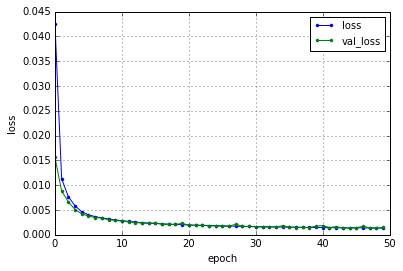

hiden node = 12
CommonName =_edim=12-Window=128-Overlap=32-AccZ
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0339 - val_loss: 0.0109
Epoch 2/50
0s - loss: 0.0088 - val_loss: 0.0074
Epoch 3/50
0s - loss: 0.0064 - val_loss: 0.0056
Epoch 4/50
0s - loss: 0.0048 - val_loss: 0.0043
Epoch 5/50
0s - loss: 0.0040 - val_loss: 0.0037
Epoch 6/50
0s - loss: 0.0036 - val_loss: 0.0034
Epoch 7/50
0s - loss: 0.0033 - val_loss: 0.0032
Epoch 8/50
0s - loss: 0.0031 - val_loss: 0.0030
Epoch 9/50
0s - loss: 0.0029 - val_loss: 0.0028
Epoch 10/50
0s - loss: 0.0027 - val_loss: 0.0026
Epoch 11/50
0s - loss: 0.0025 - val_loss: 0.0024
Epoch 12/50
0s - loss: 0.0024 - val_loss: 0.0025
Epoch 13/50
0s - loss: 0.0022 - val_loss: 0.0021
Epoch 14/50
0s - loss: 0.0021 - val_loss: 0.0020
Epoch 15/50
0s - loss: 0.0020 - val_loss: 0.0019
Epoch 16/50
0s - loss: 0.0020 - val_loss: 0.0019
Epoch 17/50
0s - loss: 0.0019 - val_loss: 0.0018
Epoch 18/50
0s - loss: 0.0018 - val_loss: 0.0020
Epoch 19/50
0s 

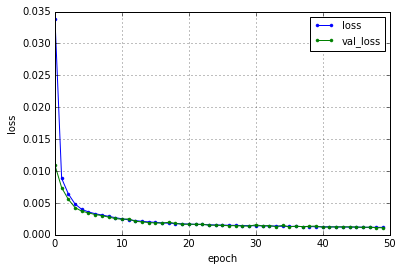

hiden node = 16
CommonName =_edim=16-Window=128-Overlap=32-AccZ
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0358 - val_loss: 0.0107
Epoch 2/50
0s - loss: 0.0085 - val_loss: 0.0072
Epoch 3/50
0s - loss: 0.0064 - val_loss: 0.0055
Epoch 4/50
0s - loss: 0.0047 - val_loss: 0.0041
Epoch 5/50
0s - loss: 0.0037 - val_loss: 0.0033
Epoch 6/50
0s - loss: 0.0031 - val_loss: 0.0030
Epoch 7/50
0s - loss: 0.0028 - val_loss: 0.0027
Epoch 8/50
0s - loss: 0.0025 - val_loss: 0.0025
Epoch 9/50
0s - loss: 0.0023 - val_loss: 0.0023
Epoch 10/50
0s - loss: 0.0022 - val_loss: 0.0021
Epoch 11/50
0s - loss: 0.0021 - val_loss: 0.0020
Epoch 12/50
0s - loss: 0.0020 - val_loss: 0.0019
Epoch 13/50
0s - loss: 0.0019 - val_loss: 0.0019
Epoch 14/50
0s - loss: 0.0019 - val_loss: 0.0018
Epoch 15/50
0s - loss: 0.0018 - val_loss: 0.0018
Epoch 16/50
0s - loss: 0.0017 - val_loss: 0.0017
Epoch 17/50
0s - loss: 0.0017 - val_loss: 0.0019
Epoch 18/50
0s - loss: 0.0016 - val_loss: 0.0016
Epoch 19/50
0s 

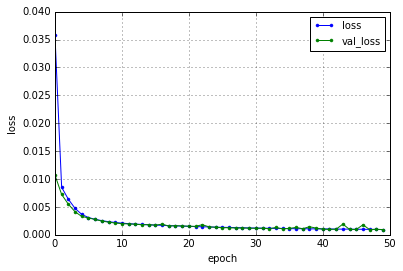

hiden node = 32
CommonName =_edim=32-Window=128-Overlap=32-AccZ
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0239 - val_loss: 0.0069
Epoch 2/50
0s - loss: 0.0052 - val_loss: 0.0040
Epoch 3/50
0s - loss: 0.0034 - val_loss: 0.0030
Epoch 4/50
0s - loss: 0.0027 - val_loss: 0.0025
Epoch 5/50
0s - loss: 0.0024 - val_loss: 0.0023
Epoch 6/50
0s - loss: 0.0021 - val_loss: 0.0020
Epoch 7/50
0s - loss: 0.0019 - val_loss: 0.0018
Epoch 8/50
0s - loss: 0.0018 - val_loss: 0.0017
Epoch 9/50
0s - loss: 0.0017 - val_loss: 0.0016
Epoch 10/50
0s - loss: 0.0016 - val_loss: 0.0015
Epoch 11/50
0s - loss: 0.0015 - val_loss: 0.0016
Epoch 12/50
0s - loss: 0.0014 - val_loss: 0.0014
Epoch 13/50
0s - loss: 0.0014 - val_loss: 0.0013
Epoch 14/50
0s - loss: 0.0013 - val_loss: 0.0013
Epoch 15/50
0s - loss: 0.0013 - val_loss: 0.0012
Epoch 16/50
0s - loss: 0.0012 - val_loss: 0.0012
Epoch 17/50
0s - loss: 0.0012 - val_loss: 0.0014
Epoch 18/50
0s - loss: 0.0012 - val_loss: 0.0011
Epoch 19/50
0s 

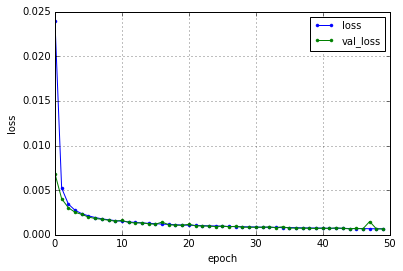

hiden node = 64
CommonName =_edim=64-Window=128-Overlap=32-AccZ
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0166 - val_loss: 0.0052
Epoch 2/50
0s - loss: 0.0039 - val_loss: 0.0030
Epoch 3/50
0s - loss: 0.0026 - val_loss: 0.0023
Epoch 4/50
0s - loss: 0.0021 - val_loss: 0.0019
Epoch 5/50
0s - loss: 0.0018 - val_loss: 0.0017
Epoch 6/50
0s - loss: 0.0016 - val_loss: 0.0015
Epoch 7/50
0s - loss: 0.0015 - val_loss: 0.0016
Epoch 8/50
0s - loss: 0.0013 - val_loss: 0.0013
Epoch 9/50
0s - loss: 0.0013 - val_loss: 0.0013
Epoch 10/50
0s - loss: 0.0012 - val_loss: 0.0012
Epoch 11/50
0s - loss: 0.0011 - val_loss: 0.0011
Epoch 12/50
0s - loss: 0.0011 - val_loss: 0.0010
Epoch 13/50
0s - loss: 0.0010 - val_loss: 9.9865e-04
Epoch 14/50
0s - loss: 9.6188e-04 - val_loss: 9.3459e-04
Epoch 15/50
0s - loss: 9.2460e-04 - val_loss: 9.0726e-04
Epoch 16/50
0s - loss: 8.8331e-04 - val_loss: 9.6840e-04
Epoch 17/50
0s - loss: 8.5157e-04 - val_loss: 8.2482e-04
Epoch 18/50
0s - loss: 8.220

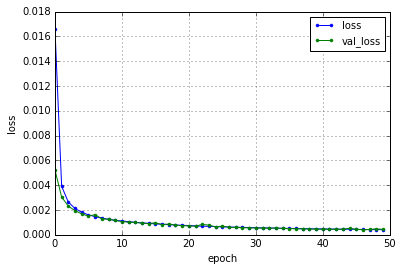

SampleNum= 256
Overlap= 64
AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =3977
SourceData's aborting data = 22
window shape is (3977, 256, 3)
(3977, 256, 3)
hiden node = 4
CommonName =_edim=4-Window=256-Overlap=64-AccX
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.2470 - val_loss: 0.1758
Epoch 2/50
0s - loss: 0.1340 - val_loss: 0.1019
Epoch 3/50
0s - loss: 0.0837 - val_loss: 0.0681
Epoch 4/50
0s - loss: 0.0586 - val_loss: 0.0508
Epoch 5/50
0s - loss: 0.0451 - val_loss: 0.0402
Epoch 6/50
0s - loss: 0.0371 - val_loss: 0.0353
Epoch 7/50
0s - loss: 0.0322 - val_loss: 0.0303
Epoch 8/50
0s - loss: 0.0290 - val_loss: 0.0291
Epoch 9/50
0s - loss: 0.0269 - val_loss: 0.0271
Epoch 10/50
0s - loss: 0.0255 - val_loss: 0.0266
Epoch 11/50
0s - loss: 0.0243 - val_loss: 0.0239
Epoch 12/50
0s - loss: 0.0234 - val_loss: 0.0229
Epoch 13/50
0s - loss: 0.0225 - val_loss: 0.0231
Epoch 14/50
0s - loss: 0.0221 - val_loss: 0.

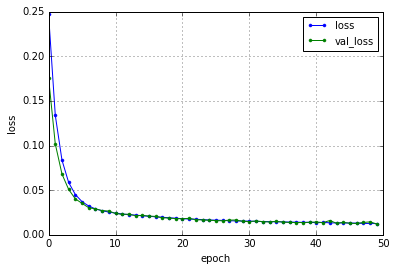

hiden node = 8
CommonName =_edim=8-Window=256-Overlap=64-AccX
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.2274 - val_loss: 0.1445
Epoch 2/50
0s - loss: 0.1046 - val_loss: 0.0751
Epoch 3/50
0s - loss: 0.0606 - val_loss: 0.0488
Epoch 4/50
0s - loss: 0.0424 - val_loss: 0.0369
Epoch 5/50
0s - loss: 0.0336 - val_loss: 0.0313
Epoch 6/50
0s - loss: 0.0288 - val_loss: 0.0273
Epoch 7/50
0s - loss: 0.0261 - val_loss: 0.0249
Epoch 8/50
0s - loss: 0.0243 - val_loss: 0.0258
Epoch 9/50
0s - loss: 0.0230 - val_loss: 0.0231
Epoch 10/50
0s - loss: 0.0218 - val_loss: 0.0252
Epoch 11/50
0s - loss: 0.0208 - val_loss: 0.0204
Epoch 12/50
0s - loss: 0.0198 - val_loss: 0.0194
Epoch 13/50
0s - loss: 0.0189 - val_loss: 0.0185
Epoch 14/50
0s - loss: 0.0180 - val_loss: 0.0175
Epoch 15/50
0s - loss: 0.0173 - val_loss: 0.0169
Epoch 16/50
0s - loss: 0.0165 - val_loss: 0.0173
Epoch 17/50
0s - loss: 0.0161 - val_loss: 0.0170
Epoch 18/50
0s - loss: 0.0156 - val_loss: 0.0151
Epoch 19/50
0s - 

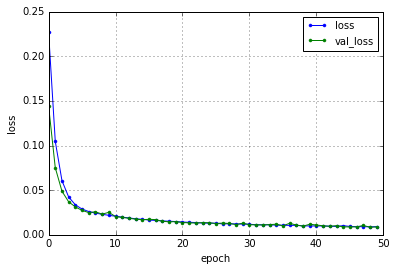

hiden node = 12
CommonName =_edim=12-Window=256-Overlap=64-AccX
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.2202 - val_loss: 0.1299
Epoch 2/50
0s - loss: 0.0888 - val_loss: 0.0612
Epoch 3/50
0s - loss: 0.0491 - val_loss: 0.0397
Epoch 4/50
0s - loss: 0.0347 - val_loss: 0.0305
Epoch 5/50
0s - loss: 0.0282 - val_loss: 0.0265
Epoch 6/50
0s - loss: 0.0247 - val_loss: 0.0233
Epoch 7/50
0s - loss: 0.0224 - val_loss: 0.0229
Epoch 8/50
0s - loss: 0.0207 - val_loss: 0.0202
Epoch 9/50
0s - loss: 0.0193 - val_loss: 0.0184
Epoch 10/50
0s - loss: 0.0180 - val_loss: 0.0187
Epoch 11/50
0s - loss: 0.0170 - val_loss: 0.0185
Epoch 12/50
0s - loss: 0.0161 - val_loss: 0.0166
Epoch 13/50
0s - loss: 0.0157 - val_loss: 0.0157
Epoch 14/50
0s - loss: 0.0149 - val_loss: 0.0145
Epoch 15/50
0s - loss: 0.0145 - val_loss: 0.0151
Epoch 16/50
0s - loss: 0.0142 - val_loss: 0.0150
Epoch 17/50
0s - loss: 0.0139 - val_loss: 0.0139
Epoch 18/50
0s - loss: 0.0136 - val_loss: 0.0130
Epoch 19/50
0s 

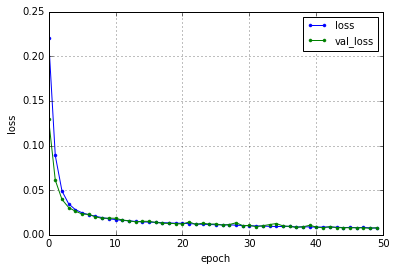

hiden node = 16
CommonName =_edim=16-Window=256-Overlap=64-AccX
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1946 - val_loss: 0.0957
Epoch 2/50
0s - loss: 0.0643 - val_loss: 0.0449
Epoch 3/50
0s - loss: 0.0374 - val_loss: 0.0317
Epoch 4/50
0s - loss: 0.0288 - val_loss: 0.0278
Epoch 5/50
0s - loss: 0.0251 - val_loss: 0.0240
Epoch 6/50
0s - loss: 0.0229 - val_loss: 0.0219
Epoch 7/50
0s - loss: 0.0213 - val_loss: 0.0227
Epoch 8/50
0s - loss: 0.0199 - val_loss: 0.0204
Epoch 9/50
0s - loss: 0.0184 - val_loss: 0.0179
Epoch 10/50
0s - loss: 0.0172 - val_loss: 0.0217
Epoch 11/50
0s - loss: 0.0162 - val_loss: 0.0153
Epoch 12/50
0s - loss: 0.0151 - val_loss: 0.0148
Epoch 13/50
0s - loss: 0.0145 - val_loss: 0.0137
Epoch 14/50
0s - loss: 0.0136 - val_loss: 0.0147
Epoch 15/50
0s - loss: 0.0135 - val_loss: 0.0130
Epoch 16/50
0s - loss: 0.0130 - val_loss: 0.0135
Epoch 17/50
0s - loss: 0.0128 - val_loss: 0.0119
Epoch 18/50
0s - loss: 0.0121 - val_loss: 0.0114
Epoch 19/50
0s 

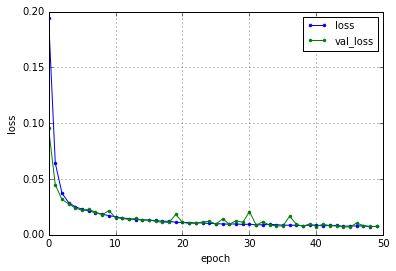

hiden node = 32
CommonName =_edim=32-Window=256-Overlap=64-AccX
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1565 - val_loss: 0.0530
Epoch 2/50
0s - loss: 0.0377 - val_loss: 0.0293
Epoch 3/50
0s - loss: 0.0261 - val_loss: 0.0242
Epoch 4/50
0s - loss: 0.0220 - val_loss: 0.0209
Epoch 5/50
0s - loss: 0.0194 - val_loss: 0.0187
Epoch 6/50
0s - loss: 0.0174 - val_loss: 0.0163
Epoch 7/50
0s - loss: 0.0157 - val_loss: 0.0147
Epoch 8/50
0s - loss: 0.0151 - val_loss: 0.0137
Epoch 9/50
0s - loss: 0.0137 - val_loss: 0.0132
Epoch 10/50
0s - loss: 0.0130 - val_loss: 0.0121
Epoch 11/50
0s - loss: 0.0132 - val_loss: 0.0115
Epoch 12/50
0s - loss: 0.0118 - val_loss: 0.0108
Epoch 13/50
0s - loss: 0.0114 - val_loss: 0.0112
Epoch 14/50
0s - loss: 0.0106 - val_loss: 0.0100
Epoch 15/50
0s - loss: 0.0101 - val_loss: 0.0105
Epoch 16/50
0s - loss: 0.0104 - val_loss: 0.0092
Epoch 17/50
0s - loss: 0.0096 - val_loss: 0.0111
Epoch 18/50
0s - loss: 0.0090 - val_loss: 0.0089
Epoch 19/50
0s 

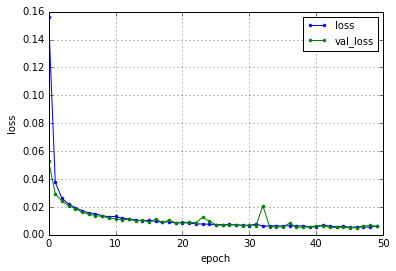

hiden node = 64
CommonName =_edim=64-Window=256-Overlap=64-AccX
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1193 - val_loss: 0.0341
Epoch 2/50
0s - loss: 0.0276 - val_loss: 0.0234
Epoch 3/50
0s - loss: 0.0210 - val_loss: 0.0187
Epoch 4/50
0s - loss: 0.0172 - val_loss: 0.0168
Epoch 5/50
0s - loss: 0.0145 - val_loss: 0.0153
Epoch 6/50
0s - loss: 0.0126 - val_loss: 0.0126
Epoch 7/50
0s - loss: 0.0114 - val_loss: 0.0110
Epoch 8/50
0s - loss: 0.0104 - val_loss: 0.0099
Epoch 9/50
0s - loss: 0.0098 - val_loss: 0.0100
Epoch 10/50
0s - loss: 0.0091 - val_loss: 0.0085
Epoch 11/50
0s - loss: 0.0085 - val_loss: 0.0083
Epoch 12/50
0s - loss: 0.0083 - val_loss: 0.0073
Epoch 13/50
0s - loss: 0.0084 - val_loss: 0.0076
Epoch 14/50
0s - loss: 0.0079 - val_loss: 0.0067
Epoch 15/50
0s - loss: 0.0071 - val_loss: 0.0068
Epoch 16/50
0s - loss: 0.0068 - val_loss: 0.0062
Epoch 17/50
0s - loss: 0.0073 - val_loss: 0.0059
Epoch 18/50
0s - loss: 0.0064 - val_loss: 0.0101
Epoch 19/50
0s 

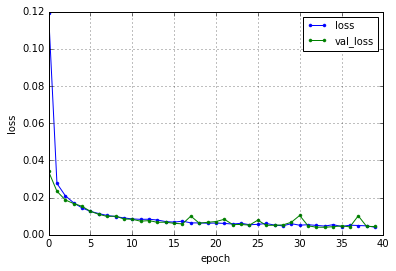

hiden node = 4
CommonName =_edim=4-Window=256-Overlap=64-AccY
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.6343 - val_loss: 0.4834
Epoch 2/50
0s - loss: 0.3794 - val_loss: 0.2902
Epoch 3/50
0s - loss: 0.2331 - val_loss: 0.1831
Epoch 4/50
0s - loss: 0.1506 - val_loss: 0.1220
Epoch 5/50
0s - loss: 0.1028 - val_loss: 0.0856
Epoch 6/50
0s - loss: 0.0741 - val_loss: 0.0635
Epoch 7/50
0s - loss: 0.0566 - val_loss: 0.0504
Epoch 8/50
0s - loss: 0.0457 - val_loss: 0.0450
Epoch 9/50
0s - loss: 0.0390 - val_loss: 0.0400
Epoch 10/50
0s - loss: 0.0347 - val_loss: 0.0330
Epoch 11/50
0s - loss: 0.0323 - val_loss: 0.0302
Epoch 12/50
0s - loss: 0.0313 - val_loss: 0.0294
Epoch 13/50
0s - loss: 0.0303 - val_loss: 0.0285
Epoch 14/50
0s - loss: 0.0291 - val_loss: 0.0272
Epoch 15/50
0s - loss: 0.0300 - val_loss: 0.0274
Epoch 16/50
0s - loss: 0.0296 - val_loss: 0.0287
Epoch 17/50
0s - loss: 0.0302 - val_loss: 0.0348
Epoch 18/50
0s - loss: 0.0284 - val_loss: 0.0260
Epoch 19/50
0s - 

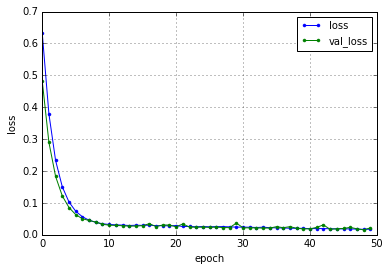

hiden node = 8
CommonName =_edim=8-Window=256-Overlap=64-AccY
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.6180 - val_loss: 0.4497
Epoch 2/50
0s - loss: 0.3197 - val_loss: 0.2150
Epoch 3/50
0s - loss: 0.1597 - val_loss: 0.1155
Epoch 4/50
0s - loss: 0.0914 - val_loss: 0.0716
Epoch 5/50
0s - loss: 0.0600 - val_loss: 0.0513
Epoch 6/50
0s - loss: 0.0444 - val_loss: 0.0402
Epoch 7/50
0s - loss: 0.0362 - val_loss: 0.0338
Epoch 8/50
0s - loss: 0.0325 - val_loss: 0.0299
Epoch 9/50
0s - loss: 0.0301 - val_loss: 0.0296
Epoch 10/50
0s - loss: 0.0302 - val_loss: 0.0392
Epoch 11/50
0s - loss: 0.0310 - val_loss: 0.0272
Epoch 12/50
0s - loss: 0.0297 - val_loss: 0.0275
Epoch 13/50
0s - loss: 0.0301 - val_loss: 0.0262
Epoch 14/50
0s - loss: 0.0279 - val_loss: 0.0304
Epoch 15/50
0s - loss: 0.0296 - val_loss: 0.0245
Epoch 16/50
0s - loss: 0.0274 - val_loss: 0.0298
Epoch 17/50
0s - loss: 0.0282 - val_loss: 0.0236
Epoch 18/50
0s - loss: 0.0276 - val_loss: 0.0308
Epoch 19/50
0s - 

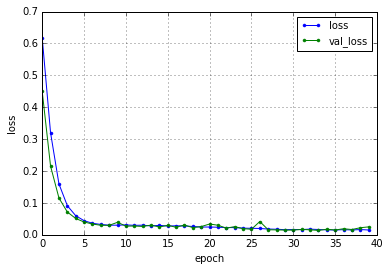

hiden node = 12
CommonName =_edim=12-Window=256-Overlap=64-AccY
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.5533 - val_loss: 0.3069
Epoch 2/50
0s - loss: 0.1926 - val_loss: 0.1154
Epoch 3/50
0s - loss: 0.0850 - val_loss: 0.0627
Epoch 4/50
0s - loss: 0.0520 - val_loss: 0.0449
Epoch 5/50
0s - loss: 0.0385 - val_loss: 0.0343
Epoch 6/50
0s - loss: 0.0323 - val_loss: 0.0299
Epoch 7/50
0s - loss: 0.0309 - val_loss: 0.0288
Epoch 8/50
0s - loss: 0.0303 - val_loss: 0.0294
Epoch 9/50
0s - loss: 0.0303 - val_loss: 0.0259
Epoch 10/50
0s - loss: 0.0307 - val_loss: 0.0259
Epoch 11/50
0s - loss: 0.0292 - val_loss: 0.0259
Epoch 12/50
0s - loss: 0.0299 - val_loss: 0.0254
Epoch 13/50
0s - loss: 0.0291 - val_loss: 0.0237
Epoch 14/50
0s - loss: 0.0272 - val_loss: 0.0240
Epoch 15/50
0s - loss: 0.0257 - val_loss: 0.0435
Epoch 16/50
0s - loss: 0.0259 - val_loss: 0.0260
Epoch 17/50
0s - loss: 0.0257 - val_loss: 0.0246
Epoch 18/50
0s - loss: 0.0235 - val_loss: 0.0319
Epoch 19/50
0s 

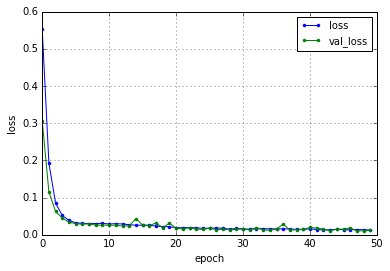

hiden node = 16
CommonName =_edim=16-Window=256-Overlap=64-AccY
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.5256 - val_loss: 0.2537
Epoch 2/50
0s - loss: 0.1515 - val_loss: 0.0890
Epoch 3/50
0s - loss: 0.0663 - val_loss: 0.0502
Epoch 4/50
0s - loss: 0.0425 - val_loss: 0.0370
Epoch 5/50
0s - loss: 0.0331 - val_loss: 0.0301
Epoch 6/50
0s - loss: 0.0299 - val_loss: 0.0271
Epoch 7/50
0s - loss: 0.0297 - val_loss: 0.0285
Epoch 8/50
0s - loss: 0.0305 - val_loss: 0.0285
Epoch 9/50
0s - loss: 0.0304 - val_loss: 0.0275
Epoch 10/50
0s - loss: 0.0279 - val_loss: 0.0415
Epoch 11/50
0s - loss: 0.0288 - val_loss: 0.0263
Epoch 12/50
0s - loss: 0.0277 - val_loss: 0.0228
Epoch 13/50
0s - loss: 0.0259 - val_loss: 0.0217
Epoch 14/50
0s - loss: 0.0265 - val_loss: 0.0444
Epoch 15/50
0s - loss: 0.0250 - val_loss: 0.0285
Epoch 16/50
0s - loss: 0.0235 - val_loss: 0.0243
Epoch 17/50
0s - loss: 0.0222 - val_loss: 0.0208
Epoch 18/50
0s - loss: 0.0217 - val_loss: 0.0218
Epoch 19/50
0s 

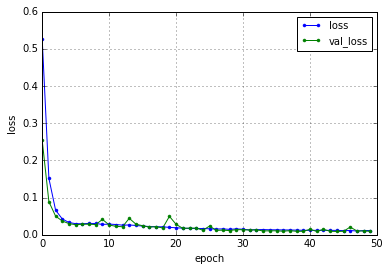

hiden node = 32
CommonName =_edim=32-Window=256-Overlap=64-AccY
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.3388 - val_loss: 0.0988
Epoch 2/50
0s - loss: 0.0616 - val_loss: 0.0421
Epoch 3/50
0s - loss: 0.0359 - val_loss: 0.0315
Epoch 4/50
0s - loss: 0.0290 - val_loss: 0.0282
Epoch 5/50
0s - loss: 0.0284 - val_loss: 0.0246
Epoch 6/50
0s - loss: 0.0278 - val_loss: 0.0258
Epoch 7/50
0s - loss: 0.0261 - val_loss: 0.0236
Epoch 8/50
0s - loss: 0.0245 - val_loss: 0.0241
Epoch 9/50
0s - loss: 0.0231 - val_loss: 0.0225
Epoch 10/50
0s - loss: 0.0207 - val_loss: 0.0254
Epoch 11/50
0s - loss: 0.0199 - val_loss: 0.0171
Epoch 12/50
0s - loss: 0.0185 - val_loss: 0.0168
Epoch 13/50
0s - loss: 0.0175 - val_loss: 0.0237
Epoch 14/50
0s - loss: 0.0174 - val_loss: 0.0133
Epoch 15/50
0s - loss: 0.0159 - val_loss: 0.0171
Epoch 16/50
0s - loss: 0.0158 - val_loss: 0.0150
Epoch 17/50
0s - loss: 0.0149 - val_loss: 0.0133
Epoch 18/50
0s - loss: 0.0139 - val_loss: 0.0175
Epoch 19/50
0s 

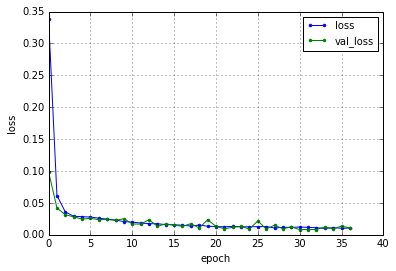

hiden node = 64
CommonName =_edim=64-Window=256-Overlap=64-AccY
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.2579 - val_loss: 0.0477
Epoch 2/50
0s - loss: 0.0363 - val_loss: 0.0302
Epoch 3/50
0s - loss: 0.0268 - val_loss: 0.0256
Epoch 4/50
0s - loss: 0.0238 - val_loss: 0.0240
Epoch 5/50
0s - loss: 0.0224 - val_loss: 0.0182
Epoch 6/50
0s - loss: 0.0189 - val_loss: 0.0161
Epoch 7/50
0s - loss: 0.0179 - val_loss: 0.0146
Epoch 8/50
0s - loss: 0.0152 - val_loss: 0.0145
Epoch 9/50
0s - loss: 0.0144 - val_loss: 0.0169
Epoch 10/50
0s - loss: 0.0147 - val_loss: 0.0117
Epoch 11/50
0s - loss: 0.0135 - val_loss: 0.0207
Epoch 12/50
0s - loss: 0.0132 - val_loss: 0.0096
Epoch 13/50
0s - loss: 0.0115 - val_loss: 0.0124
Epoch 14/50
0s - loss: 0.0119 - val_loss: 0.0090
Epoch 15/50
0s - loss: 0.0120 - val_loss: 0.0112
Epoch 16/50
0s - loss: 0.0104 - val_loss: 0.0126
Epoch 17/50
0s - loss: 0.0111 - val_loss: 0.0127
Epoch 18/50
0s - loss: 0.0110 - val_loss: 0.0201
Epoch 19/50
0s 

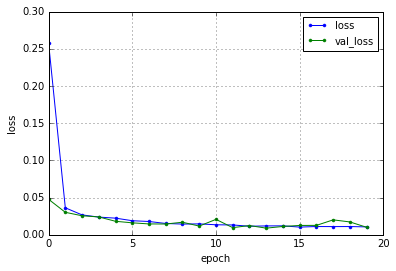

hiden node = 4
CommonName =_edim=4-Window=256-Overlap=64-AccZ
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0740 - val_loss: 0.0639
Epoch 2/50
0s - loss: 0.0529 - val_loss: 0.0427
Epoch 3/50
0s - loss: 0.0367 - val_loss: 0.0319
Epoch 4/50
0s - loss: 0.0291 - val_loss: 0.0266
Epoch 5/50
0s - loss: 0.0249 - val_loss: 0.0233
Epoch 6/50
0s - loss: 0.0222 - val_loss: 0.0210
Epoch 7/50
0s - loss: 0.0202 - val_loss: 0.0194
Epoch 8/50
0s - loss: 0.0188 - val_loss: 0.0182
Epoch 9/50
0s - loss: 0.0177 - val_loss: 0.0173
Epoch 10/50
0s - loss: 0.0168 - val_loss: 0.0165
Epoch 11/50
0s - loss: 0.0161 - val_loss: 0.0158
Epoch 12/50
0s - loss: 0.0155 - val_loss: 0.0152
Epoch 13/50
0s - loss: 0.0149 - val_loss: 0.0146
Epoch 14/50
0s - loss: 0.0144 - val_loss: 0.0142
Epoch 15/50
0s - loss: 0.0139 - val_loss: 0.0136
Epoch 16/50
0s - loss: 0.0134 - val_loss: 0.0131
Epoch 17/50
0s - loss: 0.0129 - val_loss: 0.0129
Epoch 18/50
0s - loss: 0.0125 - val_loss: 0.0122
Epoch 19/50
0s - 

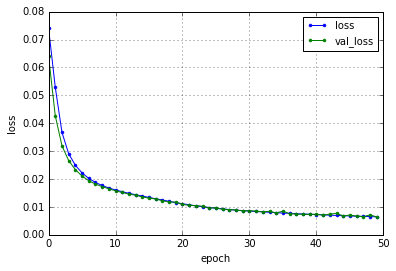

hiden node = 8
CommonName =_edim=8-Window=256-Overlap=64-AccZ
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0738 - val_loss: 0.0594
Epoch 2/50
0s - loss: 0.0459 - val_loss: 0.0343
Epoch 3/50
0s - loss: 0.0284 - val_loss: 0.0239
Epoch 4/50
0s - loss: 0.0215 - val_loss: 0.0196
Epoch 5/50
0s - loss: 0.0183 - val_loss: 0.0172
Epoch 6/50
0s - loss: 0.0165 - val_loss: 0.0157
Epoch 7/50
0s - loss: 0.0152 - val_loss: 0.0148
Epoch 8/50
0s - loss: 0.0143 - val_loss: 0.0139
Epoch 9/50
0s - loss: 0.0136 - val_loss: 0.0132
Epoch 10/50
0s - loss: 0.0129 - val_loss: 0.0126
Epoch 11/50
0s - loss: 0.0123 - val_loss: 0.0119
Epoch 12/50
0s - loss: 0.0116 - val_loss: 0.0113
Epoch 13/50
0s - loss: 0.0110 - val_loss: 0.0106
Epoch 14/50
0s - loss: 0.0103 - val_loss: 0.0100
Epoch 15/50
0s - loss: 0.0097 - val_loss: 0.0097
Epoch 16/50
0s - loss: 0.0091 - val_loss: 0.0089
Epoch 17/50
0s - loss: 0.0086 - val_loss: 0.0086
Epoch 18/50
0s - loss: 0.0082 - val_loss: 0.0081
Epoch 19/50
0s - 

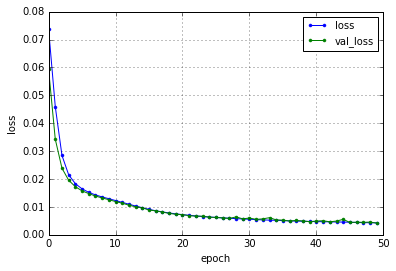

hiden node = 12
CommonName =_edim=12-Window=256-Overlap=64-AccZ
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0700 - val_loss: 0.0507
Epoch 2/50
0s - loss: 0.0357 - val_loss: 0.0252
Epoch 3/50
0s - loss: 0.0214 - val_loss: 0.0187
Epoch 4/50
0s - loss: 0.0172 - val_loss: 0.0159
Epoch 5/50
0s - loss: 0.0150 - val_loss: 0.0141
Epoch 6/50
0s - loss: 0.0135 - val_loss: 0.0129
Epoch 7/50
0s - loss: 0.0123 - val_loss: 0.0118
Epoch 8/50
0s - loss: 0.0113 - val_loss: 0.0108
Epoch 9/50
0s - loss: 0.0104 - val_loss: 0.0100
Epoch 10/50
0s - loss: 0.0097 - val_loss: 0.0094
Epoch 11/50
0s - loss: 0.0090 - val_loss: 0.0091
Epoch 12/50
0s - loss: 0.0085 - val_loss: 0.0084
Epoch 13/50
0s - loss: 0.0081 - val_loss: 0.0080
Epoch 14/50
0s - loss: 0.0078 - val_loss: 0.0077
Epoch 15/50
0s - loss: 0.0075 - val_loss: 0.0078
Epoch 16/50
0s - loss: 0.0072 - val_loss: 0.0071
Epoch 17/50
0s - loss: 0.0070 - val_loss: 0.0073
Epoch 18/50
0s - loss: 0.0068 - val_loss: 0.0068
Epoch 19/50
0s 

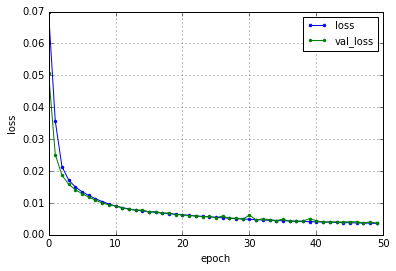

hiden node = 16
CommonName =_edim=16-Window=256-Overlap=64-AccZ
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0610 - val_loss: 0.0384
Epoch 2/50
0s - loss: 0.0276 - val_loss: 0.0208
Epoch 3/50
0s - loss: 0.0182 - val_loss: 0.0161
Epoch 4/50
0s - loss: 0.0149 - val_loss: 0.0138
Epoch 5/50
0s - loss: 0.0130 - val_loss: 0.0123
Epoch 6/50
0s - loss: 0.0117 - val_loss: 0.0112
Epoch 7/50
0s - loss: 0.0106 - val_loss: 0.0102
Epoch 8/50
0s - loss: 0.0097 - val_loss: 0.0093
Epoch 9/50
0s - loss: 0.0090 - val_loss: 0.0088
Epoch 10/50
0s - loss: 0.0084 - val_loss: 0.0081
Epoch 11/50
0s - loss: 0.0079 - val_loss: 0.0078
Epoch 12/50
0s - loss: 0.0075 - val_loss: 0.0074
Epoch 13/50
0s - loss: 0.0072 - val_loss: 0.0073
Epoch 14/50
0s - loss: 0.0069 - val_loss: 0.0068
Epoch 15/50
0s - loss: 0.0067 - val_loss: 0.0066
Epoch 16/50
0s - loss: 0.0065 - val_loss: 0.0067
Epoch 17/50
0s - loss: 0.0063 - val_loss: 0.0061
Epoch 18/50
0s - loss: 0.0061 - val_loss: 0.0060
Epoch 19/50
0s 

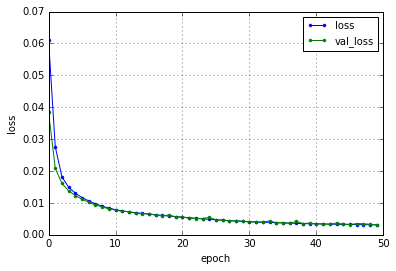

hiden node = 32
CommonName =_edim=32-Window=256-Overlap=64-AccZ
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0518 - val_loss: 0.0246
Epoch 2/50
0s - loss: 0.0187 - val_loss: 0.0152
Epoch 3/50
0s - loss: 0.0137 - val_loss: 0.0125
Epoch 4/50
0s - loss: 0.0116 - val_loss: 0.0108
Epoch 5/50
0s - loss: 0.0101 - val_loss: 0.0095
Epoch 6/50
0s - loss: 0.0089 - val_loss: 0.0084
Epoch 7/50
0s - loss: 0.0080 - val_loss: 0.0076
Epoch 8/50
0s - loss: 0.0073 - val_loss: 0.0070
Epoch 9/50
0s - loss: 0.0067 - val_loss: 0.0065
Epoch 10/50
0s - loss: 0.0063 - val_loss: 0.0061
Epoch 11/50
0s - loss: 0.0060 - val_loss: 0.0060
Epoch 12/50
0s - loss: 0.0057 - val_loss: 0.0056
Epoch 13/50
0s - loss: 0.0054 - val_loss: 0.0054
Epoch 14/50
0s - loss: 0.0052 - val_loss: 0.0054
Epoch 15/50
0s - loss: 0.0050 - val_loss: 0.0049
Epoch 16/50
0s - loss: 0.0048 - val_loss: 0.0048
Epoch 17/50
0s - loss: 0.0046 - val_loss: 0.0046
Epoch 18/50
0s - loss: 0.0045 - val_loss: 0.0055
Epoch 19/50
0s 

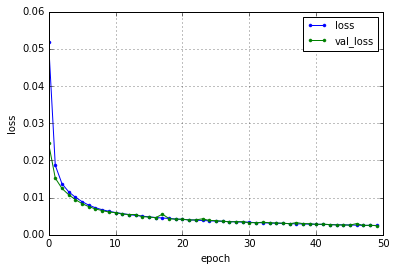

hiden node = 64
CommonName =_edim=64-Window=256-Overlap=64-AccZ
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0488 - val_loss: 0.0189
Epoch 2/50
0s - loss: 0.0148 - val_loss: 0.0125
Epoch 3/50
0s - loss: 0.0112 - val_loss: 0.0100
Epoch 4/50
0s - loss: 0.0092 - val_loss: 0.0083
Epoch 5/50
0s - loss: 0.0077 - val_loss: 0.0072
Epoch 6/50
0s - loss: 0.0067 - val_loss: 0.0064
Epoch 7/50
0s - loss: 0.0060 - val_loss: 0.0057
Epoch 8/50
0s - loss: 0.0054 - val_loss: 0.0052
Epoch 9/50
0s - loss: 0.0051 - val_loss: 0.0049
Epoch 10/50
0s - loss: 0.0047 - val_loss: 0.0047
Epoch 11/50
0s - loss: 0.0045 - val_loss: 0.0043
Epoch 12/50
0s - loss: 0.0042 - val_loss: 0.0041
Epoch 13/50
0s - loss: 0.0040 - val_loss: 0.0039
Epoch 14/50
0s - loss: 0.0038 - val_loss: 0.0037
Epoch 15/50
0s - loss: 0.0037 - val_loss: 0.0036
Epoch 16/50
0s - loss: 0.0035 - val_loss: 0.0035
Epoch 17/50
0s - loss: 0.0034 - val_loss: 0.0034
Epoch 18/50
0s - loss: 0.0033 - val_loss: 0.0039
Epoch 19/50
0s 

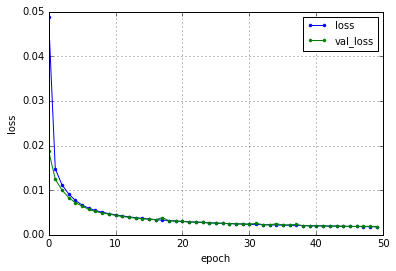

SampleNum= 512
Overlap= 128
AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =1987
SourceData's aborting data = 22
window shape is (1987, 512, 3)
(1987, 512, 3)
hiden node = 4
CommonName =_edim=4-Window=512-Overlap=128-AccX
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.2915 - val_loss: 0.2789
Epoch 2/50
0s - loss: 0.2658 - val_loss: 0.2500
Epoch 3/50
0s - loss: 0.2377 - val_loss: 0.2236
Epoch 4/50
0s - loss: 0.2129 - val_loss: 0.2006
Epoch 5/50
0s - loss: 0.1915 - val_loss: 0.1811
Epoch 6/50
0s - loss: 0.1733 - val_loss: 0.1644
Epoch 7/50
0s - loss: 0.1577 - val_loss: 0.1500
Epoch 8/50
0s - loss: 0.1441 - val_loss: 0.1374
Epoch 9/50
0s - loss: 0.1322 - val_loss: 0.1262
Epoch 10/50
0s - loss: 0.1216 - val_loss: 0.1163
Epoch 11/50
0s - loss: 0.1122 - val_loss: 0.1075
Epoch 12/50
0s - loss: 0.1038 - val_loss: 0.0996
Epoch 13/50
0s - loss: 0.0964 - val_loss: 0.0925
Epoch 14/50
0s - loss: 0.0896 - val_loss: 

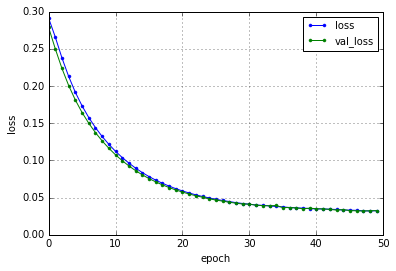

hiden node = 8
CommonName =_edim=8-Window=512-Overlap=128-AccX
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.2909 - val_loss: 0.2724
Epoch 2/50
0s - loss: 0.2540 - val_loss: 0.2317
Epoch 3/50
0s - loss: 0.2142 - val_loss: 0.1947
Epoch 4/50
0s - loss: 0.1806 - val_loss: 0.1651
Epoch 5/50
0s - loss: 0.1541 - val_loss: 0.1418
Epoch 6/50
0s - loss: 0.1332 - val_loss: 0.1234
Epoch 7/50
0s - loss: 0.1165 - val_loss: 0.1086
Epoch 8/50
0s - loss: 0.1029 - val_loss: 0.0964
Epoch 9/50
0s - loss: 0.0917 - val_loss: 0.0863
Epoch 10/50
0s - loss: 0.0824 - val_loss: 0.0780
Epoch 11/50
0s - loss: 0.0747 - val_loss: 0.0709
Epoch 12/50
0s - loss: 0.0681 - val_loss: 0.0650
Epoch 13/50
0s - loss: 0.0626 - val_loss: 0.0599
Epoch 14/50
0s - loss: 0.0580 - val_loss: 0.0557
Epoch 15/50
0s - loss: 0.0540 - val_loss: 0.0521
Epoch 16/50
0s - loss: 0.0507 - val_loss: 0.0491
Epoch 17/50
0s - loss: 0.0479 - val_loss: 0.0466
Epoch 18/50
0s - loss: 0.0455 - val_loss: 0.0444
Epoch 19/50
0s -

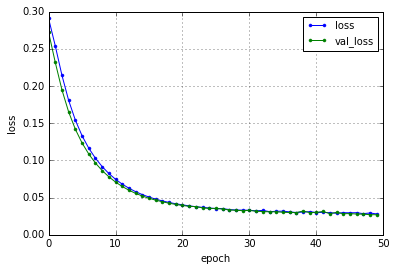

hiden node = 12
CommonName =_edim=12-Window=512-Overlap=128-AccX
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.2923 - val_loss: 0.2678
Epoch 2/50
0s - loss: 0.2403 - val_loss: 0.2073
Epoch 3/50
0s - loss: 0.1832 - val_loss: 0.1576
Epoch 4/50
0s - loss: 0.1412 - val_loss: 0.1239
Epoch 5/50
0s - loss: 0.1128 - val_loss: 0.1011
Epoch 6/50
0s - loss: 0.0933 - val_loss: 0.0848
Epoch 7/50
0s - loss: 0.0791 - val_loss: 0.0729
Epoch 8/50
0s - loss: 0.0687 - val_loss: 0.0640
Epoch 9/50
0s - loss: 0.0607 - val_loss: 0.0572
Epoch 10/50
0s - loss: 0.0547 - val_loss: 0.0519
Epoch 11/50
0s - loss: 0.0500 - val_loss: 0.0478
Epoch 12/50
0s - loss: 0.0464 - val_loss: 0.0446
Epoch 13/50
0s - loss: 0.0434 - val_loss: 0.0421
Epoch 14/50
0s - loss: 0.0411 - val_loss: 0.0399
Epoch 15/50
0s - loss: 0.0393 - val_loss: 0.0386
Epoch 16/50
0s - loss: 0.0377 - val_loss: 0.0368
Epoch 17/50
0s - loss: 0.0364 - val_loss: 0.0356
Epoch 18/50
0s - loss: 0.0353 - val_loss: 0.0348
Epoch 19/50
0s

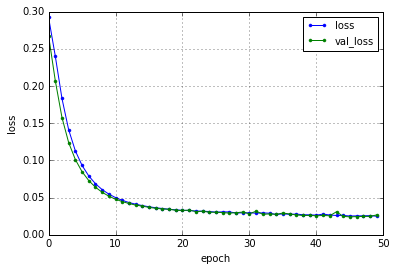

hiden node = 16
CommonName =_edim=16-Window=512-Overlap=128-AccX
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.2821 - val_loss: 0.2482
Epoch 2/50
0s - loss: 0.2174 - val_loss: 0.1823
Epoch 3/50
0s - loss: 0.1592 - val_loss: 0.1350
Epoch 4/50
0s - loss: 0.1201 - val_loss: 0.1047
Epoch 5/50
0s - loss: 0.0950 - val_loss: 0.0847
Epoch 6/50
0s - loss: 0.0781 - val_loss: 0.0711
Epoch 7/50
0s - loss: 0.0664 - val_loss: 0.0613
Epoch 8/50
0s - loss: 0.0580 - val_loss: 0.0543
Epoch 9/50
0s - loss: 0.0518 - val_loss: 0.0490
Epoch 10/50
0s - loss: 0.0471 - val_loss: 0.0450
Epoch 11/50
0s - loss: 0.0435 - val_loss: 0.0418
Epoch 12/50
0s - loss: 0.0408 - val_loss: 0.0395
Epoch 13/50
0s - loss: 0.0386 - val_loss: 0.0375
Epoch 14/50
0s - loss: 0.0369 - val_loss: 0.0365
Epoch 15/50
0s - loss: 0.0355 - val_loss: 0.0351
Epoch 16/50
0s - loss: 0.0343 - val_loss: 0.0336
Epoch 17/50
0s - loss: 0.0333 - val_loss: 0.0340
Epoch 18/50
0s - loss: 0.0324 - val_loss: 0.0322
Epoch 19/50
0s

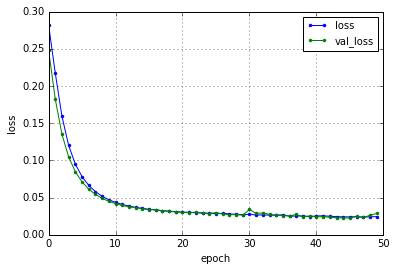

hiden node = 32
CommonName =_edim=32-Window=512-Overlap=128-AccX
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.2724 - val_loss: 0.2140
Epoch 2/50
0s - loss: 0.1685 - val_loss: 0.1239
Epoch 3/50
0s - loss: 0.1011 - val_loss: 0.0804
Epoch 4/50
0s - loss: 0.0698 - val_loss: 0.0598
Epoch 5/50
0s - loss: 0.0545 - val_loss: 0.0492
Epoch 6/50
0s - loss: 0.0462 - val_loss: 0.0431
Epoch 7/50
0s - loss: 0.0412 - val_loss: 0.0392
Epoch 8/50
0s - loss: 0.0379 - val_loss: 0.0368
Epoch 9/50
0s - loss: 0.0356 - val_loss: 0.0346
Epoch 10/50
0s - loss: 0.0339 - val_loss: 0.0331
Epoch 11/50
0s - loss: 0.0327 - val_loss: 0.0320
Epoch 12/50
0s - loss: 0.0316 - val_loss: 0.0311
Epoch 13/50
0s - loss: 0.0308 - val_loss: 0.0308
Epoch 14/50
0s - loss: 0.0301 - val_loss: 0.0296
Epoch 15/50
0s - loss: 0.0293 - val_loss: 0.0294
Epoch 16/50
0s - loss: 0.0289 - val_loss: 0.0290
Epoch 17/50
0s - loss: 0.0286 - val_loss: 0.0278
Epoch 18/50
0s - loss: 0.0278 - val_loss: 0.0283
Epoch 19/50
0s

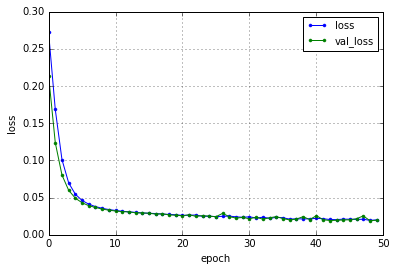

hiden node = 64
CommonName =_edim=64-Window=512-Overlap=128-AccX
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.2470 - val_loss: 0.1612
Epoch 2/50
0s - loss: 0.1142 - val_loss: 0.0753
Epoch 3/50
0s - loss: 0.0613 - val_loss: 0.0497
Epoch 4/50
0s - loss: 0.0450 - val_loss: 0.0407
Epoch 5/50
0s - loss: 0.0384 - val_loss: 0.0362
Epoch 6/50
0s - loss: 0.0349 - val_loss: 0.0334
Epoch 7/50
0s - loss: 0.0325 - val_loss: 0.0315
Epoch 8/50
0s - loss: 0.0308 - val_loss: 0.0300
Epoch 9/50
0s - loss: 0.0294 - val_loss: 0.0288
Epoch 10/50
0s - loss: 0.0283 - val_loss: 0.0278
Epoch 11/50
0s - loss: 0.0273 - val_loss: 0.0269
Epoch 12/50
0s - loss: 0.0264 - val_loss: 0.0258
Epoch 13/50
0s - loss: 0.0254 - val_loss: 0.0253
Epoch 14/50
0s - loss: 0.0247 - val_loss: 0.0241
Epoch 15/50
0s - loss: 0.0238 - val_loss: 0.0236
Epoch 16/50
0s - loss: 0.0231 - val_loss: 0.0227
Epoch 17/50
0s - loss: 0.0224 - val_loss: 0.0233
Epoch 18/50
0s - loss: 0.0219 - val_loss: 0.0216
Epoch 19/50
0s

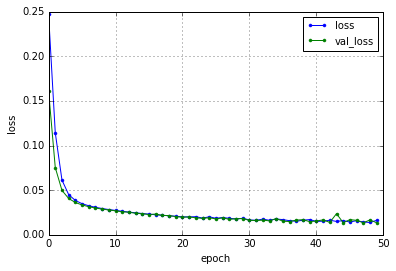

hiden node = 4
CommonName =_edim=4-Window=512-Overlap=128-AccY
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.7370 - val_loss: 0.7047
Epoch 2/50
0s - loss: 0.6755 - val_loss: 0.6408
Epoch 3/50
0s - loss: 0.6132 - val_loss: 0.5810
Epoch 4/50
0s - loss: 0.5558 - val_loss: 0.5265
Epoch 5/50
0s - loss: 0.5038 - val_loss: 0.4776
Epoch 6/50
0s - loss: 0.4571 - val_loss: 0.4335
Epoch 7/50
0s - loss: 0.4151 - val_loss: 0.3938
Epoch 8/50
0s - loss: 0.3773 - val_loss: 0.3581
Epoch 9/50
0s - loss: 0.3433 - val_loss: 0.3262
Epoch 10/50
0s - loss: 0.3128 - val_loss: 0.2972
Epoch 11/50
0s - loss: 0.2851 - val_loss: 0.2711
Epoch 12/50
0s - loss: 0.2602 - val_loss: 0.2475
Epoch 13/50
0s - loss: 0.2376 - val_loss: 0.2262
Epoch 14/50
0s - loss: 0.2173 - val_loss: 0.2069
Epoch 15/50
0s - loss: 0.1989 - val_loss: 0.1895
Epoch 16/50
0s - loss: 0.1822 - val_loss: 0.1737
Epoch 17/50
0s - loss: 0.1671 - val_loss: 0.1594
Epoch 18/50
0s - loss: 0.1535 - val_loss: 0.1466
Epoch 19/50
0s -

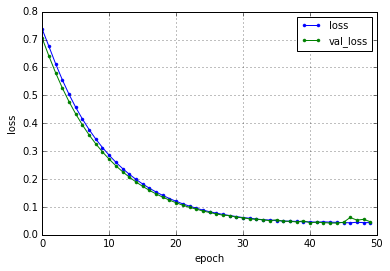

hiden node = 8
CommonName =_edim=8-Window=512-Overlap=128-AccY
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.7319 - val_loss: 0.6859
Epoch 2/50
0s - loss: 0.6412 - val_loss: 0.5854
Epoch 3/50
0s - loss: 0.5419 - val_loss: 0.4926
Epoch 4/50
0s - loss: 0.4562 - val_loss: 0.4153
Epoch 5/50
0s - loss: 0.3853 - val_loss: 0.3520
Epoch 6/50
0s - loss: 0.3274 - val_loss: 0.2998
Epoch 7/50
0s - loss: 0.2795 - val_loss: 0.2567
Epoch 8/50
0s - loss: 0.2399 - val_loss: 0.2210
Epoch 9/50
0s - loss: 0.2070 - val_loss: 0.1912
Epoch 10/50
0s - loss: 0.1796 - val_loss: 0.1665
Epoch 11/50
0s - loss: 0.1569 - val_loss: 0.1459
Epoch 12/50
0s - loss: 0.1378 - val_loss: 0.1286
Epoch 13/50
0s - loss: 0.1217 - val_loss: 0.1142
Epoch 14/50
0s - loss: 0.1083 - val_loss: 0.1021
Epoch 15/50
0s - loss: 0.0971 - val_loss: 0.0916
Epoch 16/50
0s - loss: 0.0875 - val_loss: 0.0831
Epoch 17/50
0s - loss: 0.0795 - val_loss: 0.0756
Epoch 18/50
0s - loss: 0.0729 - val_loss: 0.0694
Epoch 19/50
0s -

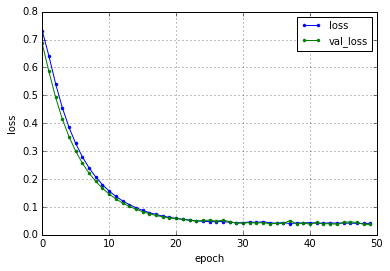

hiden node = 12
CommonName =_edim=12-Window=512-Overlap=128-AccY
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.7197 - val_loss: 0.6449
Epoch 2/50
0s - loss: 0.5756 - val_loss: 0.4945
Epoch 3/50
0s - loss: 0.4354 - val_loss: 0.3717
Epoch 4/50
0s - loss: 0.3291 - val_loss: 0.2836
Epoch 5/50
0s - loss: 0.2533 - val_loss: 0.2209
Epoch 6/50
0s - loss: 0.1993 - val_loss: 0.1760
Epoch 7/50
0s - loss: 0.1603 - val_loss: 0.1432
Epoch 8/50
0s - loss: 0.1317 - val_loss: 0.1192
Epoch 9/50
0s - loss: 0.1106 - val_loss: 0.1012
Epoch 10/50
0s - loss: 0.0946 - val_loss: 0.0875
Epoch 11/50
0s - loss: 0.0826 - val_loss: 0.0771
Epoch 12/50
0s - loss: 0.0733 - val_loss: 0.0690
Epoch 13/50
0s - loss: 0.0660 - val_loss: 0.0632
Epoch 14/50
0s - loss: 0.0606 - val_loss: 0.0579
Epoch 15/50
0s - loss: 0.0559 - val_loss: 0.0537
Epoch 16/50
0s - loss: 0.0526 - val_loss: 0.0504
Epoch 17/50
0s - loss: 0.0496 - val_loss: 0.0489
Epoch 18/50
0s - loss: 0.0478 - val_loss: 0.0461
Epoch 19/50
0s

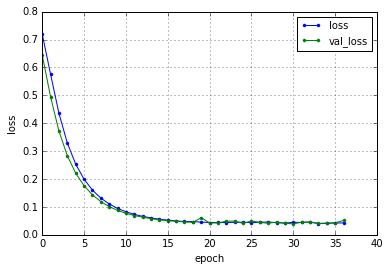

hiden node = 16
CommonName =_edim=16-Window=512-Overlap=128-AccY
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.6886 - val_loss: 0.5900
Epoch 2/50
0s - loss: 0.4978 - val_loss: 0.3979
Epoch 3/50
0s - loss: 0.3354 - val_loss: 0.2714
Epoch 4/50
0s - loss: 0.2329 - val_loss: 0.1934
Epoch 5/50
0s - loss: 0.1694 - val_loss: 0.1444
Epoch 6/50
0s - loss: 0.1290 - val_loss: 0.1131
Epoch 7/50
0s - loss: 0.1028 - val_loss: 0.0921
Epoch 8/50
0s - loss: 0.0852 - val_loss: 0.0779
Epoch 9/50
0s - loss: 0.0730 - val_loss: 0.0685
Epoch 10/50
0s - loss: 0.0645 - val_loss: 0.0606
Epoch 11/50
0s - loss: 0.0581 - val_loss: 0.0552
Epoch 12/50
0s - loss: 0.0533 - val_loss: 0.0517
Epoch 13/50
0s - loss: 0.0498 - val_loss: 0.0491
Epoch 14/50
0s - loss: 0.0471 - val_loss: 0.0475
Epoch 15/50
0s - loss: 0.0457 - val_loss: 0.0450
Epoch 16/50
0s - loss: 0.0442 - val_loss: 0.0425
Epoch 17/50
0s - loss: 0.0432 - val_loss: 0.0412
Epoch 18/50
0s - loss: 0.0435 - val_loss: 0.0405
Epoch 19/50
0s

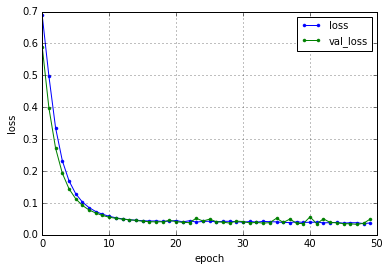

hiden node = 32
CommonName =_edim=32-Window=512-Overlap=128-AccY
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.6794 - val_loss: 0.5164
Epoch 2/50
0s - loss: 0.3932 - val_loss: 0.2722
Epoch 3/50
0s - loss: 0.2107 - val_loss: 0.1544
Epoch 4/50
0s - loss: 0.1270 - val_loss: 0.1016
Epoch 5/50
0s - loss: 0.0886 - val_loss: 0.0760
Epoch 6/50
0s - loss: 0.0692 - val_loss: 0.0624
Epoch 7/50
0s - loss: 0.0585 - val_loss: 0.0545
Epoch 8/50
0s - loss: 0.0520 - val_loss: 0.0494
Epoch 9/50
0s - loss: 0.0478 - val_loss: 0.0459
Epoch 10/50
0s - loss: 0.0446 - val_loss: 0.0434
Epoch 11/50
0s - loss: 0.0428 - val_loss: 0.0415
Epoch 12/50
0s - loss: 0.0406 - val_loss: 0.0407
Epoch 13/50
0s - loss: 0.0404 - val_loss: 0.0393
Epoch 14/50
0s - loss: 0.0420 - val_loss: 0.0395
Epoch 15/50
0s - loss: 0.0398 - val_loss: 0.0409
Epoch 16/50
0s - loss: 0.0413 - val_loss: 0.0402
Epoch 17/50
0s - loss: 0.0404 - val_loss: 0.0373
Epoch 18/50
0s - loss: 0.0390 - val_loss: 0.0435
Epoch 19/50
0s

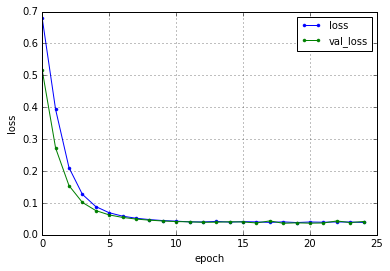

hiden node = 64
CommonName =_edim=64-Window=512-Overlap=128-AccY
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.5476 - val_loss: 0.3125
Epoch 2/50
0s - loss: 0.2071 - val_loss: 0.1220
Epoch 3/50
0s - loss: 0.0925 - val_loss: 0.0698
Epoch 4/50
0s - loss: 0.0614 - val_loss: 0.0542
Epoch 5/50
0s - loss: 0.0509 - val_loss: 0.0477
Epoch 6/50
0s - loss: 0.0459 - val_loss: 0.0440
Epoch 7/50
0s - loss: 0.0428 - val_loss: 0.0414
Epoch 8/50
0s - loss: 0.0405 - val_loss: 0.0395
Epoch 9/50
0s - loss: 0.0386 - val_loss: 0.0377
Epoch 10/50
0s - loss: 0.0380 - val_loss: 0.0378
Epoch 11/50
0s - loss: 0.0386 - val_loss: 0.0359
Epoch 12/50
0s - loss: 0.0390 - val_loss: 0.0358
Epoch 13/50
0s - loss: 0.0373 - val_loss: 0.0358
Epoch 14/50
0s - loss: 0.0380 - val_loss: 0.0353
Epoch 15/50
0s - loss: 0.0377 - val_loss: 0.0351
Epoch 16/50
0s - loss: 0.0358 - val_loss: 0.0326
Epoch 17/50
0s - loss: 0.0352 - val_loss: 0.0312
Epoch 18/50
0s - loss: 0.0304 - val_loss: 0.0339
Epoch 19/50
0s

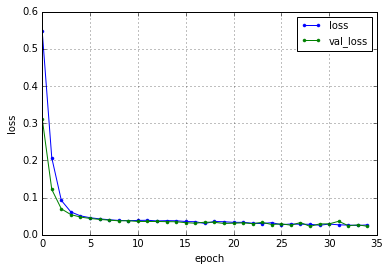

hiden node = 4
CommonName =_edim=4-Window=512-Overlap=128-AccZ
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0811 - val_loss: 0.0802
Epoch 2/50
0s - loss: 0.0791 - val_loss: 0.0774
Epoch 3/50
0s - loss: 0.0757 - val_loss: 0.0733
Epoch 4/50
0s - loss: 0.0712 - val_loss: 0.0684
Epoch 5/50
0s - loss: 0.0661 - val_loss: 0.0633
Epoch 6/50
0s - loss: 0.0610 - val_loss: 0.0584
Epoch 7/50
0s - loss: 0.0565 - val_loss: 0.0542
Epoch 8/50
0s - loss: 0.0525 - val_loss: 0.0506
Epoch 9/50
0s - loss: 0.0492 - val_loss: 0.0476
Epoch 10/50
0s - loss: 0.0464 - val_loss: 0.0451
Epoch 11/50
0s - loss: 0.0441 - val_loss: 0.0430
Epoch 12/50
0s - loss: 0.0422 - val_loss: 0.0412
Epoch 13/50
0s - loss: 0.0405 - val_loss: 0.0396
Epoch 14/50
0s - loss: 0.0390 - val_loss: 0.0383
Epoch 15/50
0s - loss: 0.0377 - val_loss: 0.0371
Epoch 16/50
0s - loss: 0.0366 - val_loss: 0.0360
Epoch 17/50
0s - loss: 0.0355 - val_loss: 0.0350
Epoch 18/50
0s - loss: 0.0346 - val_loss: 0.0341
Epoch 19/50
0s -

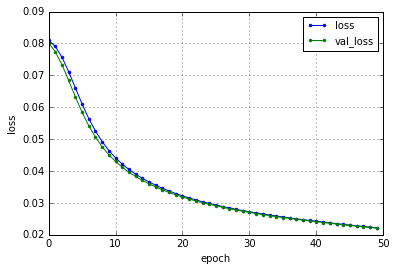

hiden node = 8
CommonName =_edim=8-Window=512-Overlap=128-AccZ
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0814 - val_loss: 0.0796
Epoch 2/50
0s - loss: 0.0778 - val_loss: 0.0751
Epoch 3/50
0s - loss: 0.0721 - val_loss: 0.0680
Epoch 4/50
0s - loss: 0.0643 - val_loss: 0.0599
Epoch 5/50
0s - loss: 0.0565 - val_loss: 0.0527
Epoch 6/50
0s - loss: 0.0499 - val_loss: 0.0467
Epoch 7/50
0s - loss: 0.0446 - val_loss: 0.0422
Epoch 8/50
0s - loss: 0.0406 - val_loss: 0.0389
Epoch 9/50
0s - loss: 0.0377 - val_loss: 0.0363
Epoch 10/50
0s - loss: 0.0354 - val_loss: 0.0343
Epoch 11/50
0s - loss: 0.0336 - val_loss: 0.0327
Epoch 12/50
0s - loss: 0.0320 - val_loss: 0.0313
Epoch 13/50
0s - loss: 0.0307 - val_loss: 0.0301
Epoch 14/50
0s - loss: 0.0296 - val_loss: 0.0291
Epoch 15/50
0s - loss: 0.0287 - val_loss: 0.0282
Epoch 16/50
0s - loss: 0.0278 - val_loss: 0.0274
Epoch 17/50
0s - loss: 0.0271 - val_loss: 0.0267
Epoch 18/50
0s - loss: 0.0264 - val_loss: 0.0260
Epoch 19/50
0s -

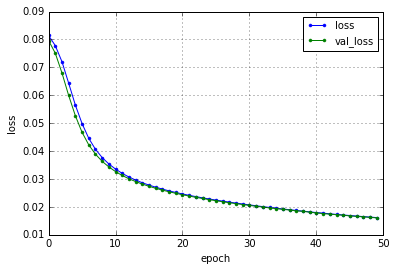

hiden node = 12
CommonName =_edim=12-Window=512-Overlap=128-AccZ
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0817 - val_loss: 0.0786
Epoch 2/50
0s - loss: 0.0756 - val_loss: 0.0714
Epoch 3/50
0s - loss: 0.0670 - val_loss: 0.0616
Epoch 4/50
0s - loss: 0.0571 - val_loss: 0.0520
Epoch 5/50
0s - loss: 0.0483 - val_loss: 0.0443
Epoch 6/50
0s - loss: 0.0416 - val_loss: 0.0388
Epoch 7/50
0s - loss: 0.0369 - val_loss: 0.0350
Epoch 8/50
0s - loss: 0.0337 - val_loss: 0.0322
Epoch 9/50
0s - loss: 0.0313 - val_loss: 0.0302
Epoch 10/50
0s - loss: 0.0295 - val_loss: 0.0286
Epoch 11/50
0s - loss: 0.0280 - val_loss: 0.0274
Epoch 12/50
0s - loss: 0.0269 - val_loss: 0.0263
Epoch 13/50
0s - loss: 0.0259 - val_loss: 0.0254
Epoch 14/50
0s - loss: 0.0251 - val_loss: 0.0246
Epoch 15/50
0s - loss: 0.0243 - val_loss: 0.0240
Epoch 16/50
0s - loss: 0.0237 - val_loss: 0.0233
Epoch 17/50
0s - loss: 0.0231 - val_loss: 0.0228
Epoch 18/50
0s - loss: 0.0225 - val_loss: 0.0223
Epoch 19/50
0s

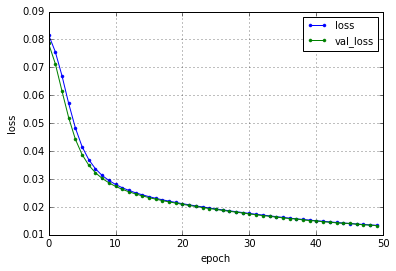

hiden node = 16
CommonName =_edim=16-Window=512-Overlap=128-AccZ
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0824 - val_loss: 0.0790
Epoch 2/50
0s - loss: 0.0764 - val_loss: 0.0725
Epoch 3/50
0s - loss: 0.0683 - val_loss: 0.0627
Epoch 4/50
0s - loss: 0.0579 - val_loss: 0.0521
Epoch 5/50
0s - loss: 0.0480 - val_loss: 0.0434
Epoch 6/50
0s - loss: 0.0404 - val_loss: 0.0371
Epoch 7/50
0s - loss: 0.0351 - val_loss: 0.0329
Epoch 8/50
0s - loss: 0.0315 - val_loss: 0.0300
Epoch 9/50
0s - loss: 0.0290 - val_loss: 0.0279
Epoch 10/50
0s - loss: 0.0272 - val_loss: 0.0264
Epoch 11/50
0s - loss: 0.0258 - val_loss: 0.0252
Epoch 12/50
0s - loss: 0.0247 - val_loss: 0.0242
Epoch 13/50
0s - loss: 0.0238 - val_loss: 0.0234
Epoch 14/50
0s - loss: 0.0231 - val_loss: 0.0227
Epoch 15/50
0s - loss: 0.0225 - val_loss: 0.0222
Epoch 16/50
0s - loss: 0.0219 - val_loss: 0.0216
Epoch 17/50
0s - loss: 0.0214 - val_loss: 0.0212
Epoch 18/50
0s - loss: 0.0210 - val_loss: 0.0207
Epoch 19/50
0s

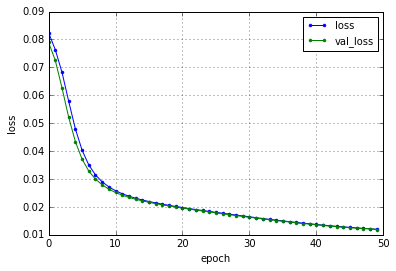

hiden node = 32
CommonName =_edim=32-Window=512-Overlap=128-AccZ
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0804 - val_loss: 0.0729
Epoch 2/50
0s - loss: 0.0666 - val_loss: 0.0583
Epoch 3/50
0s - loss: 0.0514 - val_loss: 0.0436
Epoch 4/50
0s - loss: 0.0387 - val_loss: 0.0337
Epoch 5/50
0s - loss: 0.0309 - val_loss: 0.0282
Epoch 6/50
0s - loss: 0.0267 - val_loss: 0.0252
Epoch 7/50
0s - loss: 0.0243 - val_loss: 0.0233
Epoch 8/50
0s - loss: 0.0227 - val_loss: 0.0220
Epoch 9/50
0s - loss: 0.0216 - val_loss: 0.0211
Epoch 10/50
0s - loss: 0.0207 - val_loss: 0.0203
Epoch 11/50
0s - loss: 0.0200 - val_loss: 0.0197
Epoch 12/50
0s - loss: 0.0194 - val_loss: 0.0191
Epoch 13/50
0s - loss: 0.0189 - val_loss: 0.0186
Epoch 14/50
0s - loss: 0.0184 - val_loss: 0.0181
Epoch 15/50
0s - loss: 0.0179 - val_loss: 0.0176
Epoch 16/50
0s - loss: 0.0174 - val_loss: 0.0172
Epoch 17/50
0s - loss: 0.0170 - val_loss: 0.0167
Epoch 18/50
0s - loss: 0.0166 - val_loss: 0.0163
Epoch 19/50
0s

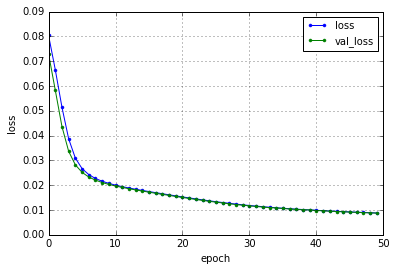

hiden node = 64
CommonName =_edim=64-Window=512-Overlap=128-AccZ
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0808 - val_loss: 0.0659
Epoch 2/50
0s - loss: 0.0566 - val_loss: 0.0459
Epoch 3/50
0s - loss: 0.0391 - val_loss: 0.0325
Epoch 4/50
0s - loss: 0.0290 - val_loss: 0.0258
Epoch 5/50
0s - loss: 0.0241 - val_loss: 0.0225
Epoch 6/50
0s - loss: 0.0216 - val_loss: 0.0207
Epoch 7/50
0s - loss: 0.0201 - val_loss: 0.0195
Epoch 8/50
0s - loss: 0.0190 - val_loss: 0.0185
Epoch 9/50
0s - loss: 0.0181 - val_loss: 0.0177
Epoch 10/50
0s - loss: 0.0174 - val_loss: 0.0170
Epoch 11/50
0s - loss: 0.0167 - val_loss: 0.0163
Epoch 12/50
0s - loss: 0.0160 - val_loss: 0.0157
Epoch 13/50
0s - loss: 0.0154 - val_loss: 0.0151
Epoch 14/50
0s - loss: 0.0148 - val_loss: 0.0145
Epoch 15/50
0s - loss: 0.0143 - val_loss: 0.0140
Epoch 16/50
0s - loss: 0.0137 - val_loss: 0.0134
Epoch 17/50
0s - loss: 0.0132 - val_loss: 0.0130
Epoch 18/50
0s - loss: 0.0128 - val_loss: 0.0125
Epoch 19/50
0s

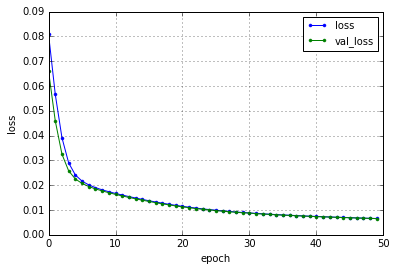

SampleNum= 1024
Overlap= 256
AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =992
SourceData's aborting data = 22
window shape is (992, 1024, 3)
(992, 1024, 3)
hiden node = 4
CommonName =_edim=4-Window=1024-Overlap=256-AccX
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.3011 - val_loss: 0.2989
Epoch 2/50
0s - loss: 0.2978 - val_loss: 0.2955
Epoch 3/50
0s - loss: 0.2940 - val_loss: 0.2913
Epoch 4/50
0s - loss: 0.2895 - val_loss: 0.2863
Epoch 5/50
0s - loss: 0.2843 - val_loss: 0.2808
Epoch 6/50
0s - loss: 0.2787 - val_loss: 0.2750
Epoch 7/50
0s - loss: 0.2730 - val_loss: 0.2693
Epoch 8/50
0s - loss: 0.2673 - val_loss: 0.2637
Epoch 9/50
0s - loss: 0.2616 - val_loss: 0.2581
Epoch 10/50
0s - loss: 0.2561 - val_loss: 0.2527
Epoch 11/50
0s - loss: 0.2507 - val_loss: 0.2473
Epoch 12/50
0s - loss: 0.2455 - val_loss: 0.2422
Epoch 13/50
0s - loss: 0.2404 - val_loss: 0.2372
Epoch 14/50
0s - loss: 0.2354 - val_loss: 0

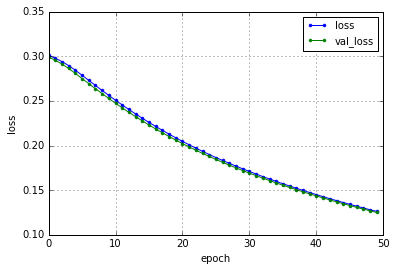

hiden node = 8
CommonName =_edim=8-Window=1024-Overlap=256-AccX
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.3033 - val_loss: 0.2996
Epoch 2/50
0s - loss: 0.2978 - val_loss: 0.2942
Epoch 3/50
0s - loss: 0.2917 - val_loss: 0.2869
Epoch 4/50
0s - loss: 0.2839 - val_loss: 0.2782
Epoch 5/50
0s - loss: 0.2748 - val_loss: 0.2687
Epoch 6/50
0s - loss: 0.2653 - val_loss: 0.2592
Epoch 7/50
0s - loss: 0.2558 - val_loss: 0.2498
Epoch 8/50
0s - loss: 0.2465 - val_loss: 0.2407
Epoch 9/50
0s - loss: 0.2375 - val_loss: 0.2319
Epoch 10/50
0s - loss: 0.2289 - val_loss: 0.2236
Epoch 11/50
0s - loss: 0.2207 - val_loss: 0.2157
Epoch 12/50
0s - loss: 0.2129 - val_loss: 0.2082
Epoch 13/50
0s - loss: 0.2056 - val_loss: 0.2011
Epoch 14/50
0s - loss: 0.1986 - val_loss: 0.1943
Epoch 15/50
0s - loss: 0.1920 - val_loss: 0.1879
Epoch 16/50
0s - loss: 0.1857 - val_loss: 0.1819
Epoch 17/50
0s - loss: 0.1798 - val_loss: 0.1762
Epoch 18/50
0s - loss: 0.1742 - val_loss: 0.1708
Epoch 19/50
0s - 

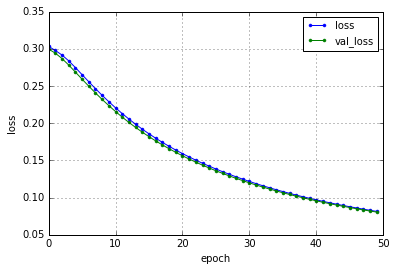

hiden node = 12
CommonName =_edim=12-Window=1024-Overlap=256-AccX
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.3033 - val_loss: 0.2988
Epoch 2/50
0s - loss: 0.2968 - val_loss: 0.2930
Epoch 3/50
0s - loss: 0.2901 - val_loss: 0.2844
Epoch 4/50
0s - loss: 0.2805 - val_loss: 0.2733
Epoch 5/50
0s - loss: 0.2689 - val_loss: 0.2610
Epoch 6/50
0s - loss: 0.2563 - val_loss: 0.2481
Epoch 7/50
0s - loss: 0.2434 - val_loss: 0.2354
Epoch 8/50
0s - loss: 0.2309 - val_loss: 0.2232
Epoch 9/50
0s - loss: 0.2190 - val_loss: 0.2118
Epoch 10/50
0s - loss: 0.2079 - val_loss: 0.2011
Epoch 11/50
0s - loss: 0.1975 - val_loss: 0.1912
Epoch 12/50
0s - loss: 0.1879 - val_loss: 0.1821
Epoch 13/50
0s - loss: 0.1790 - val_loss: 0.1737
Epoch 14/50
0s - loss: 0.1709 - val_loss: 0.1660
Epoch 15/50
0s - loss: 0.1633 - val_loss: 0.1588
Epoch 16/50
0s - loss: 0.1563 - val_loss: 0.1521
Epoch 17/50
0s - loss: 0.1499 - val_loss: 0.1460
Epoch 18/50
0s - loss: 0.1439 - val_loss: 0.1402
Epoch 19/50
0s 

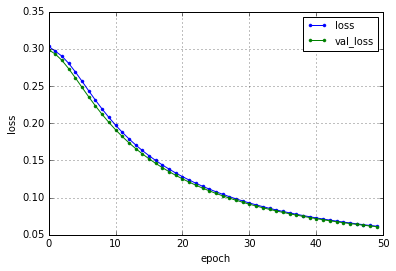

hiden node = 16
CommonName =_edim=16-Window=1024-Overlap=256-AccX
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.3036 - val_loss: 0.2955
Epoch 2/50
0s - loss: 0.2922 - val_loss: 0.2858
Epoch 3/50
0s - loss: 0.2815 - val_loss: 0.2734
Epoch 4/50
0s - loss: 0.2685 - val_loss: 0.2595
Epoch 5/50
0s - loss: 0.2542 - val_loss: 0.2449
Epoch 6/50
0s - loss: 0.2396 - val_loss: 0.2305
Epoch 7/50
0s - loss: 0.2254 - val_loss: 0.2166
Epoch 8/50
0s - loss: 0.2117 - val_loss: 0.2034
Epoch 9/50
0s - loss: 0.1988 - val_loss: 0.1909
Epoch 10/50
0s - loss: 0.1867 - val_loss: 0.1795
Epoch 11/50
0s - loss: 0.1756 - val_loss: 0.1690
Epoch 12/50
0s - loss: 0.1655 - val_loss: 0.1595
Epoch 13/50
0s - loss: 0.1563 - val_loss: 0.1508
Epoch 14/50
0s - loss: 0.1479 - val_loss: 0.1430
Epoch 15/50
0s - loss: 0.1403 - val_loss: 0.1358
Epoch 16/50
0s - loss: 0.1335 - val_loss: 0.1294
Epoch 17/50
0s - loss: 0.1272 - val_loss: 0.1234
Epoch 18/50
0s - loss: 0.1214 - val_loss: 0.1179
Epoch 19/50
0s 

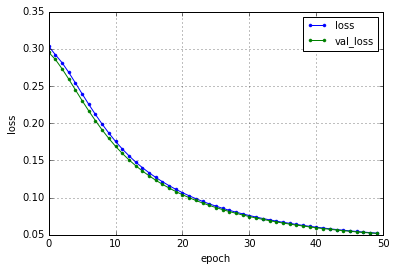

hiden node = 32
CommonName =_edim=32-Window=1024-Overlap=256-AccX
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.3015 - val_loss: 0.2886
Epoch 2/50
0s - loss: 0.2819 - val_loss: 0.2690
Epoch 3/50
0s - loss: 0.2606 - val_loss: 0.2455
Epoch 4/50
0s - loss: 0.2368 - val_loss: 0.2214
Epoch 5/50
0s - loss: 0.2130 - val_loss: 0.1986
Epoch 6/50
0s - loss: 0.1909 - val_loss: 0.1779
Epoch 7/50
0s - loss: 0.1711 - val_loss: 0.1598
Epoch 8/50
0s - loss: 0.1539 - val_loss: 0.1442
Epoch 9/50
0s - loss: 0.1392 - val_loss: 0.1309
Epoch 10/50
0s - loss: 0.1266 - val_loss: 0.1195
Epoch 11/50
0s - loss: 0.1159 - val_loss: 0.1098
Epoch 12/50
0s - loss: 0.1067 - val_loss: 0.1015
Epoch 13/50
0s - loss: 0.0989 - val_loss: 0.0945
Epoch 14/50
0s - loss: 0.0922 - val_loss: 0.0884
Epoch 15/50
0s - loss: 0.0864 - val_loss: 0.0831
Epoch 16/50
0s - loss: 0.0813 - val_loss: 0.0784
Epoch 17/50
0s - loss: 0.0770 - val_loss: 0.0744
Epoch 18/50
0s - loss: 0.0731 - val_loss: 0.0709
Epoch 19/50
0s 

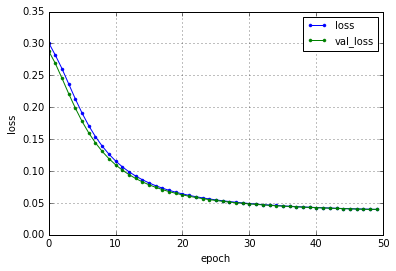

hiden node = 64
CommonName =_edim=64-Window=1024-Overlap=256-AccX
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.3052 - val_loss: 0.2783
Epoch 2/50
0s - loss: 0.2657 - val_loss: 0.2433
Epoch 3/50
0s - loss: 0.2297 - val_loss: 0.2058
Epoch 4/50
0s - loss: 0.1927 - val_loss: 0.1707
Epoch 5/50
0s - loss: 0.1597 - val_loss: 0.1417
Epoch 6/50
0s - loss: 0.1331 - val_loss: 0.1191
Epoch 7/50
0s - loss: 0.1127 - val_loss: 0.1023
Epoch 8/50
0s - loss: 0.0974 - val_loss: 0.0896
Epoch 9/50
0s - loss: 0.0860 - val_loss: 0.0801
Epoch 10/50
0s - loss: 0.0773 - val_loss: 0.0728
Epoch 11/50
0s - loss: 0.0707 - val_loss: 0.0671
Epoch 12/50
0s - loss: 0.0654 - val_loss: 0.0626
Epoch 13/50
0s - loss: 0.0613 - val_loss: 0.0590
Epoch 14/50
0s - loss: 0.0579 - val_loss: 0.0560
Epoch 15/50
0s - loss: 0.0551 - val_loss: 0.0536
Epoch 16/50
0s - loss: 0.0529 - val_loss: 0.0515
Epoch 17/50
0s - loss: 0.0509 - val_loss: 0.0498
Epoch 18/50
0s - loss: 0.0493 - val_loss: 0.0484
Epoch 19/50
0s 

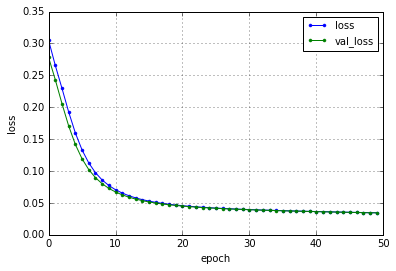

hiden node = 4
CommonName =_edim=4-Window=1024-Overlap=256-AccY
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.7503 - val_loss: 0.7419
Epoch 2/50
0s - loss: 0.7365 - val_loss: 0.7268
Epoch 3/50
0s - loss: 0.7212 - val_loss: 0.7113
Epoch 4/50
0s - loss: 0.7057 - val_loss: 0.6958
Epoch 5/50
0s - loss: 0.6902 - val_loss: 0.6805
Epoch 6/50
0s - loss: 0.6750 - val_loss: 0.6654
Epoch 7/50
0s - loss: 0.6601 - val_loss: 0.6507
Epoch 8/50
0s - loss: 0.6454 - val_loss: 0.6362
Epoch 9/50
0s - loss: 0.6310 - val_loss: 0.6220
Epoch 10/50
0s - loss: 0.6170 - val_loss: 0.6082
Epoch 11/50
0s - loss: 0.6032 - val_loss: 0.5946
Epoch 12/50
0s - loss: 0.5898 - val_loss: 0.5813
Epoch 13/50
0s - loss: 0.5766 - val_loss: 0.5684
Epoch 14/50
0s - loss: 0.5638 - val_loss: 0.5558
Epoch 15/50
0s - loss: 0.5513 - val_loss: 0.5434
Epoch 16/50
0s - loss: 0.5390 - val_loss: 0.5314
Epoch 17/50
0s - loss: 0.5271 - val_loss: 0.5196
Epoch 18/50
0s - loss: 0.5154 - val_loss: 0.5081
Epoch 19/50
0s - 

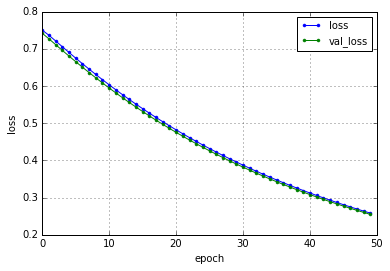

hiden node = 8
CommonName =_edim=8-Window=1024-Overlap=256-AccY
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.7543 - val_loss: 0.7439
Epoch 2/50
0s - loss: 0.7368 - val_loss: 0.7224
Epoch 3/50
0s - loss: 0.7125 - val_loss: 0.6945
Epoch 4/50
0s - loss: 0.6841 - val_loss: 0.6659
Epoch 5/50
0s - loss: 0.6557 - val_loss: 0.6380
Epoch 6/50
0s - loss: 0.6282 - val_loss: 0.6112
Epoch 7/50
0s - loss: 0.6018 - val_loss: 0.5855
Epoch 8/50
0s - loss: 0.5765 - val_loss: 0.5609
Epoch 9/50
0s - loss: 0.5523 - val_loss: 0.5375
Epoch 10/50
0s - loss: 0.5293 - val_loss: 0.5151
Epoch 11/50
0s - loss: 0.5073 - val_loss: 0.4938
Epoch 12/50
0s - loss: 0.4863 - val_loss: 0.4735
Epoch 13/50
0s - loss: 0.4664 - val_loss: 0.4541
Epoch 14/50
0s - loss: 0.4474 - val_loss: 0.4357
Epoch 15/50
0s - loss: 0.4293 - val_loss: 0.4182
Epoch 16/50
0s - loss: 0.4121 - val_loss: 0.4015
Epoch 17/50
0s - loss: 0.3957 - val_loss: 0.3856
Epoch 18/50
0s - loss: 0.3801 - val_loss: 0.3705
Epoch 19/50
0s - 

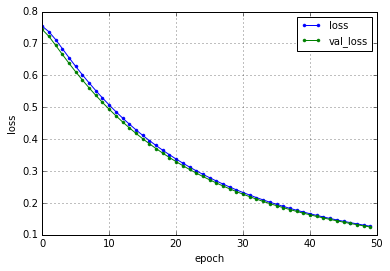

hiden node = 12
CommonName =_edim=12-Window=1024-Overlap=256-AccY
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.7593 - val_loss: 0.7422
Epoch 2/50
0s - loss: 0.7325 - val_loss: 0.7129
Epoch 3/50
0s - loss: 0.6996 - val_loss: 0.6753
Epoch 4/50
0s - loss: 0.6610 - val_loss: 0.6360
Epoch 5/50
0s - loss: 0.6221 - val_loss: 0.5982
Epoch 6/50
0s - loss: 0.5850 - val_loss: 0.5624
Epoch 7/50
0s - loss: 0.5500 - val_loss: 0.5288
Epoch 8/50
0s - loss: 0.5173 - val_loss: 0.4975
Epoch 9/50
0s - loss: 0.4867 - val_loss: 0.4681
Epoch 10/50
0s - loss: 0.4581 - val_loss: 0.4408
Epoch 11/50
0s - loss: 0.4315 - val_loss: 0.4154
Epoch 12/50
0s - loss: 0.4067 - val_loss: 0.3917
Epoch 13/50
0s - loss: 0.3836 - val_loss: 0.3696
Epoch 14/50
0s - loss: 0.3621 - val_loss: 0.3491
Epoch 15/50
0s - loss: 0.3421 - val_loss: 0.3300
Epoch 16/50
0s - loss: 0.3235 - val_loss: 0.3123
Epoch 17/50
0s - loss: 0.3062 - val_loss: 0.2958
Epoch 18/50
0s - loss: 0.2902 - val_loss: 0.2804
Epoch 19/50
0s 

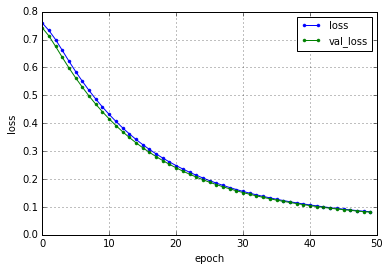

hiden node = 16
CommonName =_edim=16-Window=1024-Overlap=256-AccY
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.7576 - val_loss: 0.7366
Epoch 2/50
0s - loss: 0.7227 - val_loss: 0.6954
Epoch 3/50
0s - loss: 0.6782 - val_loss: 0.6478
Epoch 4/50
0s - loss: 0.6307 - val_loss: 0.6011
Epoch 5/50
0s - loss: 0.5847 - val_loss: 0.5564
Epoch 6/50
0s - loss: 0.5410 - val_loss: 0.5146
Epoch 7/50
0s - loss: 0.5004 - val_loss: 0.4761
Epoch 8/50
0s - loss: 0.4630 - val_loss: 0.4408
Epoch 9/50
0s - loss: 0.4289 - val_loss: 0.4086
Epoch 10/50
0s - loss: 0.3977 - val_loss: 0.3792
Epoch 11/50
0s - loss: 0.3693 - val_loss: 0.3524
Epoch 12/50
0s - loss: 0.3434 - val_loss: 0.3280
Epoch 13/50
0s - loss: 0.3197 - val_loss: 0.3057
Epoch 14/50
0s - loss: 0.2982 - val_loss: 0.2854
Epoch 15/50
0s - loss: 0.2786 - val_loss: 0.2669
Epoch 16/50
0s - loss: 0.2606 - val_loss: 0.2499
Epoch 17/50
0s - loss: 0.2442 - val_loss: 0.2344
Epoch 18/50
0s - loss: 0.2291 - val_loss: 0.2201
Epoch 19/50
0s 

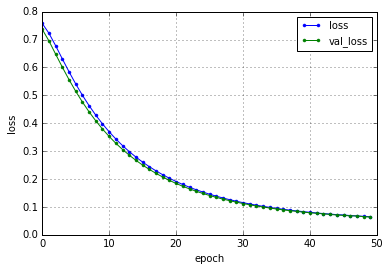

hiden node = 32
CommonName =_edim=32-Window=1024-Overlap=256-AccY
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.7683 - val_loss: 0.7252
Epoch 2/50
0s - loss: 0.7027 - val_loss: 0.6593
Epoch 3/50
0s - loss: 0.6311 - val_loss: 0.5807
Epoch 4/50
0s - loss: 0.5525 - val_loss: 0.5041
Epoch 5/50
0s - loss: 0.4785 - val_loss: 0.4357
Epoch 6/50
0s - loss: 0.4138 - val_loss: 0.3773
Epoch 7/50
0s - loss: 0.3586 - val_loss: 0.3276
Epoch 8/50
0s - loss: 0.3120 - val_loss: 0.2859
Epoch 9/50
0s - loss: 0.2728 - val_loss: 0.2510
Epoch 10/50
0s - loss: 0.2400 - val_loss: 0.2218
Epoch 11/50
0s - loss: 0.2126 - val_loss: 0.1973
Epoch 12/50
0s - loss: 0.1895 - val_loss: 0.1767
Epoch 13/50
0s - loss: 0.1702 - val_loss: 0.1594
Epoch 14/50
0s - loss: 0.1538 - val_loss: 0.1446
Epoch 15/50
0s - loss: 0.1399 - val_loss: 0.1321
Epoch 16/50
0s - loss: 0.1281 - val_loss: 0.1214
Epoch 17/50
0s - loss: 0.1180 - val_loss: 0.1123
Epoch 18/50
0s - loss: 0.1094 - val_loss: 0.1045
Epoch 19/50
0s 

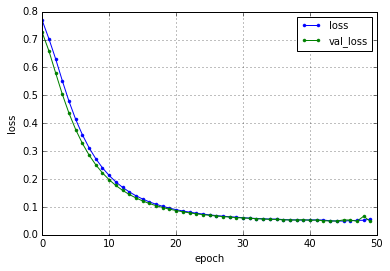

hiden node = 64
CommonName =_edim=64-Window=1024-Overlap=256-AccY
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.7486 - val_loss: 0.6643
Epoch 2/50
0s - loss: 0.6218 - val_loss: 0.5438
Epoch 3/50
0s - loss: 0.4993 - val_loss: 0.4241
Epoch 4/50
0s - loss: 0.3864 - val_loss: 0.3257
Epoch 5/50
0s - loss: 0.2971 - val_loss: 0.2518
Epoch 6/50
0s - loss: 0.2311 - val_loss: 0.1985
Epoch 7/50
0s - loss: 0.1838 - val_loss: 0.1607
Epoch 8/50
0s - loss: 0.1502 - val_loss: 0.1337
Epoch 9/50
0s - loss: 0.1261 - val_loss: 0.1141
Epoch 10/50
0s - loss: 0.1086 - val_loss: 0.0998
Epoch 11/50
0s - loss: 0.0957 - val_loss: 0.0892
Epoch 12/50
0s - loss: 0.0861 - val_loss: 0.0811
Epoch 13/50
0s - loss: 0.0787 - val_loss: 0.0748
Epoch 14/50
0s - loss: 0.0730 - val_loss: 0.0700
Epoch 15/50
0s - loss: 0.0685 - val_loss: 0.0661
Epoch 16/50
0s - loss: 0.0650 - val_loss: 0.0630
Epoch 17/50
0s - loss: 0.0621 - val_loss: 0.0605
Epoch 18/50
0s - loss: 0.0597 - val_loss: 0.0584
Epoch 19/50
0s 

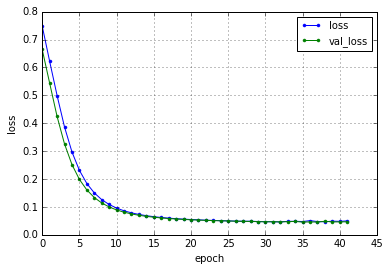

hiden node = 4
CommonName =_edim=4-Window=1024-Overlap=256-AccZ
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0821 - val_loss: 0.0819
Epoch 2/50
0s - loss: 0.0818 - val_loss: 0.0817
Epoch 3/50
0s - loss: 0.0816 - val_loss: 0.0815
Epoch 4/50
0s - loss: 0.0814 - val_loss: 0.0813
Epoch 5/50
0s - loss: 0.0812 - val_loss: 0.0811
Epoch 6/50
0s - loss: 0.0810 - val_loss: 0.0808
Epoch 7/50
0s - loss: 0.0807 - val_loss: 0.0805
Epoch 8/50
0s - loss: 0.0804 - val_loss: 0.0801
Epoch 9/50
0s - loss: 0.0800 - val_loss: 0.0797
Epoch 10/50
0s - loss: 0.0795 - val_loss: 0.0792
Epoch 11/50
0s - loss: 0.0790 - val_loss: 0.0787
Epoch 12/50
0s - loss: 0.0784 - val_loss: 0.0781
Epoch 13/50
0s - loss: 0.0779 - val_loss: 0.0775
Epoch 14/50
0s - loss: 0.0772 - val_loss: 0.0768
Epoch 15/50
0s - loss: 0.0765 - val_loss: 0.0761
Epoch 16/50
0s - loss: 0.0759 - val_loss: 0.0754
Epoch 17/50
0s - loss: 0.0751 - val_loss: 0.0747
Epoch 18/50
0s - loss: 0.0744 - val_loss: 0.0739
Epoch 19/50
0s - 

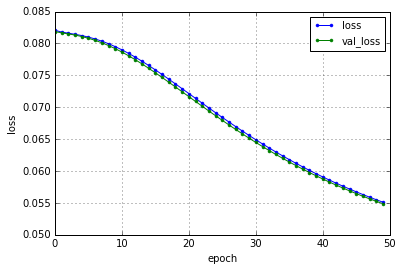

hiden node = 8
CommonName =_edim=8-Window=1024-Overlap=256-AccZ
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0829 - val_loss: 0.0825
Epoch 2/50
0s - loss: 0.0823 - val_loss: 0.0821
Epoch 3/50
0s - loss: 0.0820 - val_loss: 0.0818
Epoch 4/50
0s - loss: 0.0817 - val_loss: 0.0815
Epoch 5/50
0s - loss: 0.0814 - val_loss: 0.0813
Epoch 6/50
0s - loss: 0.0812 - val_loss: 0.0810
Epoch 7/50
0s - loss: 0.0808 - val_loss: 0.0806
Epoch 8/50
0s - loss: 0.0805 - val_loss: 0.0802
Epoch 9/50
0s - loss: 0.0800 - val_loss: 0.0797
Epoch 10/50
0s - loss: 0.0795 - val_loss: 0.0792
Epoch 11/50
0s - loss: 0.0790 - val_loss: 0.0786
Epoch 12/50
0s - loss: 0.0783 - val_loss: 0.0779
Epoch 13/50
0s - loss: 0.0776 - val_loss: 0.0771
Epoch 14/50
0s - loss: 0.0768 - val_loss: 0.0763
Epoch 15/50
0s - loss: 0.0760 - val_loss: 0.0754
Epoch 16/50
0s - loss: 0.0751 - val_loss: 0.0745
Epoch 17/50
0s - loss: 0.0741 - val_loss: 0.0735
Epoch 18/50
0s - loss: 0.0731 - val_loss: 0.0724
Epoch 19/50
0s - 

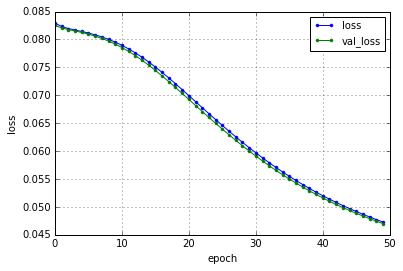

hiden node = 12
CommonName =_edim=12-Window=1024-Overlap=256-AccZ
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0825 - val_loss: 0.0819
Epoch 2/50
0s - loss: 0.0817 - val_loss: 0.0814
Epoch 3/50
0s - loss: 0.0812 - val_loss: 0.0809
Epoch 4/50
0s - loss: 0.0807 - val_loss: 0.0804
Epoch 5/50
0s - loss: 0.0802 - val_loss: 0.0798
Epoch 6/50
0s - loss: 0.0796 - val_loss: 0.0791
Epoch 7/50
0s - loss: 0.0788 - val_loss: 0.0783
Epoch 8/50
0s - loss: 0.0779 - val_loss: 0.0773
Epoch 9/50
0s - loss: 0.0770 - val_loss: 0.0763
Epoch 10/50
0s - loss: 0.0759 - val_loss: 0.0751
Epoch 11/50
0s - loss: 0.0747 - val_loss: 0.0739
Epoch 12/50
0s - loss: 0.0735 - val_loss: 0.0726
Epoch 13/50
0s - loss: 0.0722 - val_loss: 0.0713
Epoch 14/50
0s - loss: 0.0708 - val_loss: 0.0699
Epoch 15/50
0s - loss: 0.0694 - val_loss: 0.0685
Epoch 16/50
0s - loss: 0.0680 - val_loss: 0.0671
Epoch 17/50
0s - loss: 0.0666 - val_loss: 0.0657
Epoch 18/50
0s - loss: 0.0652 - val_loss: 0.0643
Epoch 19/50
0s 

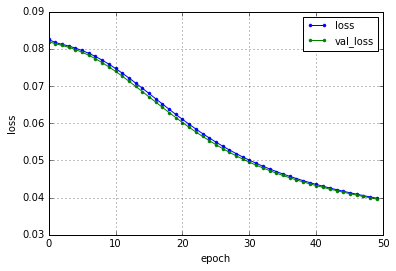

hiden node = 16
CommonName =_edim=16-Window=1024-Overlap=256-AccZ
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0837 - val_loss: 0.0826
Epoch 2/50
0s - loss: 0.0822 - val_loss: 0.0816
Epoch 3/50
0s - loss: 0.0814 - val_loss: 0.0809
Epoch 4/50
0s - loss: 0.0806 - val_loss: 0.0802
Epoch 5/50
0s - loss: 0.0799 - val_loss: 0.0794
Epoch 6/50
0s - loss: 0.0791 - val_loss: 0.0785
Epoch 7/50
0s - loss: 0.0781 - val_loss: 0.0774
Epoch 8/50
0s - loss: 0.0770 - val_loss: 0.0763
Epoch 9/50
0s - loss: 0.0758 - val_loss: 0.0750
Epoch 10/50
0s - loss: 0.0745 - val_loss: 0.0736
Epoch 11/50
0s - loss: 0.0731 - val_loss: 0.0722
Epoch 12/50
0s - loss: 0.0716 - val_loss: 0.0707
Epoch 13/50
0s - loss: 0.0701 - val_loss: 0.0691
Epoch 14/50
0s - loss: 0.0685 - val_loss: 0.0675
Epoch 15/50
0s - loss: 0.0669 - val_loss: 0.0658
Epoch 16/50
0s - loss: 0.0652 - val_loss: 0.0642
Epoch 17/50
0s - loss: 0.0636 - val_loss: 0.0625
Epoch 18/50
0s - loss: 0.0620 - val_loss: 0.0609
Epoch 19/50
0s 

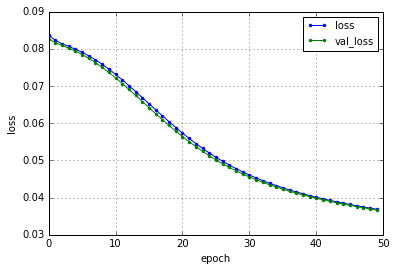

hiden node = 32
CommonName =_edim=32-Window=1024-Overlap=256-AccZ
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0858 - val_loss: 0.0838
Epoch 2/50
0s - loss: 0.0831 - val_loss: 0.0819
Epoch 3/50
0s - loss: 0.0815 - val_loss: 0.0806
Epoch 4/50
0s - loss: 0.0802 - val_loss: 0.0793
Epoch 5/50
0s - loss: 0.0788 - val_loss: 0.0779
Epoch 6/50
0s - loss: 0.0773 - val_loss: 0.0762
Epoch 7/50
0s - loss: 0.0756 - val_loss: 0.0744
Epoch 8/50
0s - loss: 0.0736 - val_loss: 0.0723
Epoch 9/50
0s - loss: 0.0715 - val_loss: 0.0701
Epoch 10/50
0s - loss: 0.0692 - val_loss: 0.0678
Epoch 11/50
0s - loss: 0.0669 - val_loss: 0.0654
Epoch 12/50
0s - loss: 0.0645 - val_loss: 0.0630
Epoch 13/50
0s - loss: 0.0621 - val_loss: 0.0606
Epoch 14/50
0s - loss: 0.0598 - val_loss: 0.0583
Epoch 15/50
0s - loss: 0.0575 - val_loss: 0.0561
Epoch 16/50
0s - loss: 0.0554 - val_loss: 0.0540
Epoch 17/50
0s - loss: 0.0533 - val_loss: 0.0521
Epoch 18/50
0s - loss: 0.0514 - val_loss: 0.0503
Epoch 19/50
0s 

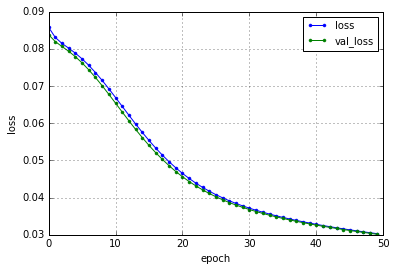

hiden node = 64
CommonName =_edim=64-Window=1024-Overlap=256-AccZ
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0880 - val_loss: 0.0845
Epoch 2/50
0s - loss: 0.0833 - val_loss: 0.0814
Epoch 3/50
0s - loss: 0.0806 - val_loss: 0.0791
Epoch 4/50
0s - loss: 0.0782 - val_loss: 0.0767
Epoch 5/50
0s - loss: 0.0759 - val_loss: 0.0742
Epoch 6/50
0s - loss: 0.0733 - val_loss: 0.0715
Epoch 7/50
0s - loss: 0.0705 - val_loss: 0.0686
Epoch 8/50
0s - loss: 0.0675 - val_loss: 0.0656
Epoch 9/50
0s - loss: 0.0644 - val_loss: 0.0624
Epoch 10/50
0s - loss: 0.0613 - val_loss: 0.0593
Epoch 11/50
0s - loss: 0.0582 - val_loss: 0.0563
Epoch 12/50
0s - loss: 0.0552 - val_loss: 0.0533
Epoch 13/50
0s - loss: 0.0523 - val_loss: 0.0506
Epoch 14/50
0s - loss: 0.0497 - val_loss: 0.0481
Epoch 15/50
0s - loss: 0.0472 - val_loss: 0.0458
Epoch 16/50
0s - loss: 0.0450 - val_loss: 0.0437
Epoch 17/50
0s - loss: 0.0430 - val_loss: 0.0419
Epoch 18/50
0s - loss: 0.0413 - val_loss: 0.0402
Epoch 19/50
0s 

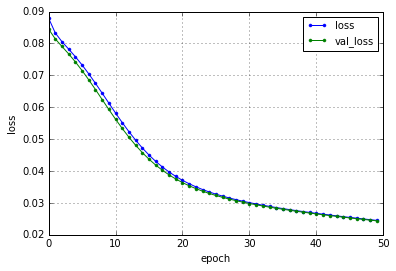

In [9]:
# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    ArrayAxis = Axis.split(",")
    print "SampleNum= "+str(SampleNum)
    print "Overlap= "+str(Overlap)
    w=window.Window()
    for a in ArrayAxis:
        w.SetData(a,dic[a])
    wind=w.Compile(windowWidth=SampleNum,overlapNum=Overlap)
    print wind.shape
    windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))

    # define SaveFileName
    for AxisName,WindowNum in zip(ArrayAxis,range(3)):
        for encoding_dim in EncodingDim:
            print "hiden node = "+str(encoding_dim)
            CommonName='_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap)+'-'+AxisName
            print "CommonName ="+CommonName
            
            SaveFileNameEncord=DataName+'_encoded'+CommonName
            SaveFileNameDecord=DataName+'_decoded'+CommonName
            SaveFileNameNet=DataName+'_net'+CommonName
            SaveFileNameTrain=DataName+'_train'+CommonName
            SaveFileNameTest=DataName+'_test'+CommonName
            SaveFileNameGlaph=GlaphDataPath+DataName+CommonName+'_loss_val_loss.png'

            window_test=wind[:,:,WindowNum]
            window_train=wind[:,:,WindowNum]
            processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
            processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
            shapeNum=wind.shape[1]


            # this is our input placeholder
            input_img = Input(shape=(shapeNum,))
            # "encoded" is the encoded representation of the input
            encoded = Dense(encoding_dim, activation='tanh')(input_img)
            # "decoded" is the lossy reconstruction of the input
            decoded = Dense(shapeNum, activation='linear')(encoded)

            # this model maps an input to its reconstruction
            autoencoder = Model(input=input_img, output=decoded)

            # this model maps an input to its encoded representation
            encoder = Model(input=input_img, output=encoded)

            # create a placeholder for an encoded (32-dimensional) input
            encoded_input = Input(shape=(encoding_dim,))
            # retrieve the last layer of the autoencoder model
            decoder_layer = autoencoder.layers[-1]
            # create the decoder model
            decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

            autoencoder.compile(optimizer='adadelta', loss='mse')
            plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

            early_stopping = EarlyStopping(monitor='val_loss', patience=5)
            hist = autoencoder.fit(window_train, window_train,
                            nb_epoch=50,
                            verbose=2,
                            batch_size=shapeNum/4,
                            shuffle=True,
                            validation_data=(window_test, window_test),
                            callbacks=[early_stopping]
                            )
            time.sleep(0.1)
            encoded_imgs = encoder.predict(window_test)
            decoded_imgs = decoder.predict(encoded_imgs)

            processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
            processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

            # save model and wights
            json_string = encoder.to_json()
            open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
            encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

            json_string = decoder.to_json()
            open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
            decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

            json_string = autoencoder.to_json()
            open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
            autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

            # plot loss
            loss = hist.history['loss']
            val_loss = hist.history['val_loss']

            nb_epoch = len(loss)
            plt.plot(range(nb_epoch), loss, marker='.', label='loss')
            plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
            plt.legend(loc='best', fontsize=10)
            plt.grid()
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.savefig(SaveFileNameGlaph)
            plt.show()

In [10]:
print window_test.shape

(992, 1024)
